 # Data Analysis & Advanced Visualization (Baby Names Dataset)

## First Inspection: The most popular Names in 2018

1. __Load__ and __inspect__ the dataset "us_baby_names.csv". __Save__ the DataFrame in __df__.

2. Find the most popular __Baby Girl Names__ in __2018__. 

3. Find the most popular __Baby Boy Names__ in __2018__.

4. __Create__ the function __most_pop(year, gender, n)__ that returns the __n__ most popular __M/F__ Names in the __year XYZ__.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format='{:.2f}'.format

In [4]:
df=pd.read_csv("us_baby_names.csv")

In [5]:
df

Year       Name Gender  Count
0        1880       Mary      F   7065
1        1880       Anna      F   2604
2        1880       Emma      F   2003
3        1880  Elizabeth      F   1939
4        1880     Minnie      F   1746
...       ...        ...    ...    ...
1957041  2018      Zylas      M      5
1957042  2018      Zyran      M      5
1957043  2018      Zyrie      M      5
1957044  2018      Zyron      M      5
1957045  2018      Zzyzx      M      5

[1957046 rows x 4 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957046 entries, 0 to 1957045
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Year    int64 
 1   Name    object
 2   Gender  object
 3   Count   int64 
dtypes: int64(2), object(2)
memory usage: 59.7+ MB


In [7]:
df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

In [8]:
df.Gender=df.Gender.astype("category")

In [9]:
names_2018=df[df.Year==2018].copy()
names_2018

Year      Name Gender  Count
1925013  2018      Emma      F  18688
1925014  2018    Olivia      F  17921
1925015  2018       Ava      F  14924
1925016  2018  Isabella      F  14464
1925017  2018    Sophia      F  13928
...       ...       ...    ...    ...
1957041  2018     Zylas      M      5
1957042  2018     Zyran      M      5
1957043  2018     Zyrie      M      5
1957044  2018     Zyron      M      5
1957045  2018     Zzyzx      M      5

[32033 rows x 4 columns]

In [10]:
names_2018[names_2018.Gender=="F"].nlargest(10,"Count")

Year       Name Gender  Count
1925013  2018       Emma      F  18688
1925014  2018     Olivia      F  17921
1925015  2018        Ava      F  14924
1925016  2018   Isabella      F  14464
1925017  2018     Sophia      F  13928
1925018  2018  Charlotte      F  12940
1925019  2018        Mia      F  12642
1925020  2018     Amelia      F  12301
1925021  2018     Harper      F  10582
1925022  2018     Evelyn      F  10376

In [11]:
def most_pop(year,gender,n):
    return df[(df.Year==year) & (df.Gender==gender)].nlargest(n,"Count")

In [12]:
most_pop(2010,"M",10)

Year       Name Gender  Count
1677854  2010      Jacob      M  22127
1677855  2010      Ethan      M  18002
1677856  2010    Michael      M  17350
1677857  2010     Jayden      M  17179
1677858  2010    William      M  17051
1677859  2010  Alexander      M  16756
1677860  2010       Noah      M  16451
1677861  2010     Daniel      M  15843
1677862  2010      Aiden      M  15538
1677863  2010    Anthony      M  15493

## Evergreen Names (1880 - 2018)

5. Find those __Evergreen Boy Names__ that are in __1880 and 2018__ among the most popular Boy Names (__Top 20__).

6. Find those __Evergreen Girl Names__ that are in __1880 and 2018__ among the most popular Girl Names (__Top 20__).

In [13]:
f_2018=most_pop(2018,"F",20)

In [14]:
f_1880=most_pop(1880,"F",20)

In [15]:
f_evergreen=f_2018[["Name","Count"]].merge(f_1880[["Name","Count"]],how="inner", on="Name",suffixes=["_2018","_1880"])

In [16]:
f_evergreen

Name  Count_2018  Count_1880
0       Emma       18688        2003
1  Elizabeth        8513        1939
2       Ella        8055        1156

In [17]:
m_2018=most_pop(2018,"M",20)

In [18]:
m_1880=most_pop(1880,"M",20)

In [19]:
m_evergreen=m_2018[["Name","Count"]].merge(m_1880[["Name","Count"]],how="inner", on="Name",suffixes=["_2018","_1880"])

In [20]:
m_evergreen

Name  Count_2018  Count_1880
0  William       14516        9532
1    James       13525        5927
2    Henry       10649        2444

## Advanced Data Aggregation

7. Create the following __aggregated DataFrame agg__ (you can see the first and last 5 rows):

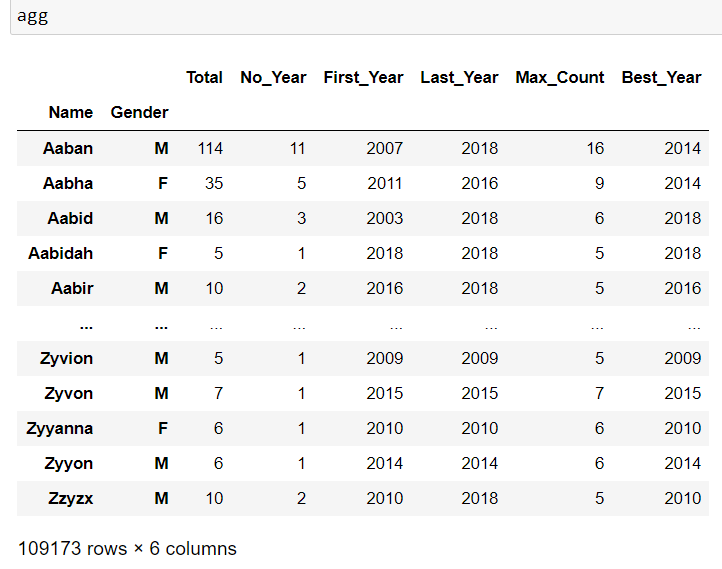

__How to interpret agg (and the first observation Aaban, M):__<br>
- There are in total 114 Male Babies with the name Aaban (Total)<br>
- The combination/entry (Aaban, M) can be found in 11 different years (No_Year)<br>
- The combination/entry (Aaban, M) appeared in the year 2007 for the first time (First_Year)<br>
- The last appearance was in the year 2018 (Last_Year)<br>
- In the most popular year, (Aaban, M) appeared 16 times (Max_Count)
- The most popular year for (Aaban, M) (Best_Year)

8. __Reset__ the Index and create a RangeIndex.

9. __Filter__ agg for the combination (Mary, F)

In [21]:
df=pd.read_csv("us_baby_names.csv")

In [22]:
df

Year       Name Gender  Count
0        1880       Mary      F   7065
1        1880       Anna      F   2604
2        1880       Emma      F   2003
3        1880  Elizabeth      F   1939
4        1880     Minnie      F   1746
...       ...        ...    ...    ...
1957041  2018      Zylas      M      5
1957042  2018      Zyran      M      5
1957043  2018      Zyrie      M      5
1957044  2018      Zyron      M      5
1957045  2018      Zzyzx      M      5

[1957046 rows x 4 columns]

In [23]:
df.groupby(["Name","Gender"]).Count.sum().reset_index(level=-1)

Gender  Count
Name                 
Aaban        M    114
Aabha        F     35
Aabid        M     16
Aabidah      F      5
Aabir        M     10
...        ...    ...
Zyvion       M      5
Zyvon        M      7
Zyyanna      F      6
Zyyon        M      6
Zzyzx        M     10

[109173 rows x 2 columns]

In [24]:
agg=df.groupby(["Name","Gender"]).agg(Total=("Count","sum"),No_Year=("Count","count"),First_Year=("Year","min"),
                                     Last_Year=("Year","max"),Max_Count=("Count","max"))

In [25]:
agg

Total  No_Year  First_Year  Last_Year  Max_Count
Name    Gender                                                  
Aaban   M         114       11        2007       2018         16
Aabha   F          35        5        2011       2016          9
Aabid   M          16        3        2003       2018          6
Aabidah F           5        1        2018       2018          5
Aabir   M          10        2        2016       2018          5
...               ...      ...         ...        ...        ...
Zyvion  M           5        1        2009       2009          5
Zyvon   M           7        1        2015       2015          7
Zyyanna F           6        1        2010       2010          6
Zyyon   M           6        1        2014       2014          6
Zzyzx   M          10        2        2010       2018          5

[109173 rows x 5 columns]

In [26]:
def best_year(group):
    return group.nlargest(1,"Count").Year

In [28]:
best_y=df.groupby(["Name","Gender"]).apply(best_year)

In [29]:
best_y

Name     Gender         
Aaban    M       1817711    2014
Aabha    F       1803981    2014
Aabid    M       1953741    2018
Aabidah  F       1940601    2018
Aabir    M       1890403    2016
                            ... 
Zyvion   M       1658038    2009
Zyvon    M       1856007    2015
Zyyanna  F       1675008    2010
Zyyon    M       1824324    2014
Zzyzx    M       1692111    2010
Name: Year, Length: 109173, dtype: int64

In [30]:
best_y.droplevel(-1)

Name     Gender
Aaban    M         2014
Aabha    F         2014
Aabid    M         2018
Aabidah  F         2018
Aabir    M         2016
                   ... 
Zyvion   M         2009
Zyvon    M         2015
Zyyanna  F         2010
Zyyon    M         2014
Zzyzx    M         2010
Name: Year, Length: 109173, dtype: int64

In [31]:
agg["Best_Year"]=best_y.droplevel(-1)

In [32]:
agg

Total  No_Year  First_Year  Last_Year  Max_Count  Best_Year
Name    Gender                                                             
Aaban   M         114       11        2007       2018         16       2014
Aabha   F          35        5        2011       2016          9       2014
Aabid   M          16        3        2003       2018          6       2018
Aabidah F           5        1        2018       2018          5       2018
Aabir   M          10        2        2016       2018          5       2016
...               ...      ...         ...        ...        ...        ...
Zyvion  M           5        1        2009       2009          5       2009
Zyvon   M           7        1        2015       2015          7       2015
Zyyanna F           6        1        2010       2010          6       2010
Zyyon   M           6        1        2014       2014          6       2014
Zzyzx   M          10        2        2010       2018          5       2010

[109173 rows x 6 columns]

In [33]:
agg.reset_index(inplace=True)

In [34]:
agg

Name Gender  Total  No_Year  First_Year  Last_Year  Max_Count  \
0         Aaban      M    114       11        2007       2018         16   
1         Aabha      F     35        5        2011       2016          9   
2         Aabid      M     16        3        2003       2018          6   
3       Aabidah      F      5        1        2018       2018          5   
4         Aabir      M     10        2        2016       2018          5   
...         ...    ...    ...      ...         ...        ...        ...   
109168   Zyvion      M      5        1        2009       2009          5   
109169    Zyvon      M      7        1        2015       2015          7   
109170  Zyyanna      F      6        1        2010       2010          6   
109171    Zyyon      M      6        1        2014       2014          6   
109172    Zzyzx      M     10        2        2010       2018          5   

        Best_Year  
0            2014  
1            2014  
2            2018  
3            2018  
4            2016  
...           ...  
109168       2009  
109169       2015  
109170       2010  
109171       2014  
109172       2010  

[109173 rows x 8 columns]

In [35]:
agg[(agg.Name=="Mary") & (agg.Gender=="M")]

Name Gender  Total  No_Year  First_Year  Last_Year  Max_Count  \
68680  Mary      M  15165      131        1880       2014        340   

       Best_Year  
68680       1930

## Most Popular Names of all Times

10. __Find__ the __10 most popular__ Male and Female Names of all Times (most popular in terms of total count). See Screenshot with final result below.

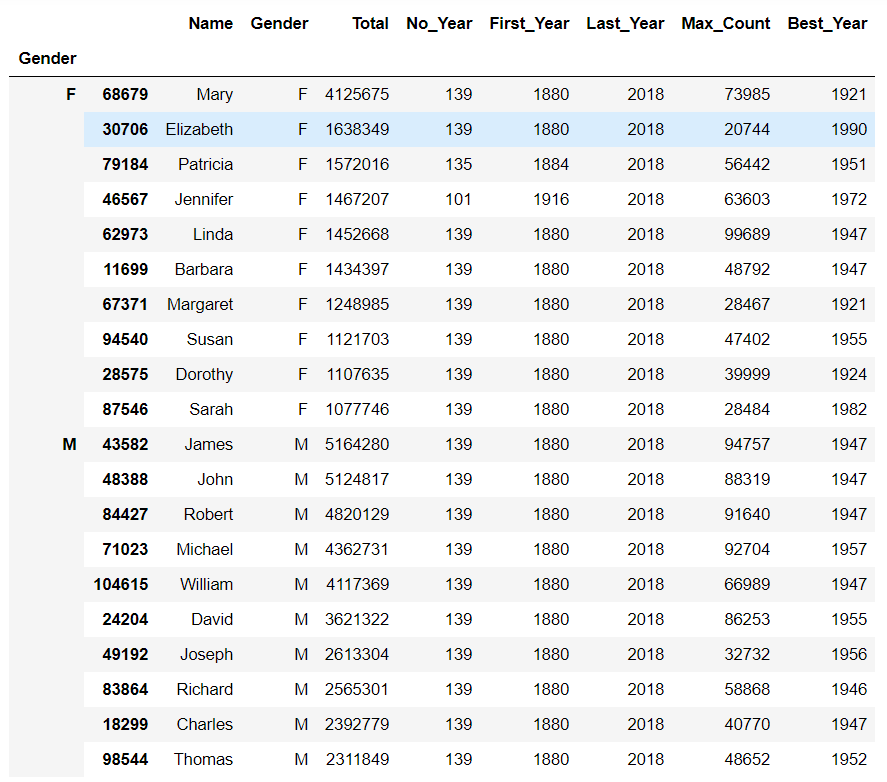

In [36]:
agg.groupby("Gender").apply(lambda x: x.nlargest(10,"Total"))

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  Best_Year  
Gender                               
F      68679       73985       1921  
       30706       20744       1990  
       79184       56442       1951  
       46567       63603       1972  
       62973       99689       1947  
       11699       48792       1947  
       67371       28467       1921  
       94540       47402       1955  
       28575       39999       1924  
       87546       28484       1982  
M      43582       94757       1947  
       48388       88319       1947  
       84427       91640       1947  
       71023       92704       1957  
       104615      66989       1947  
       24204       86253       1955  
       49192       32732       1956  
       83864       58868       1946  
       18299       40770       1947  
       98544       48652       1952

In [37]:
all_times=agg.groupby("Gender").apply(lambda x: x.nlargest(10,"Total")).reset_index(drop=True)

In [38]:
all_times

Name Gender    Total  No_Year  First_Year  Last_Year  Max_Count  \
0        Mary      F  4125675      139        1880       2018      73985   
1   Elizabeth      F  1638349      139        1880       2018      20744   
2    Patricia      F  1572016      135        1884       2018      56442   
3    Jennifer      F  1467207      101        1916       2018      63603   
4       Linda      F  1452668      139        1880       2018      99689   
5     Barbara      F  1434397      139        1880       2018      48792   
6    Margaret      F  1248985      139        1880       2018      28467   
7       Susan      F  1121703      139        1880       2018      47402   
8     Dorothy      F  1107635      139        1880       2018      39999   
9       Sarah      F  1077746      139        1880       2018      28484   
10      James      M  5164280      139        1880       2018      94757   
11       John      M  5124817      139        1880       2018      88319   
12     Robert      M  4820129      139        1880       2018      91640   
13    Michael      M  4362731      139        1880       2018      92704   
14    William      M  4117369      139        1880       2018      66989   
15      David      M  3621322      139        1880       2018      86253   
16     Joseph      M  2613304      139        1880       2018      32732   
17    Richard      M  2565301      139        1880       2018      58868   
18    Charles      M  2392779      139        1880       2018      40770   
19     Thomas      M  2311849      139        1880       2018      48652   

    Best_Year  
0        1921  
1        1990  
2        1951  
3        1972  
4        1947  
5        1947  
6        1921  
7        1955  
8        1924  
9        1982  
10       1947  
11       1947  
12       1947  
13       1957  
14       1947  
15       1955  
16       1956  
17       1946  
18       1947  
19       1952

In [39]:
import seaborn as sns

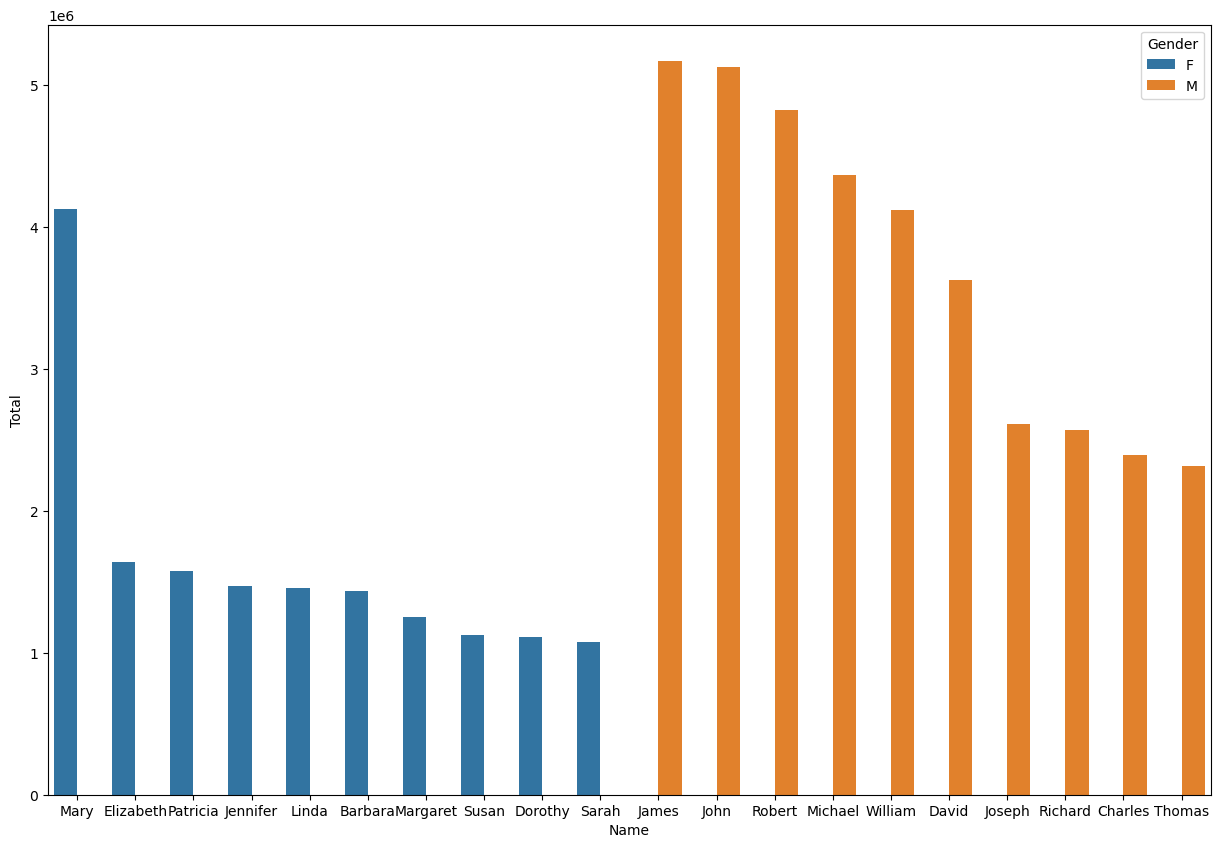

In [40]:
plt.figure(figsize=(15,10))
sns.barplot(x="Name",y="Total",data=all_times,hue="Gender")
plt.show()

## General Trends over time (1880 - 2018)

11. __Count__ the total number of __registered Babies per Year__ and visualize. __Create__ the following Plot:

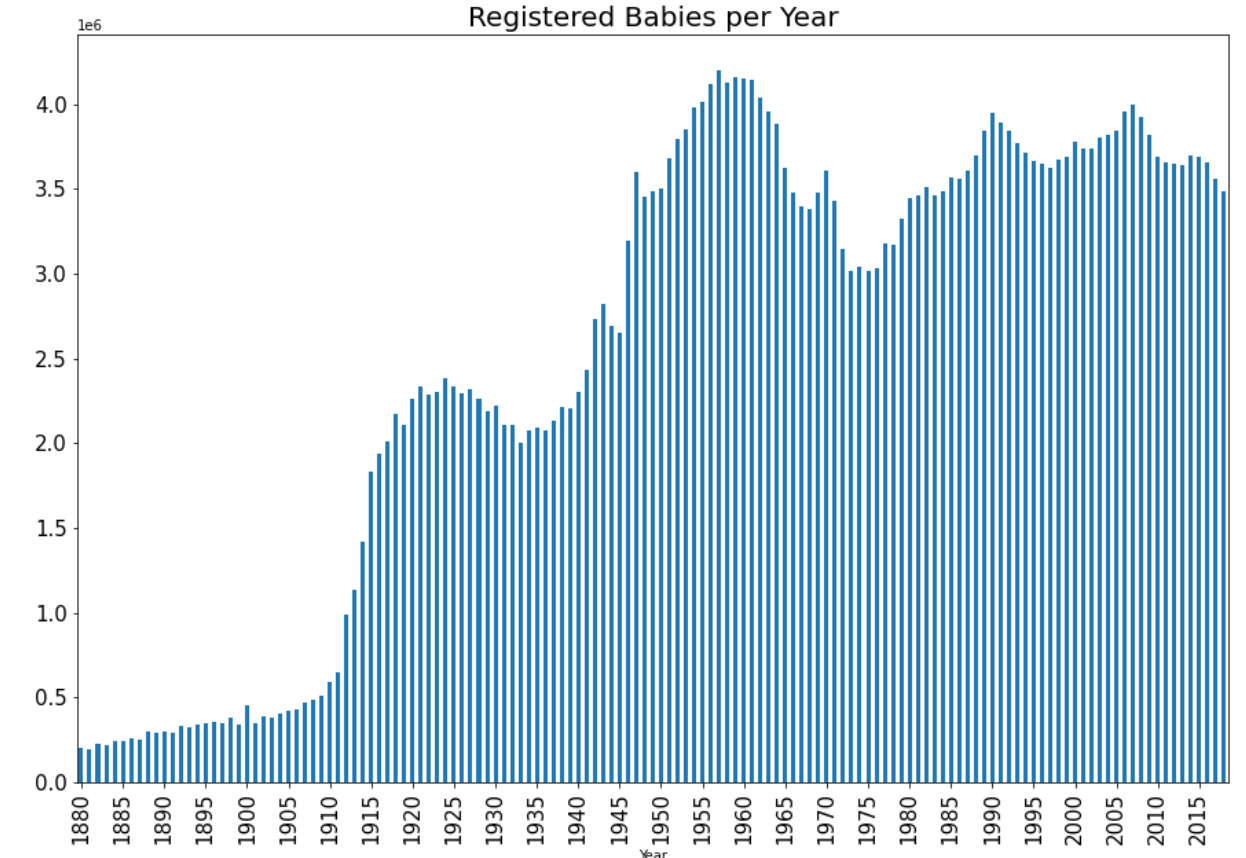

In [41]:
pd.options.display.float_format='{:.0f}'.format

In [42]:
babies_per_year=df.groupby("Year").Count.sum()

In [43]:
babies_per_year

Year
1880     201484
1881     192696
1882     221533
1883     216944
1884     243461
         ...   
2014    3698914
2015    3691990
2016    3657797
2017    3561975
2018    3487353
Name: Count, Length: 139, dtype: int64

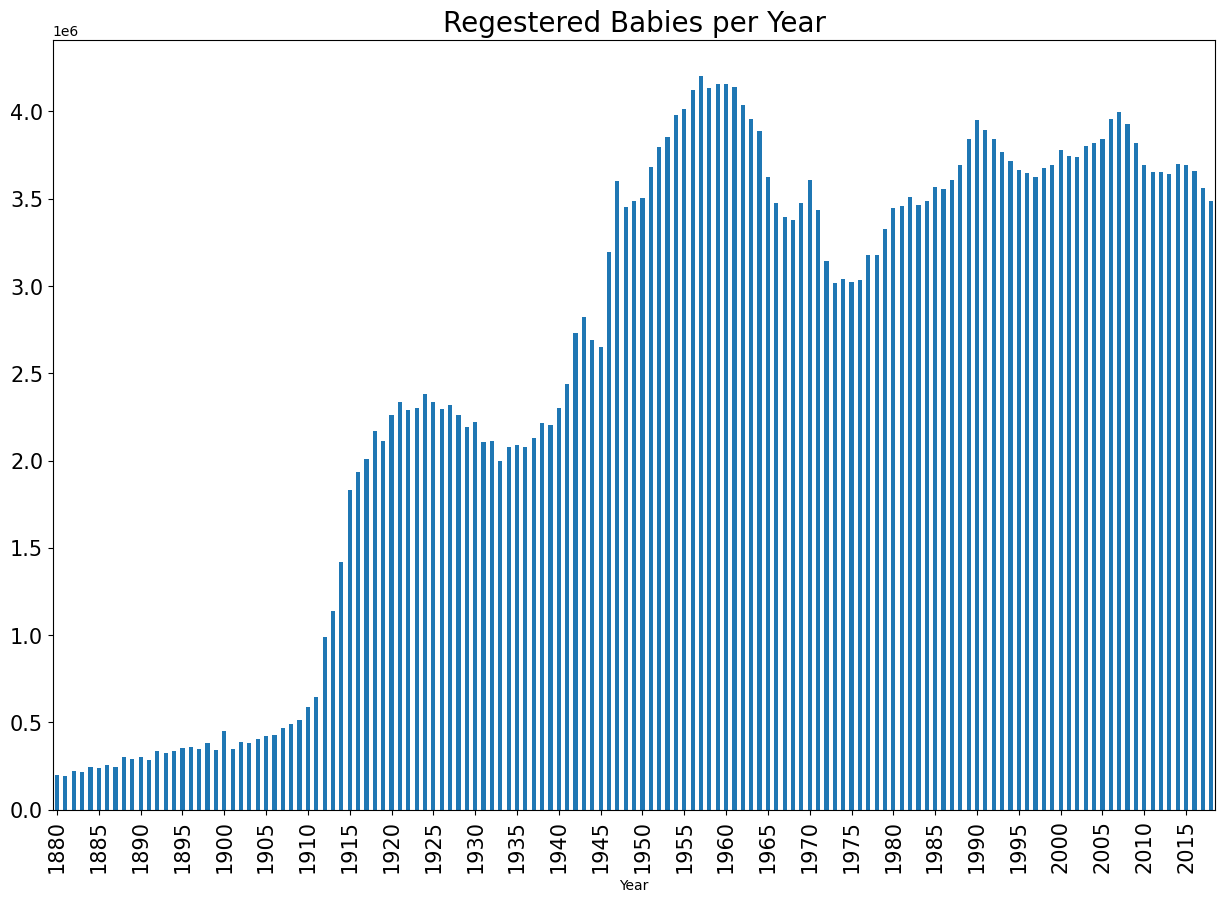

In [44]:
babies_per_year.plot(kind="bar",y="Count",figsize=(15,10),fontsize=15)
plt.xticks(ticks=(range(0,len(babies_per_year),5)), labels=range(1880,2019,5))
plt.title("Regestered Babies per Year", fontsize=20)
plt.show()

In [45]:
df

Year       Name Gender  Count
0        1880       Mary      F   7065
1        1880       Anna      F   2604
2        1880       Emma      F   2003
3        1880  Elizabeth      F   1939
4        1880     Minnie      F   1746
...       ...        ...    ...    ...
1957041  2018      Zylas      M      5
1957042  2018      Zyran      M      5
1957043  2018      Zyrie      M      5
1957044  2018      Zyron      M      5
1957045  2018      Zzyzx      M      5

[1957046 rows x 4 columns]

12. __Count__ the total number of __Unique Names per Year__ and visualize. __Create__ the following Plot:

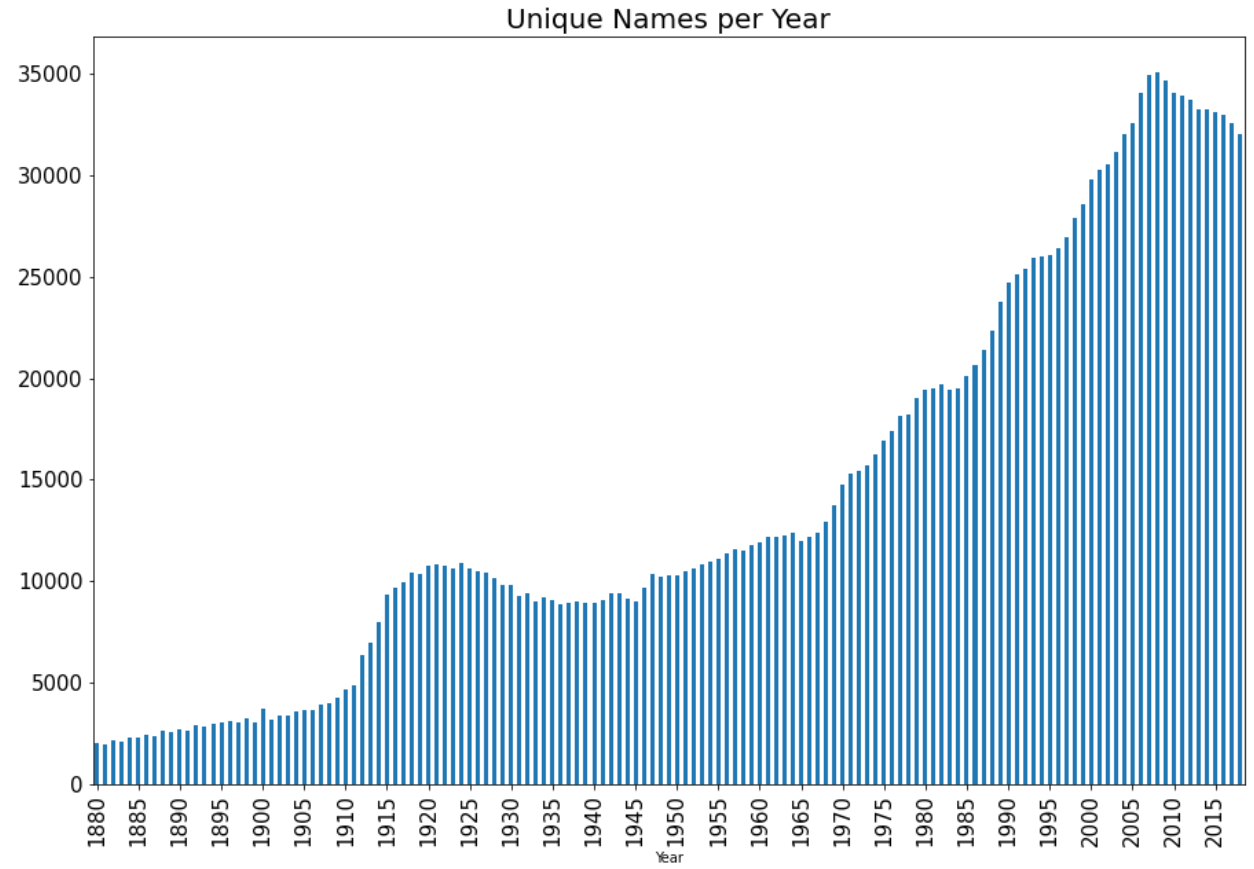

In [46]:
diff_names=df.groupby("Year").Name.count()

In [47]:
diff_names

Year
1880     2000
1881     1935
1882     2127
1883     2084
1884     2297
        ...  
2014    33243
2015    33121
2016    33010
2017    32590
2018    32033
Name: Name, Length: 139, dtype: int64

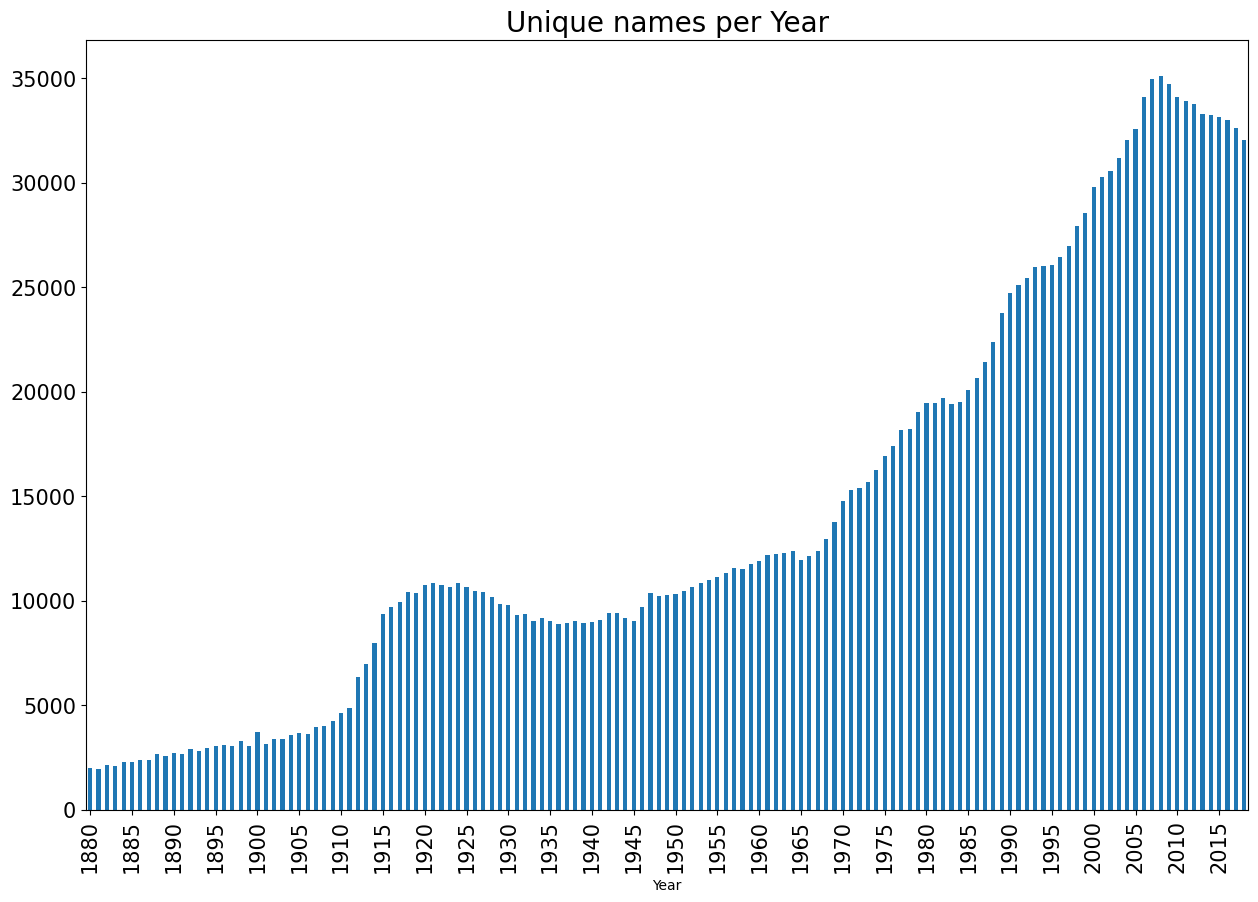

In [48]:
diff_names.plot(kind="bar",figsize=(15,10),fontsize=15)
plt.xticks(ticks=range(0,len(diff_names),5),labels=range(1880,2019,5))
plt.title("Unique names per Year", fontsize=20)
plt.show()

## Creating the Features "Popularity" and "Rank"

13. __Add__ the column __"Popularity"__ to df: <br> 

- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

14. __Add__ the column __"Rank"__ to df: <br> 

- Rank (example: assume Mary is the most popular Girl Name in 1950 -> Rank 1 for (Mary, F) in 1950.

After adding "Popularity" and "Rank", df should look as follows:

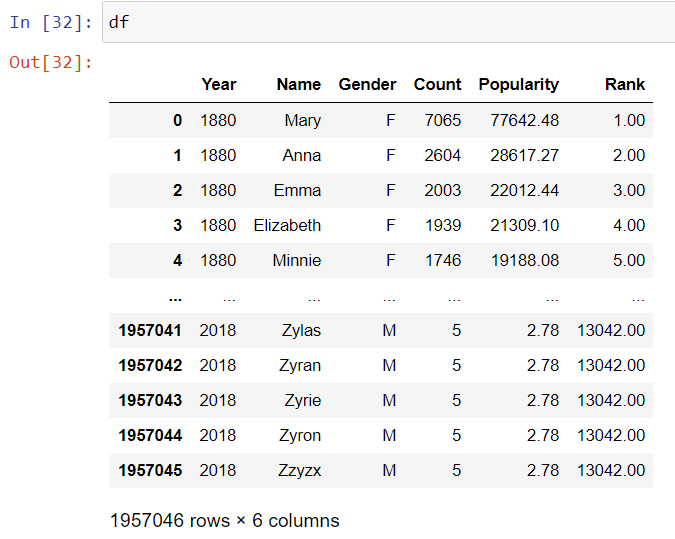

In [49]:
df

Year       Name Gender  Count
0        1880       Mary      F   7065
1        1880       Anna      F   2604
2        1880       Emma      F   2003
3        1880  Elizabeth      F   1939
4        1880     Minnie      F   1746
...       ...        ...    ...    ...
1957041  2018      Zylas      M      5
1957042  2018      Zyran      M      5
1957043  2018      Zyrie      M      5
1957044  2018      Zyron      M      5
1957045  2018      Zzyzx      M      5

[1957046 rows x 4 columns]

In [50]:
df.groupby(["Year","Gender"]).Count.transform("sum")

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [51]:
df.Count.div(df.groupby(["Year","Gender"]).Count.transform("sum"))*1000000

0         77642
1         28617
2         22012
3         21309
4         19188
           ... 
1957041       3
1957042       3
1957043       3
1957044       3
1957045       3
Name: Count, Length: 1957046, dtype: float64

In [52]:
df["Popularity"]=df.Count.div(df.groupby(["Year","Gender"]).Count.transform("sum"))*1000000

In [53]:
df

Year       Name Gender  Count  Popularity
0        1880       Mary      F   7065       77642
1        1880       Anna      F   2604       28617
2        1880       Emma      F   2003       22012
3        1880  Elizabeth      F   1939       21309
4        1880     Minnie      F   1746       19188
...       ...        ...    ...    ...         ...
1957041  2018      Zylas      M      5           3
1957042  2018      Zyran      M      5           3
1957043  2018      Zyrie      M      5           3
1957044  2018      Zyron      M      5           3
1957045  2018      Zzyzx      M      5           3

[1957046 rows x 5 columns]

In [54]:
df.groupby(["Year","Gender"]).Count.apply(lambda x: x.rank(ascending=False))

0             1
1             2
2             3
3             4
4             5
           ... 
1957041   13042
1957042   13042
1957043   13042
1957044   13042
1957045   13042
Name: Count, Length: 1957046, dtype: float64

In [55]:
df["Rank"]=df.groupby(["Year","Gender"]).Count.apply(lambda x: x.rank(ascending=False))

In [56]:
df

Year       Name Gender  Count  Popularity  Rank
0        1880       Mary      F   7065       77642     1
1        1880       Anna      F   2604       28617     2
2        1880       Emma      F   2003       22012     3
3        1880  Elizabeth      F   1939       21309     4
4        1880     Minnie      F   1746       19188     5
...       ...        ...    ...    ...         ...   ...
1957041  2018      Zylas      M      5           3 13042
1957042  2018      Zyran      M      5           3 13042
1957043  2018      Zyrie      M      5           3 13042
1957044  2018      Zyron      M      5           3 13042
1957045  2018      Zzyzx      M      5           3 13042

[1957046 rows x 6 columns]

In [57]:
df[(df.Year==2018) & (df.Gender=="M")].tail(60)

Year       Name Gender  Count  Popularity  Rank
1956986  2018     Zachry      M      5           3 13042
1956987  2018      Zaeed      M      5           3 13042
1956988  2018     Zahavi      M      5           3 13042
1956989  2018     Zaheir      M      5           3 13042
1956990  2018     Zahyan      M      5           3 13042
1956991  2018    Zaidenn      M      5           3 13042
1956992  2018      Zaier      M      5           3 13042
1956993  2018     Zailyn      M      5           3 13042
1956994  2018      Zaion      M      5           3 13042
1956995  2018     Zakery      M      5           3 13042
1956996  2018     Zakobe      M      5           3 13042
1956997  2018      Zakyi      M      5           3 13042
1956998  2018      Zalik      M      5           3 13042
1956999  2018        Zam      M      5           3 13042
1957000  2018  Zamarrion      M      5           3 13042
1957001  2018     Zameir      M      5           3 13042
1957002  2018        Zan      M      5           3 13042
1957003  2018     Zandon      M      5           3 13042
1957004  2018     Zandyn      M      5           3 13042
1957005  2018     Zanoah      M      5           3 13042
1957006  2018     Zathan      M      5           3 13042
1957007  2018     Zaviel      M      5           3 13042
1957008  2018      Zavin      M      5           3 13042
1957009  2018       Zaye      M      5           3 13042
1957010  2018   Zaytoven      M      5           3 13042
1957011  2018        Zee      M      5           3 13042
1957012  2018       Zeev      M      5           3 13042
1957013  2018   Zeferino      M      5           3 13042
1957014  2018       Zell      M      5           3 13042
1957015  2018      Zenas      M      5           3 13042
1957016  2018    Zerrick      M      5           3 13042
1957017  2018     Zeshan      M      5           3 13042
1957018  2018      Zevan      M      5           3 13042
1957019  2018    Zhander      M      5           3 13042
1957020  2018       Zhen      M      5           3 13042
1957021  2018      Zheng      M      5           3 13042
1957022  2018    Zhiheng      M      5           3 13042
1957023  2018      Ziaan      M      5           3 13042
1957024  2018     Zichen      M      5           3 13042
1957025  2018      Zidon      M      5           3 13042
1957026  2018       Zien      M      5           3 13042
1957027  2018       Zier      M      5           3 13042
1957028  2018     Zierre      M      5           3 13042
1957029  2018      Zihir      M      5           3 13042
1957030  2018        Zim      M      5           3 13042
1957031  2018        Zin      M      5           3 13042
1957032  2018      Zishe      M      5           3 13042
1957033  2018      Zmari      M      5           3 13042
1957034  2018       Zoel      M      5           3 13042
1957035  2018       Zola      M      5           3 13042
1957036  2018      Zuber      M      5           3 13042
1957037  2018     Zubeyr      M      5           3 13042
1957038  2018      Zyell      M      5           3 13042
1957039  2018     Zyheem      M      5           3 13042
1957040  2018     Zykeem      M      5           3 13042
1957041  2018      Zylas      M      5           3 13042
1957042  2018      Zyran      M      5           3 13042
1957043  2018      Zyrie      M      5           3 13042
1957044  2018      Zyron      M      5           3 13042
1957045  2018      Zzyzx      M      5           3 13042

In [58]:
df[(df.Year==2018) & (df.Gender=="F")].Popularity.sum()

999999.9999999999

## Visualizing Name Trends over Time

15. __Visualize__ Popularity and Rank over time (see example below).

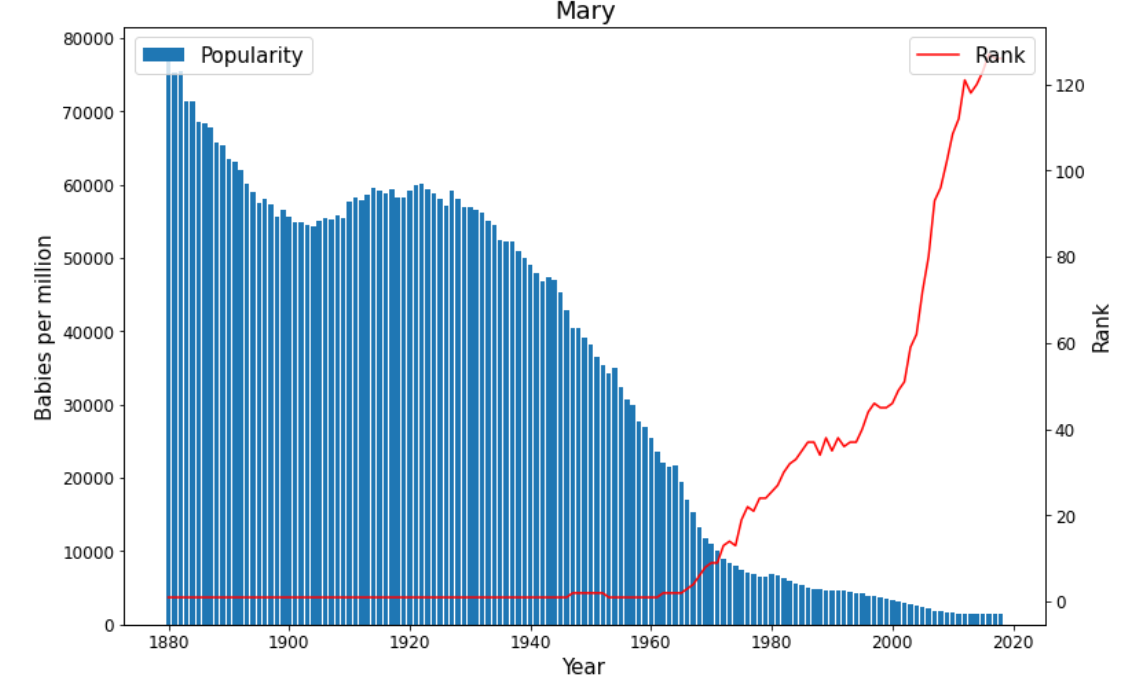

16. __Create__ this plot for all __Evergreen Names__ (see Questions 5. and 6.) (a reusable user-defined function might help)

In [59]:
df

Year       Name Gender  Count  Popularity  Rank
0        1880       Mary      F   7065       77642     1
1        1880       Anna      F   2604       28617     2
2        1880       Emma      F   2003       22012     3
3        1880  Elizabeth      F   1939       21309     4
4        1880     Minnie      F   1746       19188     5
...       ...        ...    ...    ...         ...   ...
1957041  2018      Zylas      M      5           3 13042
1957042  2018      Zyran      M      5           3 13042
1957043  2018      Zyrie      M      5           3 13042
1957044  2018      Zyron      M      5           3 13042
1957045  2018      Zzyzx      M      5           3 13042

[1957046 rows x 6 columns]

In [60]:
mary=df[(df.Name=="Mary") & (df.Gender=="F")]
mary.tail(60)

Year  Name Gender  Count  Popularity  Rank
560704   1959  Mary      F  54474       26927     1
572471   1960  Mary      F  51475       25457     1
584392   1961  Mary      F  47680       23632     1
596575   1962  Mary      F  43486       22113     2
608784   1963  Mary      F  41550       21559     2
621066   1964  Mary      F  40990       21633     2
633463   1965  Mary      F  34270       19416     2
645416   1966  Mary      F  28884       17072     3
657568   1967  Mary      F  25313       15333     4
669967   1968  Mary      F  21725       13245     6
682905   1969  Mary      F  19851       11767     8
696655   1970  Mary      F  19203       10985     9
711434   1971  Mary      F  16697       10037     9
726733   1972  Mary      F  13761        9047    13
742146   1973  Mary      F  12316        8446    14
757827   1974  Mary      F  11738        7999    13
774082   1975  Mary      F  10967        7523    19
791029   1976  Mary      F  10318        7042    22
808419   1977  Mary      F  10659        6953    21
826597   1978  Mary      F  10043        6556    24
844828   1979  Mary      F  10561        6579    24
863869   1980  Mary      F  11474        6911    26
883322   1981  Mary      F  11045        6622    27
902800   1982  Mary      F  10855        6411    30
922496   1983  Mary      F   9897        5925    32
941904   1984  Mary      F   9290        5518    33
961412   1985  Mary      F   9244        5373    35
981499   1986  Mary      F   8506        4959    37
1002156  1987  Mary      F   8395        4829    37
1023559  1988  Mary      F   8510        4780    34
1045930  1989  Mary      F   8644        4689    38
1069702  1990  Mary      F   8667        4566    35
1094421  1991  Mary      F   8760        4673    38
1119528  1992  Mary      F   8458        4588    36
1144956  1993  Mary      F   8120        4489    37
1170922  1994  Mary      F   7752        4342    37
1196922  1995  Mary      F   7455        4240    40
1223006  1996  Mary      F   6961        3972    44
1249431  1997  Mary      F   6644        3818    46
1276400  1998  Mary      F   6458        3656    45
1304302  1999  Mary      F   6374        3594    45
1332855  2000  Mary      F   6198        3414    46
1362630  2001  Mary      F   5732        3185    49
1392906  2002  Mary      F   5463        3042    51
1423478  2003  Mary      F   5017        2747    59
1454666  2004  Mary      F   4810        2621    62
1486724  2005  Mary      F   4459        2415    72
1519281  2006  Mary      F   4091        2153    80
1553382  2007  Mary      F   3686        1919    93
1588346  2008  Mary      F   3499        1852    96
1623431  2009  Mary      F   3163        1724   102
1658147  2010  Mary      F   2871        1617   108
1692223  2011  Mary      F   2706        1540   112
1726140  2012  Mary      F   2576        1465   121
1759884  2013  Mary      F   2651        1514   118
1793168  2014  Mary      F   2632        1477   120
1826414  2015  Mary      F   2631        1478   123
1859539  2016  Mary      F   2508        1420   127
1892548  2017  Mary      F   2402        1397   126
1925138  2018  Mary      F   2327        1379   126

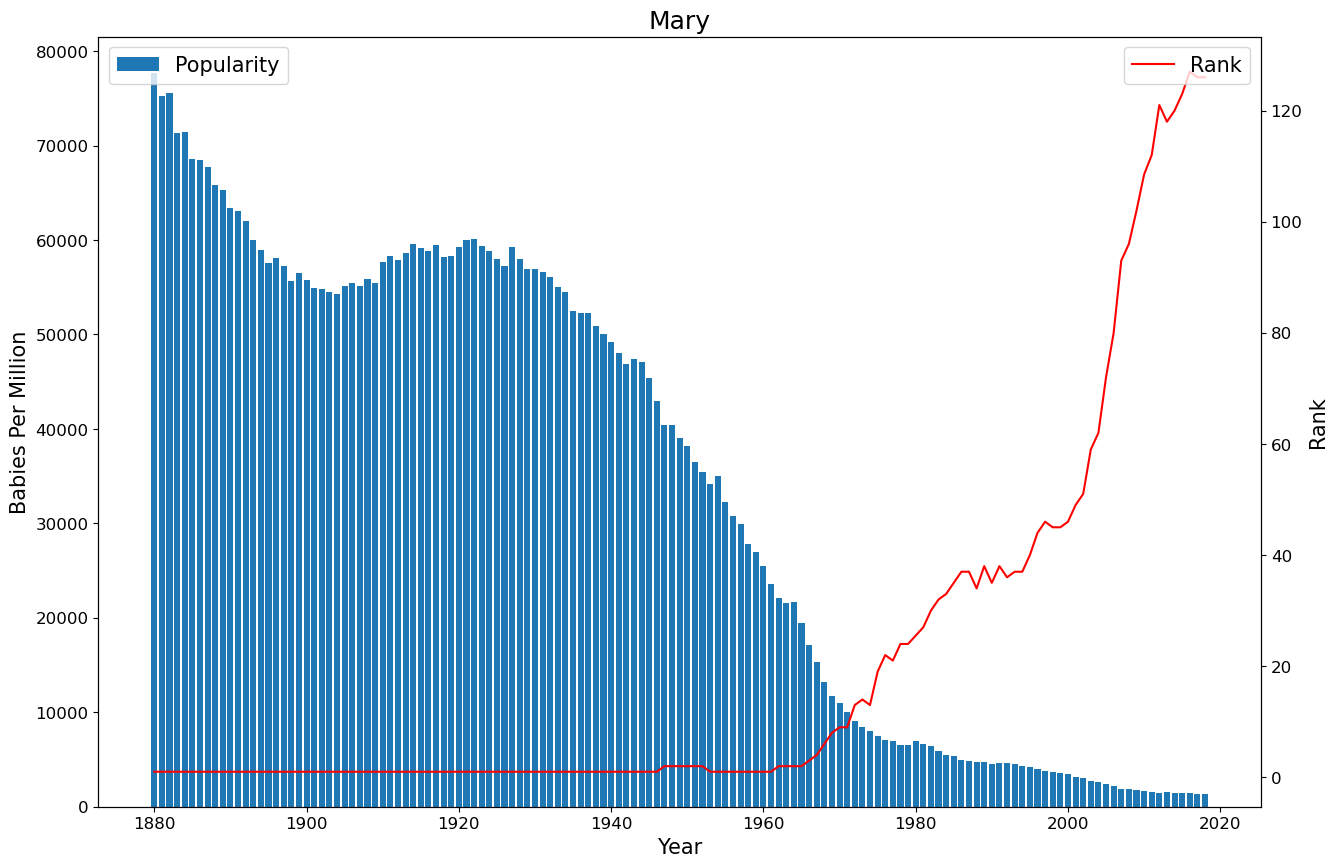

In [61]:
fig, ax1=plt.subplots(figsize=(15,10))
ax1.bar(x=mary.Year, height=mary.Popularity, label="Popularity")
ax2=ax1.twinx()
ax2.plot(mary.Year,mary.Rank,color="red",label="Rank")
ax1.set_xlabel("Year",fontsize=15)
ax1.set_ylabel("Babies Per Million", fontsize=15)
ax2.set_ylabel("Rank", fontsize=15)
ax1.set_title("Mary",fontsize=18)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax1.legend(loc=2,fontsize=15)
ax2.legend(loc=1,fontsize=15)
plt.show()

In [62]:
def plot_name(name,gender, crit="Popularity"):
    data=df.loc[(df.Name==name) & (df.Gender==gender),["Name","Gender","Year","Rank",crit]]
    data=data.set_index("Year")
    
    fig, ax1=plt.subplots(figsize=(15,10))
    ax1.bar(x=data.index, height=data[crit], label=crit)
    ax2=ax1.twinx()
    ax2.plot(data.index,data.Rank,color="red",label="Rank")
    ax1.set_xlabel("Year",fontsize=15)
    ax1.set_ylabel(crit, fontsize=15)
    ax2.set_ylabel("Rank", fontsize=15)
    ax1.set_title(name,fontsize=18)
    ax1.tick_params(labelsize=12)
    ax2.tick_params(labelsize=12)
    ax1.legend(loc=2,fontsize=15)
    ax2.legend(loc=1,fontsize=15)
    plt.show()

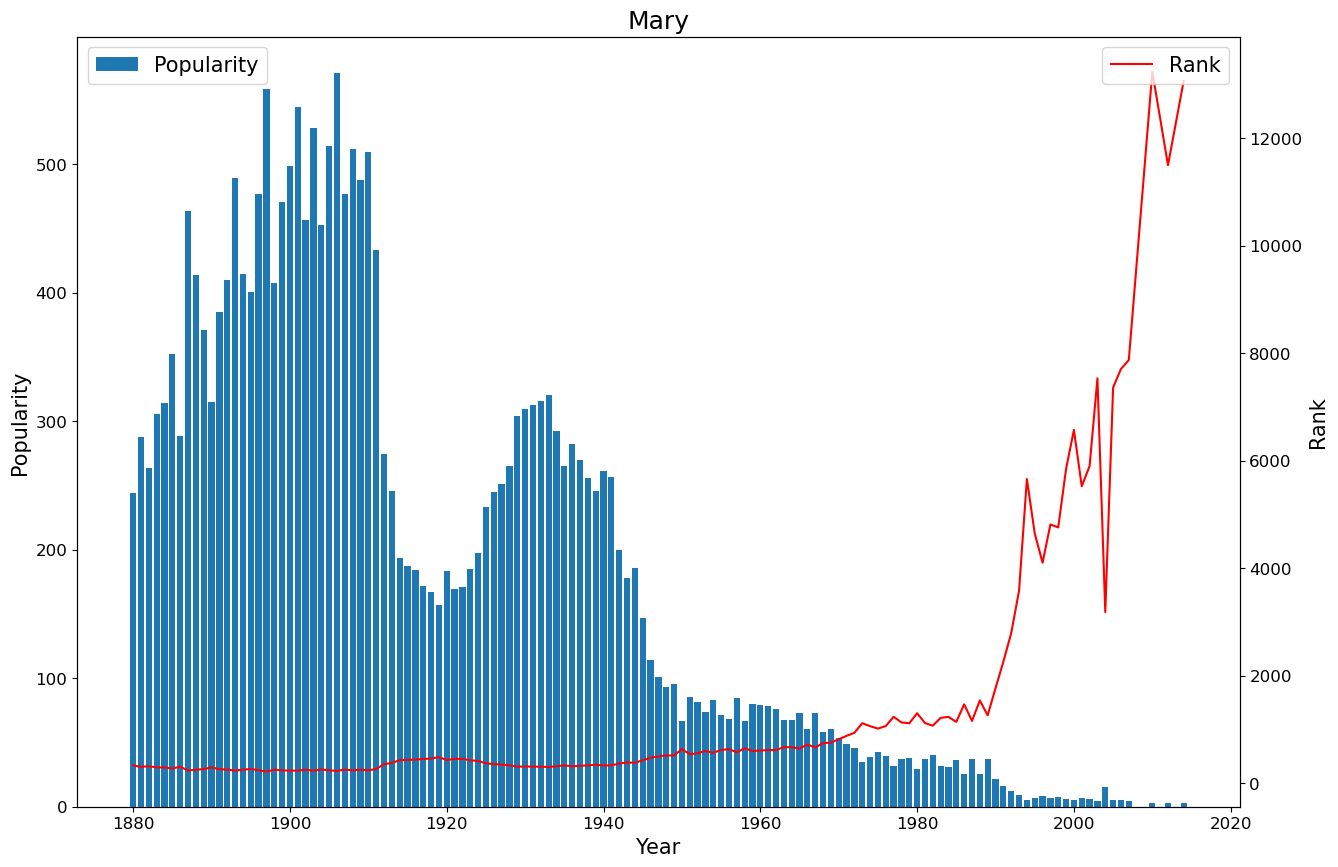

In [63]:
plot_name("Mary","M")

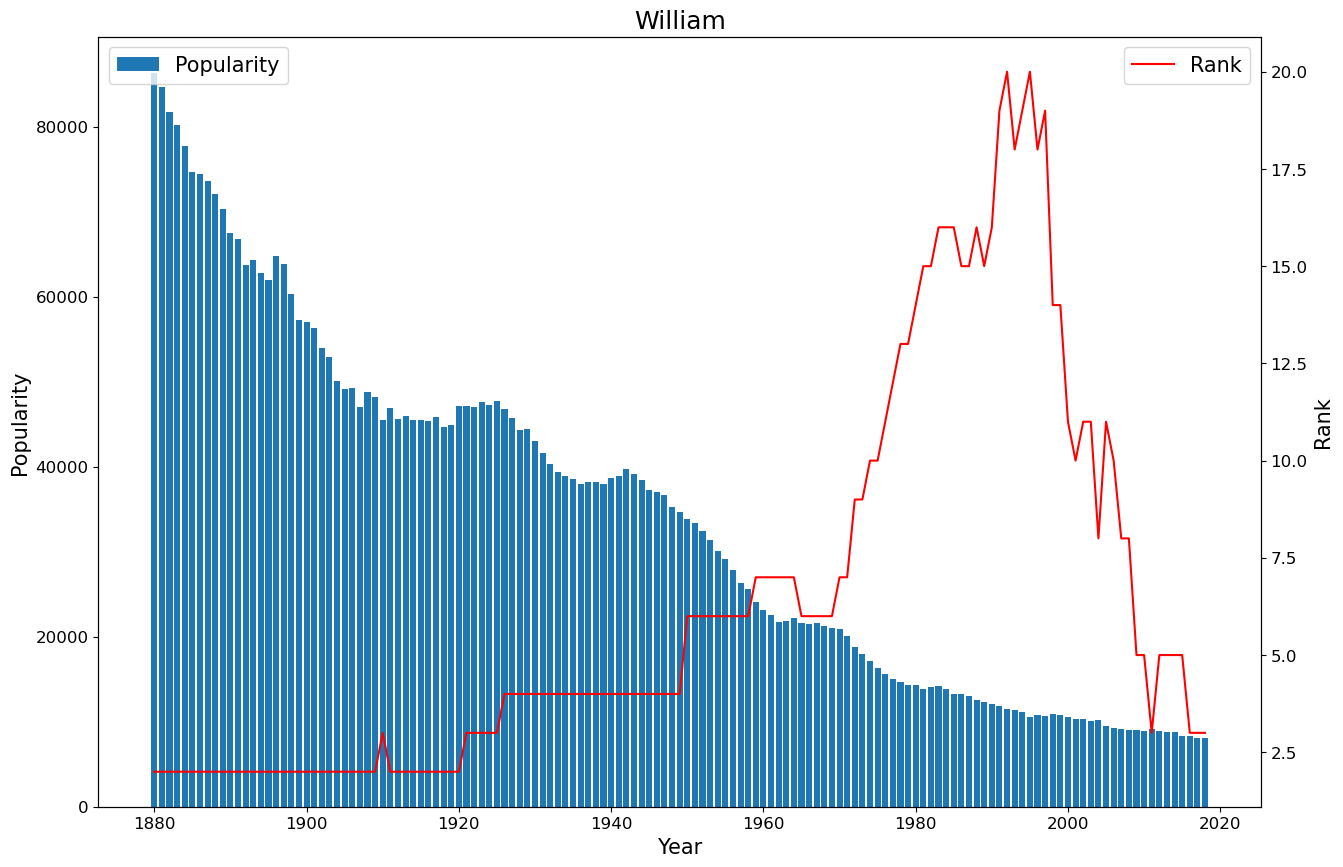

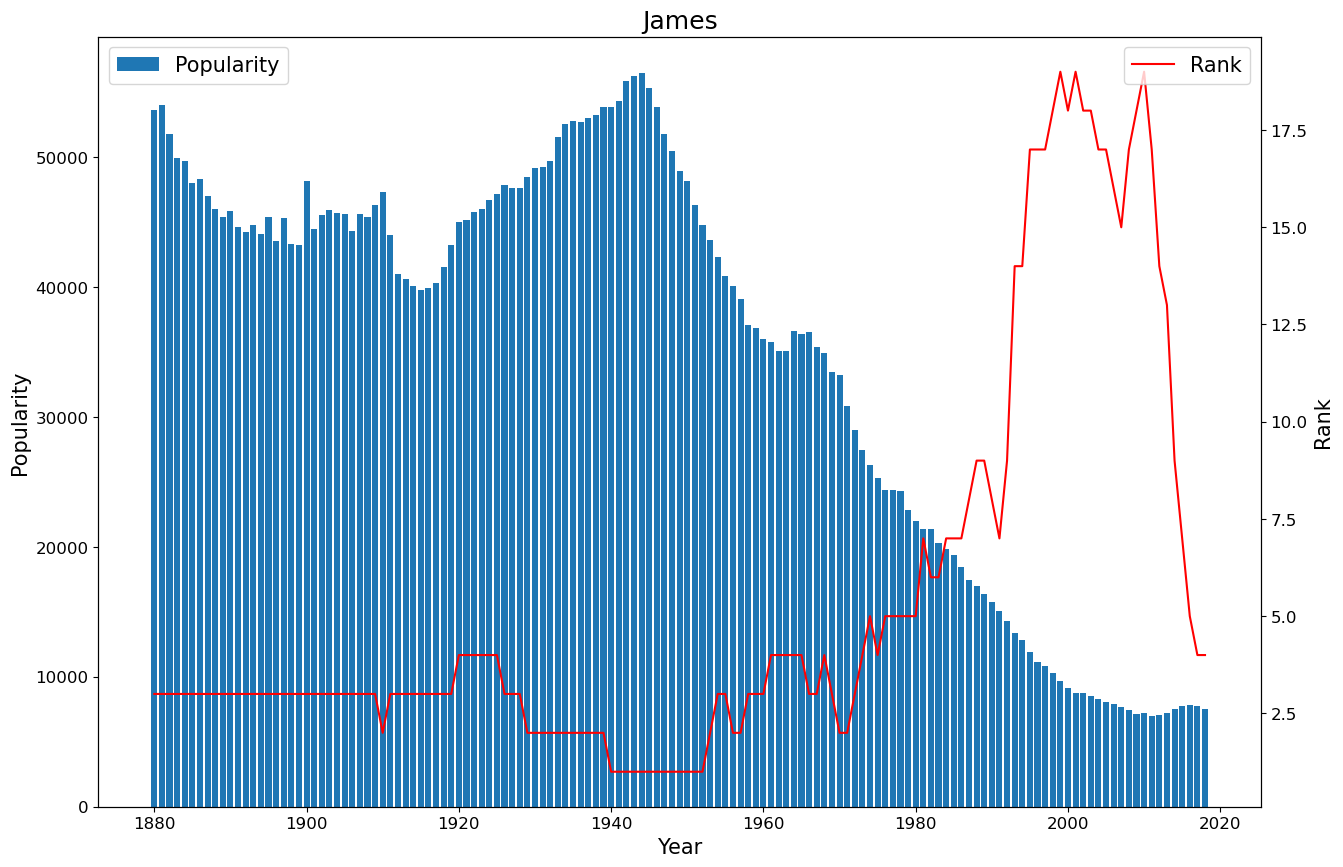

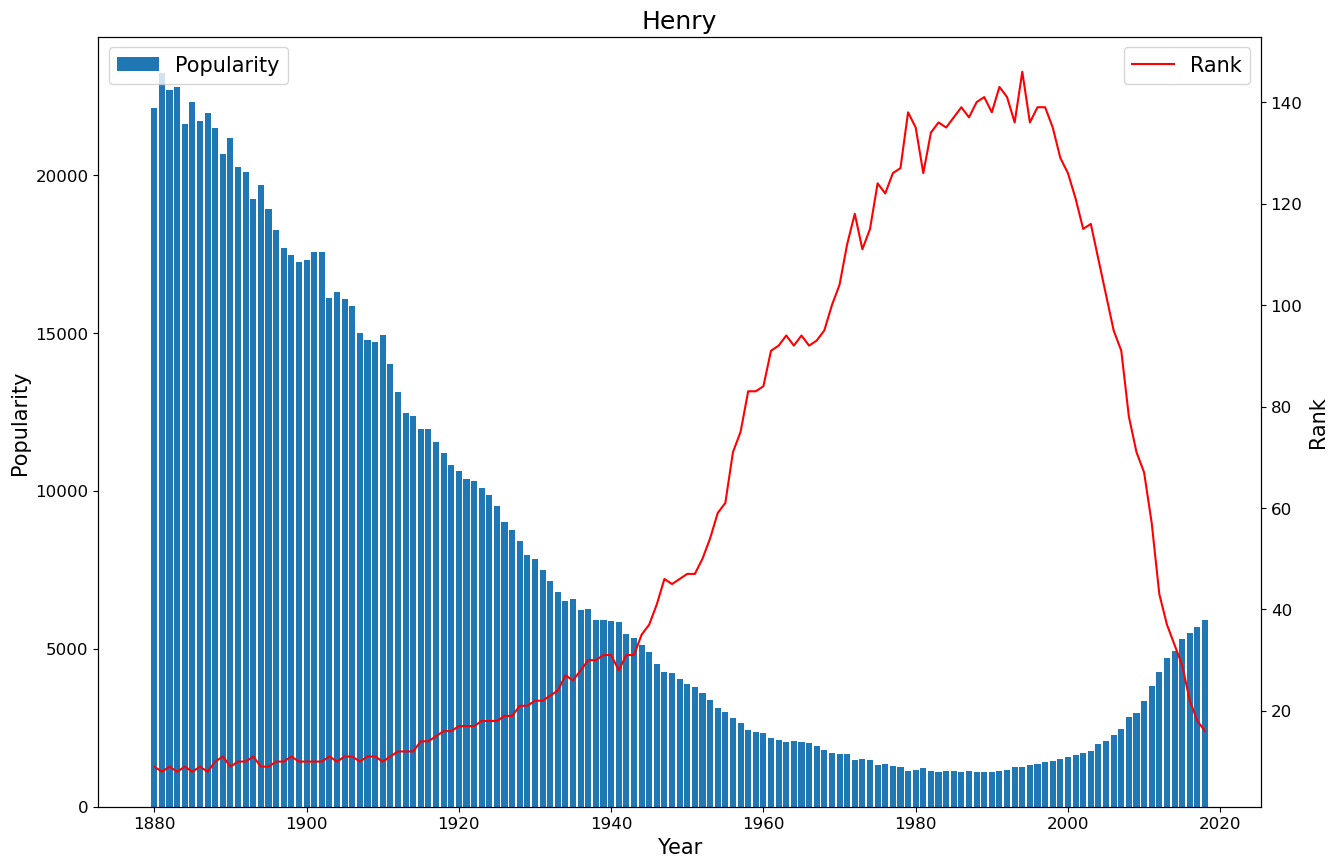

In [64]:
for name in m_evergreen.Name:
    plot_name(name,"M",crit="Popularity")

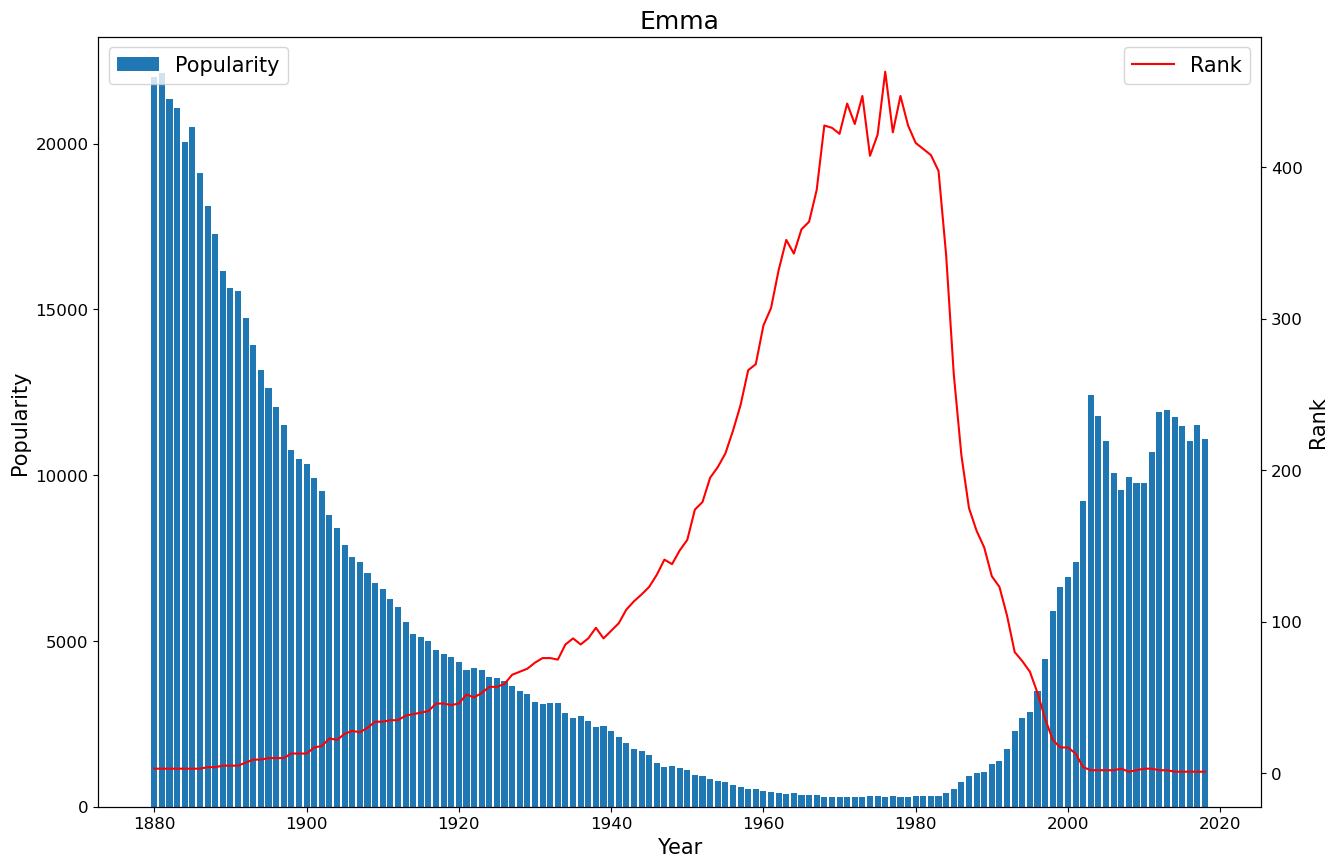

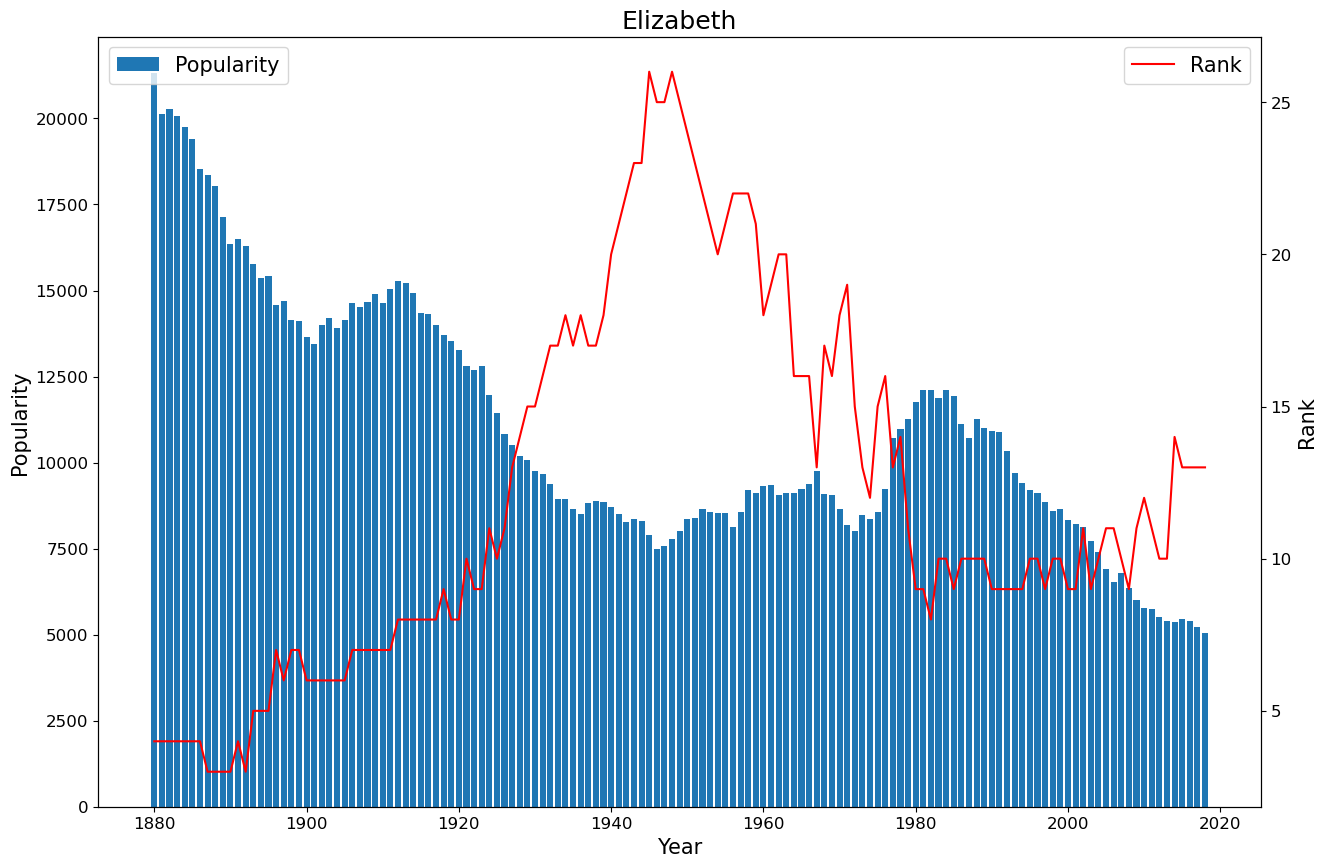

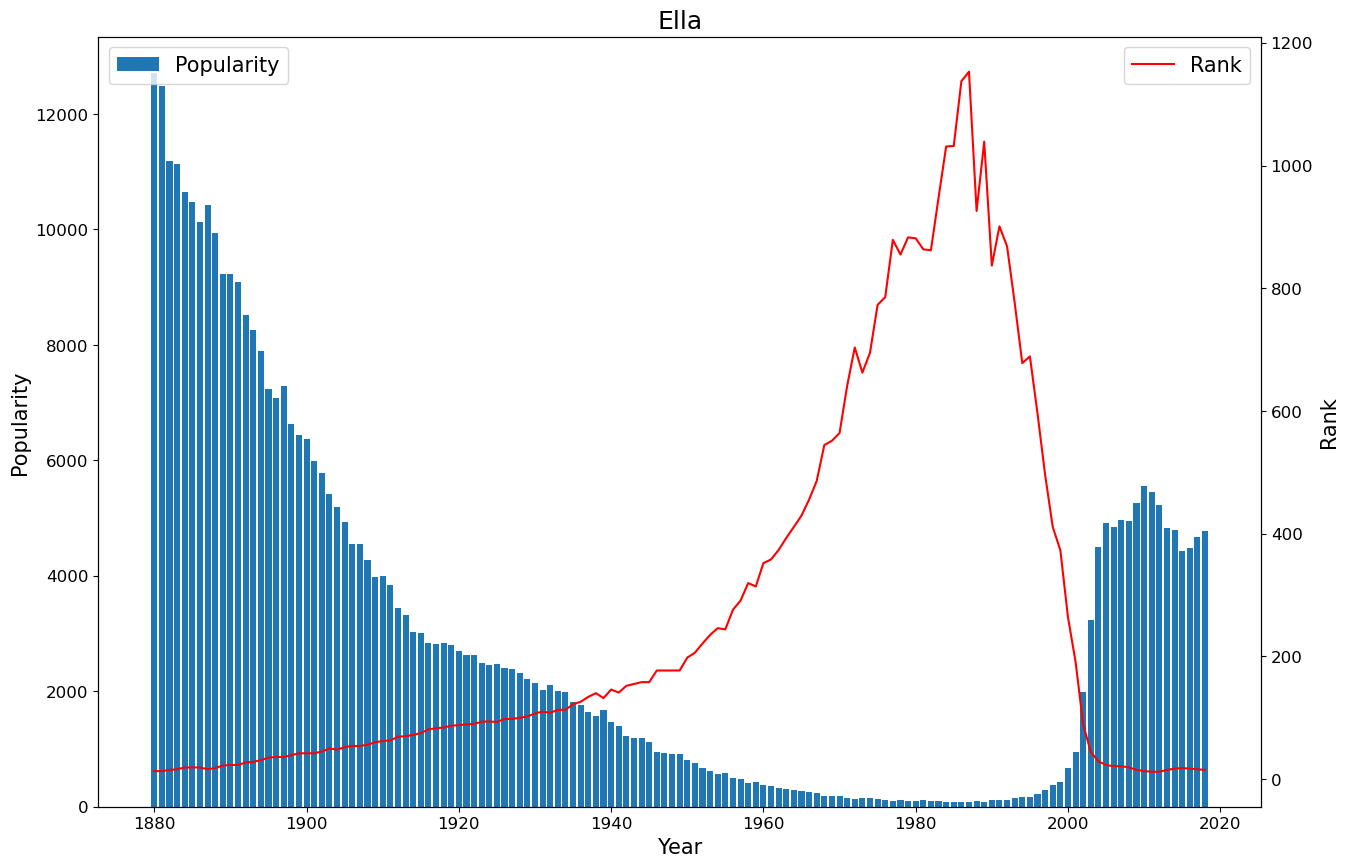

In [65]:
for name in f_evergreen.Name:
    plot_name(name,"F",crit="Popularity")

# Why does a Name´s Popularity suddenly change? (Part 1)

17. __Add__ the additional columns __"Pop_lag1"__ (Popularity one year ago) and __"Pop_diff"__ (change in popularity from previous year to this year) to df.  

18. __Create__ df2 starting with the __year 1900__ (from 1900 till today).

19. __Filter__ df2 and find the __20 largest values__ in "Pop_diff" (get complete rows).

20. __Create__ the popularity/rank plot (see 15. and 16.) for the Names filtered in 19.

21. __Search__ the Web for the Names __"Linda"__, __"Shirley"__ and __"Jason"__ and __find out__ why the popularity suddenly changed/spiked.

In [66]:
df

Year       Name Gender  Count  Popularity  Rank
0        1880       Mary      F   7065       77642     1
1        1880       Anna      F   2604       28617     2
2        1880       Emma      F   2003       22012     3
3        1880  Elizabeth      F   1939       21309     4
4        1880     Minnie      F   1746       19188     5
...       ...        ...    ...    ...         ...   ...
1957041  2018      Zylas      M      5           3 13042
1957042  2018      Zyran      M      5           3 13042
1957043  2018      Zyrie      M      5           3 13042
1957044  2018      Zyron      M      5           3 13042
1957045  2018      Zzyzx      M      5           3 13042

[1957046 rows x 6 columns]

In [67]:
df.loc[(df.Name=="Mary") & (df.Gender=="F"), "Popularity"].shift()

0           NaN
2000      77642
3935      75245
6062      75551
8146      71333
           ... 
1793168    1514
1826414    1477
1859539    1478
1892548    1420
1925138    1397
Name: Popularity, Length: 139, dtype: float64

In [68]:
df["Pop_lag1"]=df.groupby(["Name","Gender"]).Popularity.shift()

In [69]:
df

Year       Name Gender  Count  Popularity  Rank  Pop_lag1
0        1880       Mary      F   7065       77642     1       NaN
1        1880       Anna      F   2604       28617     2       NaN
2        1880       Emma      F   2003       22012     3       NaN
3        1880  Elizabeth      F   1939       21309     4       NaN
4        1880     Minnie      F   1746       19188     5       NaN
...       ...        ...    ...    ...         ...   ...       ...
1957041  2018      Zylas      M      5           3 13042         4
1957042  2018      Zyran      M      5           3 13042         3
1957043  2018      Zyrie      M      5           3 13042         3
1957044  2018      Zyron      M      5           3 13042         8
1957045  2018      Zzyzx      M      5           3 13042         3

[1957046 rows x 7 columns]

In [70]:
df[df.Name=="Ashanti"]

Year     Name Gender  Count  Popularity  Rank  Pop_lag1
700697   1970  Ashanti      F     14           8  4142       NaN
708512   1970  Ashanti      M     14           8  2565       NaN
714597   1971  Ashanti      F     21          13  3216         8
724746   1971  Ashanti      M      8           5  3809         8
729787   1972  Ashanti      F     21          14  3117        13
...       ...      ...    ...    ...         ...   ...       ...
1827752  2015  Ashanti      F    157          88  1464       103
1857597  2015  Ashanti      M      5           3 13046         3
1860841  2016  Ashanti      F    161          91  1432        88
1893982  2017  Ashanti      F    140          81  1562        91
1926397  2018  Ashanti      F    161          95  1387        81

[88 rows x 7 columns]

In [71]:
df.loc[(df.Year>1880) & (df.Pop_lag1.isna()),"Pop_lag1"]=0

In [72]:
df[df.Name=="Ashanti"]

Year     Name Gender  Count  Popularity  Rank  Pop_lag1
700697   1970  Ashanti      F     14           8  4142         0
708512   1970  Ashanti      M     14           8  2565         0
714597   1971  Ashanti      F     21          13  3216         8
724746   1971  Ashanti      M      8           5  3809         8
729787   1972  Ashanti      F     21          14  3117        13
...       ...      ...    ...    ...         ...   ...       ...
1827752  2015  Ashanti      F    157          88  1464       103
1857597  2015  Ashanti      M      5           3 13046         3
1860841  2016  Ashanti      F    161          91  1432        88
1893982  2017  Ashanti      F    140          81  1562        91
1926397  2018  Ashanti      F    161          95  1387        81

[88 rows x 7 columns]

In [73]:
df["Pop_diff"]=df.Popularity-df.Pop_lag1

In [74]:
df[(df.Name=="Mary") & (df.Gender=="F")]

Year  Name Gender  Count  Popularity  Rank  Pop_lag1  Pop_diff
0        1880  Mary      F   7065       77642     1       NaN       NaN
2000     1881  Mary      F   6919       75245     1     77642     -2398
3935     1882  Mary      F   8148       75551     1     75245       307
6062     1883  Mary      F   8012       71333     1     75551     -4219
8146     1884  Mary      F   9217       71439     1     71333       107
...       ...   ...    ...    ...         ...   ...       ...       ...
1793168  2014  Mary      F   2632        1477   120      1514       -37
1826414  2015  Mary      F   2631        1478   123      1477         1
1859539  2016  Mary      F   2508        1420   127      1478       -58
1892548  2017  Mary      F   2402        1397   126      1420       -23
1925138  2018  Mary      F   2327        1379   126      1397       -18

[139 rows x 8 columns]

In [75]:
df2=df[df.Year >=1900].copy()

In [76]:
df2

Year      Name Gender  Count  Popularity  Rank  Pop_lag1  Pop_diff
52265    1900      Mary      F  16706       55724     1     56527      -802
52266    1900     Helen      F   6343       21158     2     21663      -506
52267    1900      Anna      F   6114       20394     3     21951     -1557
52268    1900  Margaret      F   5304       17692     4     18234      -542
52269    1900      Ruth      F   4765       15894     5     16788      -894
...       ...       ...    ...    ...         ...   ...       ...       ...
1957041  2018     Zylas      M      5           3 13042         4        -1
1957042  2018     Zyran      M      5           3 13042         3        -0
1957043  2018     Zyrie      M      5           3 13042         3         0
1957044  2018     Zyron      M      5           3 13042         8        -5
1957045  2018     Zzyzx      M      5           3 13042         3         0

[1904781 rows x 8 columns]

In [77]:
df2.nlargest(20,"Pop_diff")

Year      Name Gender  Count  Popularity  Rank  Pop_lag1  Pop_diff
431066   1947     Linda      F  99689       56236     1     33547     22689
321479   1935   Shirley      F  42358       40398     2     21874     18524
922468   1983    Ashley      F  33293       19930     4      8775     11156
711426   1971  Jennifer      F  56783       34134     1     26403      7730
726721   1972  Jennifer      F  63603       41813     1     34134      7680
312301   1934   Shirley      F  22840       21874     4     14203      7671
645417   1966  Michelle      F  27151       16047     4      9186      6861
751941   1973     Jason      M  46683       29940     3     23081      6859
844807   1979    Amanda      F  31928       19890     3     13394      6496
696647   1970  Jennifer      F  46157       26403     1     19978      6425
472253   1951   Deborah      F  42052       23351     4     16965      6386
366312   1940     Linda      F  18369       16065     8      9770      6295
838069   1978  Nicholas      M  16353        9956    25      3699      6256
472267   1951     Debra      F  17066        9477    18      3608      5869
461953   1950   Deborah      F  29063       16965     7     11228      5738
791025   1976     Jamie      F  12538        8558    18      2904      5653
608783   1963      Lisa      F  56040       29077     1     23431      5646
633462   1965      Lisa      F  60269       34146     1     28645      5501
706008   1970     Jason      M  27287       14677    13      9221      5456
1045895  1989  Brittany      F  37788       20500     3     15061      5439

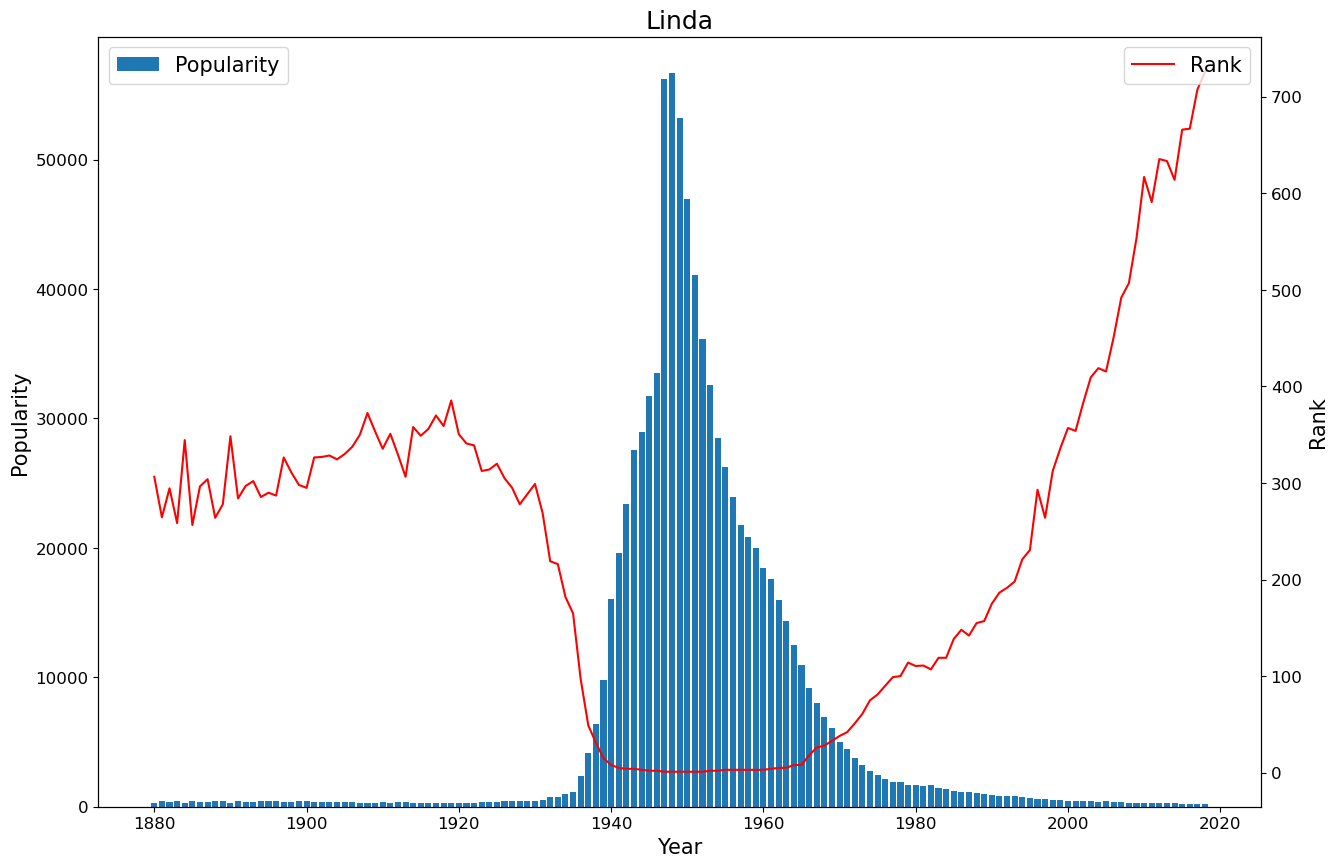

In [78]:
plot_name("Linda","F")

In [79]:
df2.nsmallest(20,"Pop_diff")

Year      Name Gender  Count  Popularity  Rank  Pop_lag1  Pop_diff
339412   1937   Shirley      F  26816       25204     4     33798     -8593
330516   1936   Shirley      F  35161       33798     2     40398     -6601
461947   1950     Linda      F  80431       46952     1     53199     -6248
472250   1951     Linda      F  73978       41079     1     46952     -5872
961380   1985  Jennifer      F  42651       24789     3     30032     -5243
482712   1952     Linda      F  67082       36174     1     41079     -4905
696648   1970      Lisa      F  38963       22288     2     26692     -4404
437173   1947   Richard      M  58521       31990     5     36252     -4263
537623   1957   Deborah      F  40071       19601     6     23827     -4226
504196   1954     Linda      F  55381       28520     2     32572     -4052
808401   1977       Amy      F  26732       17436     3     21391     -3955
96450    1911    Willie      M   2492       11028    14     14917     -3889
549189   1958   Cynthia      F  31003       15417     8     19237     -3820
1094386  1991  Brittany      F  29089       15516     3     19249     -3732
981466   1986  Jennifer      F  36185       21096     4     24789     -3693
57940    1901     James      M   4735       44473     3     48146     -3673
348359   1938   Shirley      F  23767       21540     5     25204     -3664
493359   1953     Linda      F  61280       32572     2     36174     -3602
895484   1981     Jason      M  41931       23404     4     26994     -3590
645418   1966     Karen      F  25446       15040     5     18624     -3584

## Why does a Name´s Popularity suddenly change? (Part 2)

_No additional assignments on this. Watch the video for some more examples._

In [80]:
df2[df2.Pop_lag1<5].nlargest(20,"Pop_diff")

Year      Name Gender  Count  Popularity  Rank  Pop_lag1  Pop_diff
758040   1974     Nakia      F   1134         773   226         5       768
808621   1977     Kizzy      F   1116         728   223         0       728
1060680  1989  Christop      M   1082         541   242         0       541
768358   1974     Nakia      M    612         389   302         0       389
820064   1977     Levar      M    523         318   342         0       318
645832   1966   Tabatha      F    500         296   419         3       293
1553888  2007   Jaslene      F    501         261   600         3       258
1223510  1996    Moesha      F    426         243   548         0       243
1070200  1990    Isamar      F    446         235   534         0       235
961890   1985      Sade      F    393         228   512         0       228
1411471  2002   Omarion      M    418         215   534         3       213
1519907  2006   Akeelah      F    403         212   707         3       209
808996   1977    Kizzie      F    286         187   598         3       184
1925889  2018    Zhavia      F    306         181   876         0       181
820207   1977     Lavar      M    279         170   486         3       167
1046569  1989  Alexandr      F    301         163   678         0       163
1250142  1997    Erykah      F    279         160   758         0       160
1060995  1989  Alexande      M    301         150   556         3       147
923162   1983      Ciji      F    244         146   699         5       141
884010   1981    Fallon      F    232         139   715         0       139

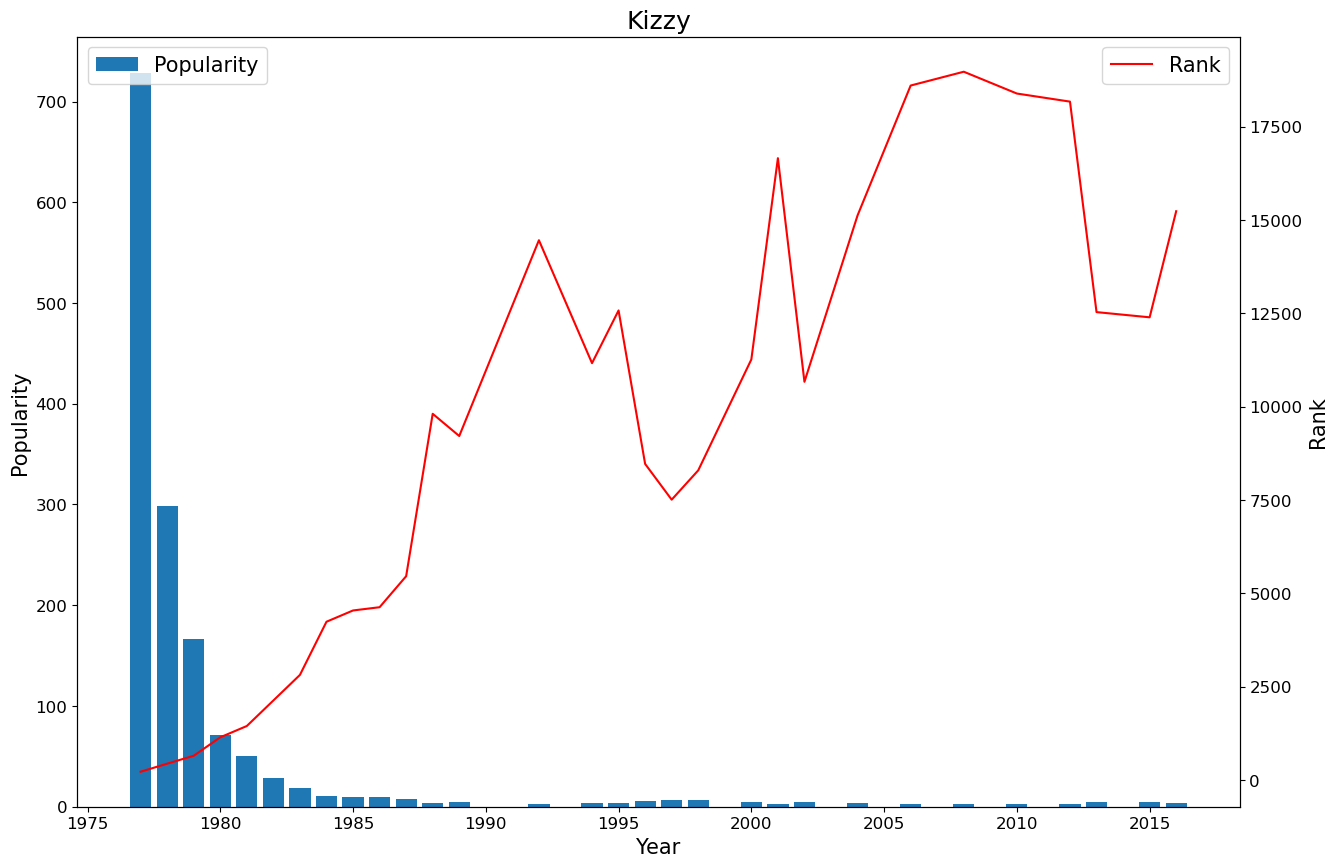

In [81]:
plot_name("Kizzy","F")

In [82]:
df2

Year      Name Gender  Count  Popularity  Rank  Pop_lag1  Pop_diff
52265    1900      Mary      F  16706       55724     1     56527      -802
52266    1900     Helen      F   6343       21158     2     21663      -506
52267    1900      Anna      F   6114       20394     3     21951     -1557
52268    1900  Margaret      F   5304       17692     4     18234      -542
52269    1900      Ruth      F   4765       15894     5     16788      -894
...       ...       ...    ...    ...         ...   ...       ...       ...
1957041  2018     Zylas      M      5           3 13042         4        -1
1957042  2018     Zyran      M      5           3 13042         3        -0
1957043  2018     Zyrie      M      5           3 13042         3         0
1957044  2018     Zyron      M      5           3 13042         8        -5
1957045  2018     Zzyzx      M      5           3 13042         3         0

[1904781 rows x 8 columns]

In [83]:
df2["%Change"]=df2.Popularity.div(df2.Pop_lag1).sub(1).mul(100)

In [84]:
df2

Year      Name Gender  Count  Popularity  Rank  Pop_lag1  Pop_diff  \
52265    1900      Mary      F  16706       55724     1     56527      -802   
52266    1900     Helen      F   6343       21158     2     21663      -506   
52267    1900      Anna      F   6114       20394     3     21951     -1557   
52268    1900  Margaret      F   5304       17692     4     18234      -542   
52269    1900      Ruth      F   4765       15894     5     16788      -894   
...       ...       ...    ...    ...         ...   ...       ...       ...   
1957041  2018     Zylas      M      5           3 13042         4        -1   
1957042  2018     Zyran      M      5           3 13042         3        -0   
1957043  2018     Zyrie      M      5           3 13042         3         0   
1957044  2018     Zyron      M      5           3 13042         8        -5   
1957045  2018     Zzyzx      M      5           3 13042         3         0   

         %Change  
52265         -1  
52266         -2  
52267         -7  
52268         -3  
52269         -5  
...          ...  
1957041      -27  
1957042      -12  
1957043        2  
1957044      -66  
1957045        6  

[1904781 rows x 9 columns]

In [85]:
pd.options.display.float_format = '{:.2f}'.format

In [86]:
df2[df2.Pop_lag1>1000].nsmallest(20,"%Change")

Year      Name Gender  Count  Popularity   Rank  Pop_lag1  Pop_diff  \
758121   1974    Katina      F    765      521.33 307.00   1696.66  -1175.33   
1119924  1992     Iesha      F    581      315.15 432.50   1011.35   -696.20   
1423744  2003   Ashanti      F    962      526.78 325.00   1639.78  -1112.99   
515370   1955    Marian      F   1499      766.78 208.00   2066.63  -1299.86   
175401   1920   Woodrow      M    774      727.18 182.50   1844.63  -1117.45   
1145180  1993   Hillary      F   1064      588.27 261.00   1367.46   -779.19   
1249716  1997    Shania      F    861      494.74 330.50   1046.99   -552.25   
54563    1900     Dewey      M    345     2292.66  75.00   4698.24  -2405.58   
275072   1930  Jeannine      F    593      526.68 258.00   1059.53   -532.85   
981635   1986    Sheena      F   1573      917.08 173.00   1779.68   -862.61   
71827    1905     Alton      M    164     1239.50 135.00   2357.05  -1117.55   
826855   1978     Aisha      F    820      535.31 282.50   1004.49   -469.18   
942066   1984  Marquita      F   1374      816.16 195.00   1522.32   -706.16   
164733   1919   Woodrow      M   1808     1844.63  91.00   3313.31  -1468.68   
58058    1901     Dewey      M    137     1286.76 121.00   2292.66  -1005.90   
1362696  2001  Brittany      F   2929     1627.37 115.00   2855.18  -1227.81   
357500   1939   Rosalie      F   2162     1971.56 114.00   3406.83  -1435.27   
902862   1982    Brooke      F   3145     1857.46  92.00   3195.17  -1337.71   
196899   1922    Warren      M   4484     4120.58  45.00   7078.77  -2958.19   
102094   1912      Will      M    256      595.42 213.50   1017.83   -422.41   

         %Change  
758121    -69.27  
1119924   -68.84  
1423744   -67.87  
515370    -62.90  
175401    -60.58  
1145180   -56.98  
1249716   -52.75  
54563     -51.20  
275072    -50.29  
981635    -48.47  
71827     -47.41  
826855    -46.71  
942066    -46.39  
164733    -44.33  
58058     -43.87  
1362696   -43.00  
357500    -42.13  
902862    -41.87  
196899    -41.79  
102094    -41.50

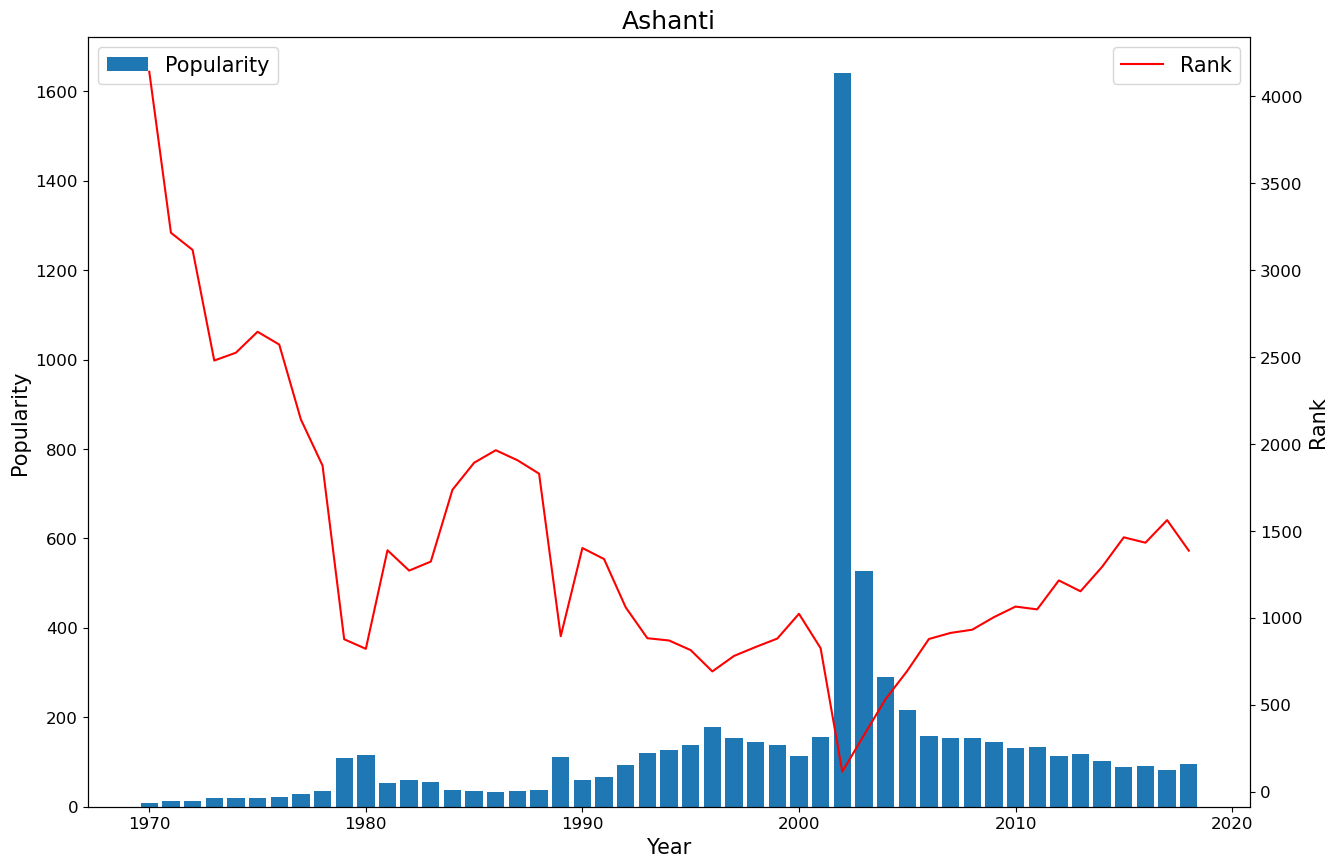

In [87]:
plot_name("Ashanti","F")

## Persistant vs. Spike-Fade Names

_No additional assignments on this. Watch the video for some more advanced examples._

In [89]:
agg

Name Gender  Total  No_Year  First_Year  Last_Year  Max_Count  \
0         Aaban      M    114       11        2007       2018         16   
1         Aabha      F     35        5        2011       2016          9   
2         Aabid      M     16        3        2003       2018          6   
3       Aabidah      F      5        1        2018       2018          5   
4         Aabir      M     10        2        2016       2018          5   
...         ...    ...    ...      ...         ...        ...        ...   
109168   Zyvion      M      5        1        2009       2009          5   
109169    Zyvon      M      7        1        2015       2015          7   
109170  Zyyanna      F      6        1        2010       2010          6   
109171    Zyyon      M      6        1        2014       2014          6   
109172    Zzyzx      M     10        2        2010       2018          5   

        Best_Year  
0            2014  
1            2014  
2            2018  
3            2018  
4            2016  
...           ...  
109168       2009  
109169       2015  
109170       2010  
109171       2014  
109172       2010  

[109173 rows x 8 columns]

In [90]:
agg["Spike_scores"]=agg.Max_Count.div(agg.Total).mul(100)

In [91]:
agg

Name Gender  Total  No_Year  First_Year  Last_Year  Max_Count  \
0         Aaban      M    114       11        2007       2018         16   
1         Aabha      F     35        5        2011       2016          9   
2         Aabid      M     16        3        2003       2018          6   
3       Aabidah      F      5        1        2018       2018          5   
4         Aabir      M     10        2        2016       2018          5   
...         ...    ...    ...      ...         ...        ...        ...   
109168   Zyvion      M      5        1        2009       2009          5   
109169    Zyvon      M      7        1        2015       2015          7   
109170  Zyyanna      F      6        1        2010       2010          6   
109171    Zyyon      M      6        1        2014       2014          6   
109172    Zzyzx      M     10        2        2010       2018          5   

        Best_Year  Spike_scores  
0            2014         14.04  
1            2014         25.71  
2            2018         37.50  
3            2018        100.00  
4            2016         50.00  
...           ...           ...  
109168       2009        100.00  
109169       2015        100.00  
109170       2010        100.00  
109171       2014        100.00  
109172       2010         50.00  

[109173 rows x 9 columns]

In [92]:
agg.sort_values(by="Spike_scores",ascending=True).head(20)

Name Gender    Total  No_Year  First_Year  Last_Year  Max_Count  \
49192      Joseph      M  2613304      139        1880       2018      32732   
30706   Elizabeth      F  1638349      139        1880       2018      20744   
85133        Rosa      F   174125      139        1880       2018       2230   
69242     Maurice      M   134504      139        1880       2018       1743   
25419       Delia      F    36276      139        1880       2018        491   
21172   Cornelius      M    35764      139        1880       2018        485   
28009     Domingo      M    13797      121        1882       2018        190   
68440    Marshall      M    91352      139        1880       2018       1270   
97753     Teodoro      M     3079      111        1884       2018         43   
103320     Victor      M   317673      139        1880       2018       4444   
75335      Nelson      M    77267      139        1880       2018       1082   
92689        Sina      F     1640      137        1880       2018         23   
64060      Lovell      M     3278      122        1886       2018         46   
52728    Katheryn      F    14899      139        1880       2018        212   
108291    Zenobia      F     4352      134        1881       2018         62   
98476      Theron      M    12576      136        1880       2018        180   
3918        Alida      F     4464      139        1880       2018         64   
3800      Alfonso      M    39797      135        1881       2018        573   
67021      Manuel      M   184429      139        1880       2018       2663   
47303      Jessie      M   110212      139        1880       2018       1592   

        Best_Year  Spike_scores  
49192        1956          1.25  
30706        1990          1.27  
85133        1925          1.28  
69242        1921          1.30  
25419        1957          1.35  
21172        1974          1.36  
28009        1946          1.38  
68440        1947          1.39  
97753        1969          1.40  
103320       1990          1.40  
75335        1959          1.40  
92689        1917          1.40  
64060        1916          1.40  
52728        1988          1.42  
108291       1923          1.42  
98476        1966          1.43  
3918         1917          1.43  
3800         1991          1.44  
67021        2005          1.44  
47303        1922          1.44

In [93]:
pers=agg.sort_values(by="Spike_scores",ascending=True).head(20)

In [94]:
pers

Name Gender    Total  No_Year  First_Year  Last_Year  Max_Count  \
49192      Joseph      M  2613304      139        1880       2018      32732   
30706   Elizabeth      F  1638349      139        1880       2018      20744   
85133        Rosa      F   174125      139        1880       2018       2230   
69242     Maurice      M   134504      139        1880       2018       1743   
25419       Delia      F    36276      139        1880       2018        491   
21172   Cornelius      M    35764      139        1880       2018        485   
28009     Domingo      M    13797      121        1882       2018        190   
68440    Marshall      M    91352      139        1880       2018       1270   
97753     Teodoro      M     3079      111        1884       2018         43   
103320     Victor      M   317673      139        1880       2018       4444   
75335      Nelson      M    77267      139        1880       2018       1082   
92689        Sina      F     1640      137        1880       2018         23   
64060      Lovell      M     3278      122        1886       2018         46   
52728    Katheryn      F    14899      139        1880       2018        212   
108291    Zenobia      F     4352      134        1881       2018         62   
98476      Theron      M    12576      136        1880       2018        180   
3918        Alida      F     4464      139        1880       2018         64   
3800      Alfonso      M    39797      135        1881       2018        573   
67021      Manuel      M   184429      139        1880       2018       2663   
47303      Jessie      M   110212      139        1880       2018       1592   

        Best_Year  Spike_scores  
49192        1956          1.25  
30706        1990          1.27  
85133        1925          1.28  
69242        1921          1.30  
25419        1957          1.35  
21172        1974          1.36  
28009        1946          1.38  
68440        1947          1.39  
97753        1969          1.40  
103320       1990          1.40  
75335        1959          1.40  
92689        1917          1.40  
64060        1916          1.40  
52728        1988          1.42  
108291       1923          1.42  
98476        1966          1.43  
3918         1917          1.43  
3800         1991          1.44  
67021        2005          1.44  
47303        1922          1.44

In [95]:
l=list(zip(pers.Name,pers.Gender))

In [96]:
l

[('Joseph', 'M'),
 ('Elizabeth', 'F'),
 ('Rosa', 'F'),
 ('Maurice', 'M'),
 ('Delia', 'F'),
 ('Cornelius', 'M'),
 ('Domingo', 'M'),
 ('Marshall', 'M'),
 ('Teodoro', 'M'),
 ('Victor', 'M'),
 ('Nelson', 'M'),
 ('Sina', 'F'),
 ('Lovell', 'M'),
 ('Katheryn', 'F'),
 ('Zenobia', 'F'),
 ('Theron', 'M'),
 ('Alida', 'F'),
 ('Alfonso', 'M'),
 ('Manuel', 'M'),
 ('Jessie', 'M')]

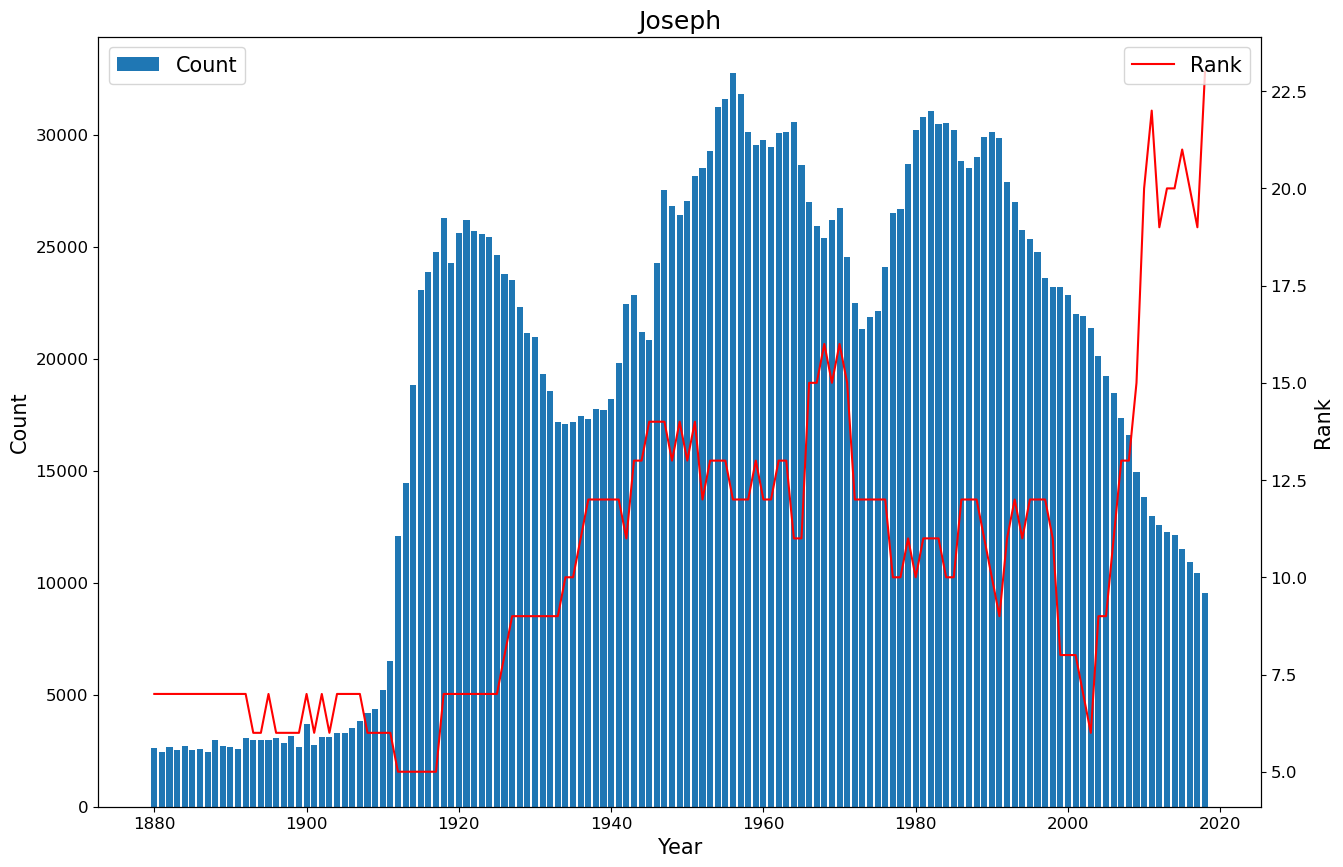

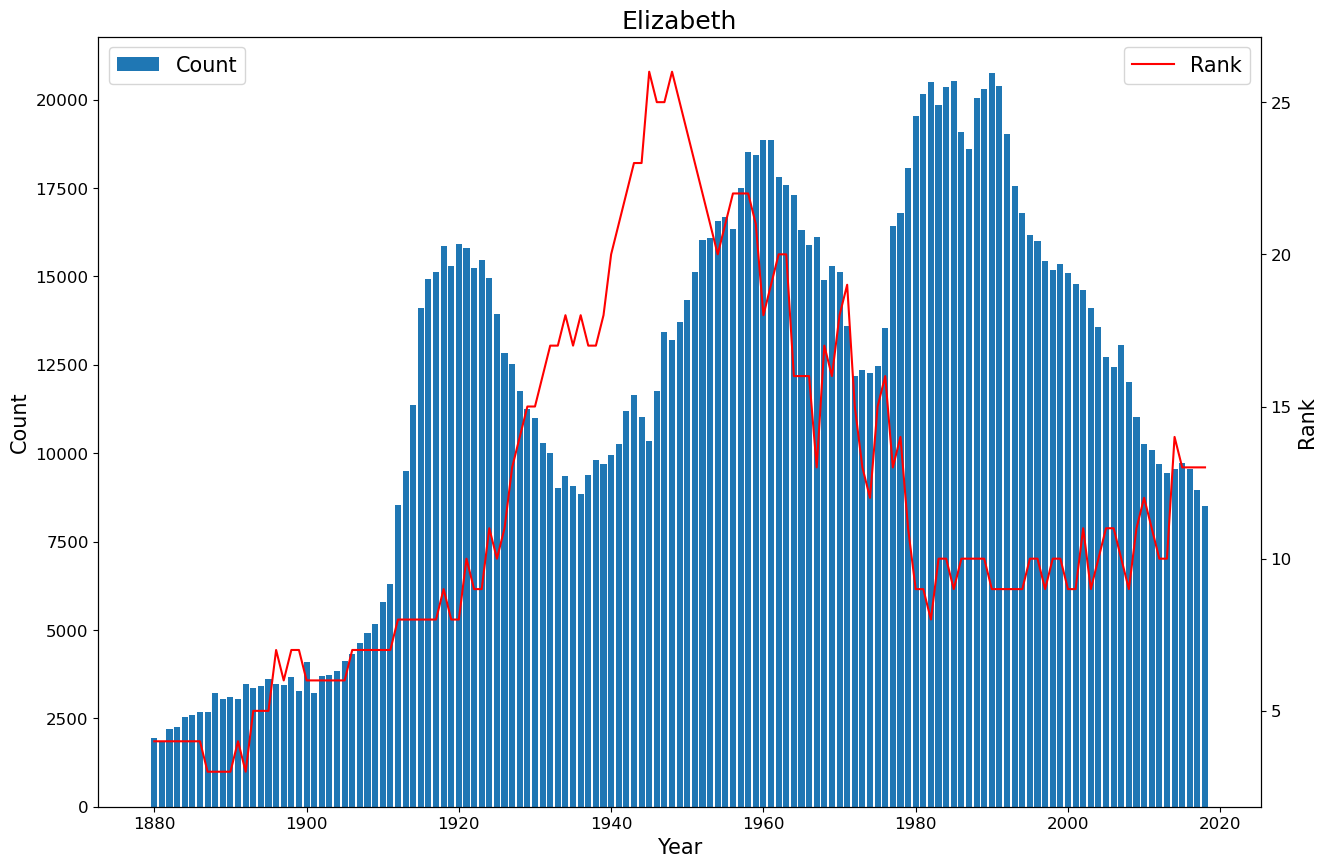

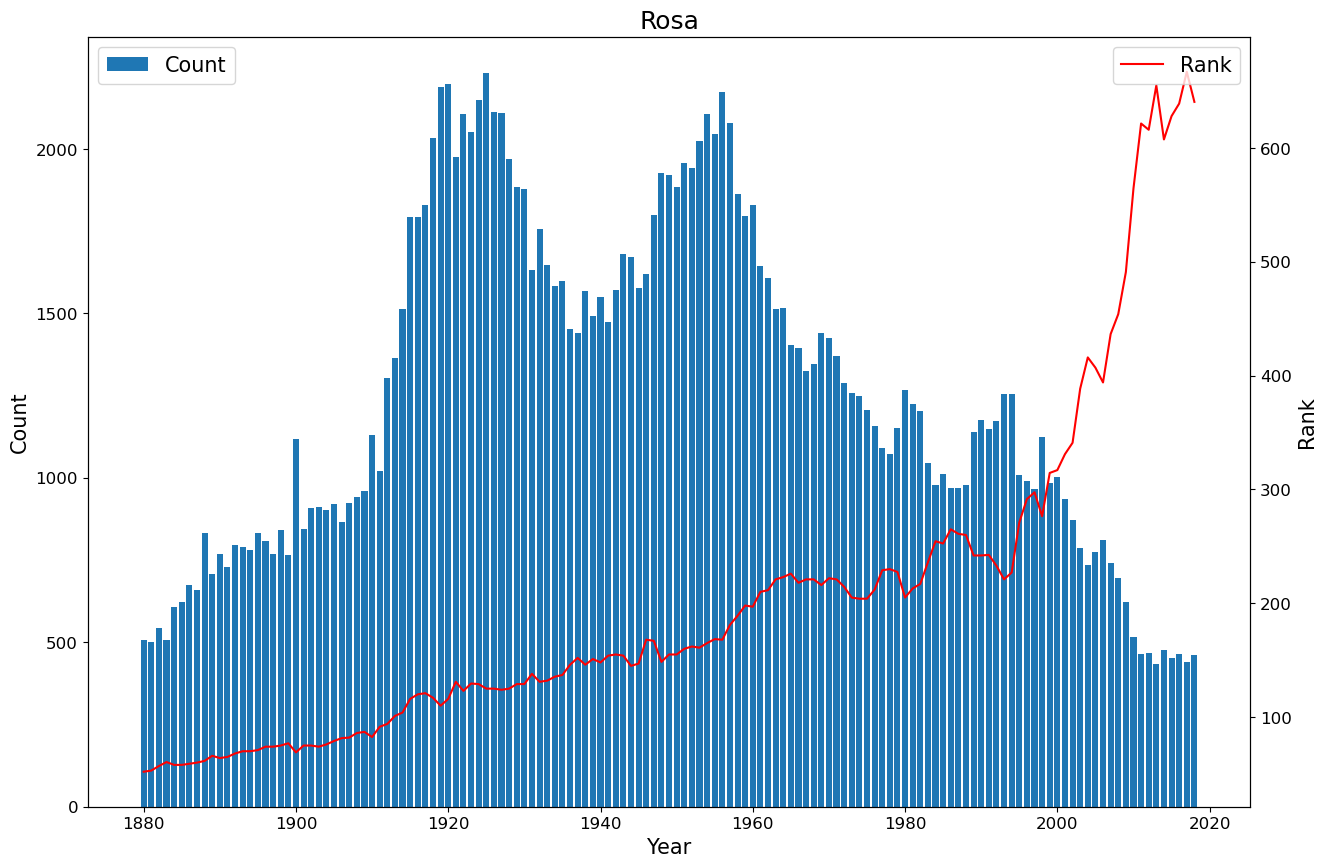

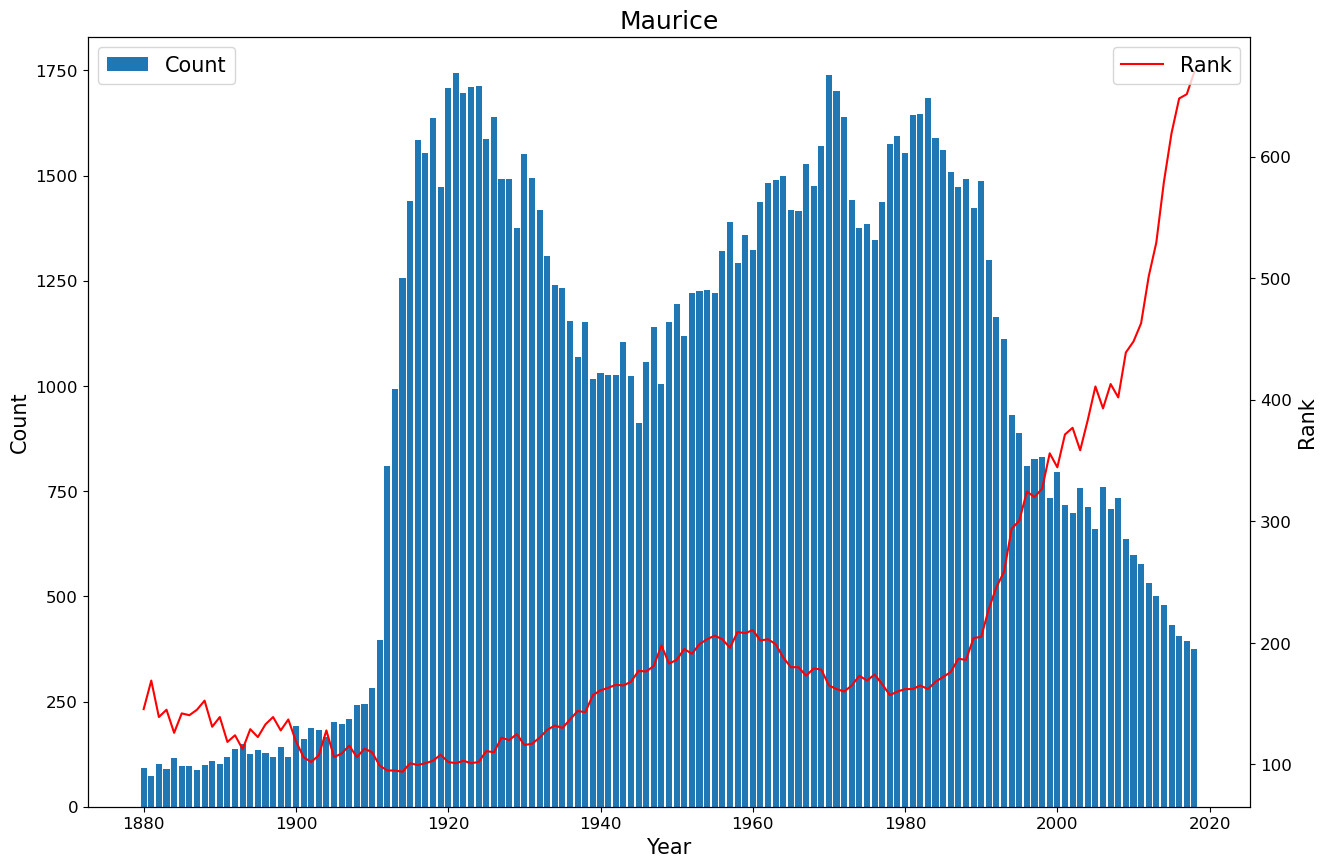

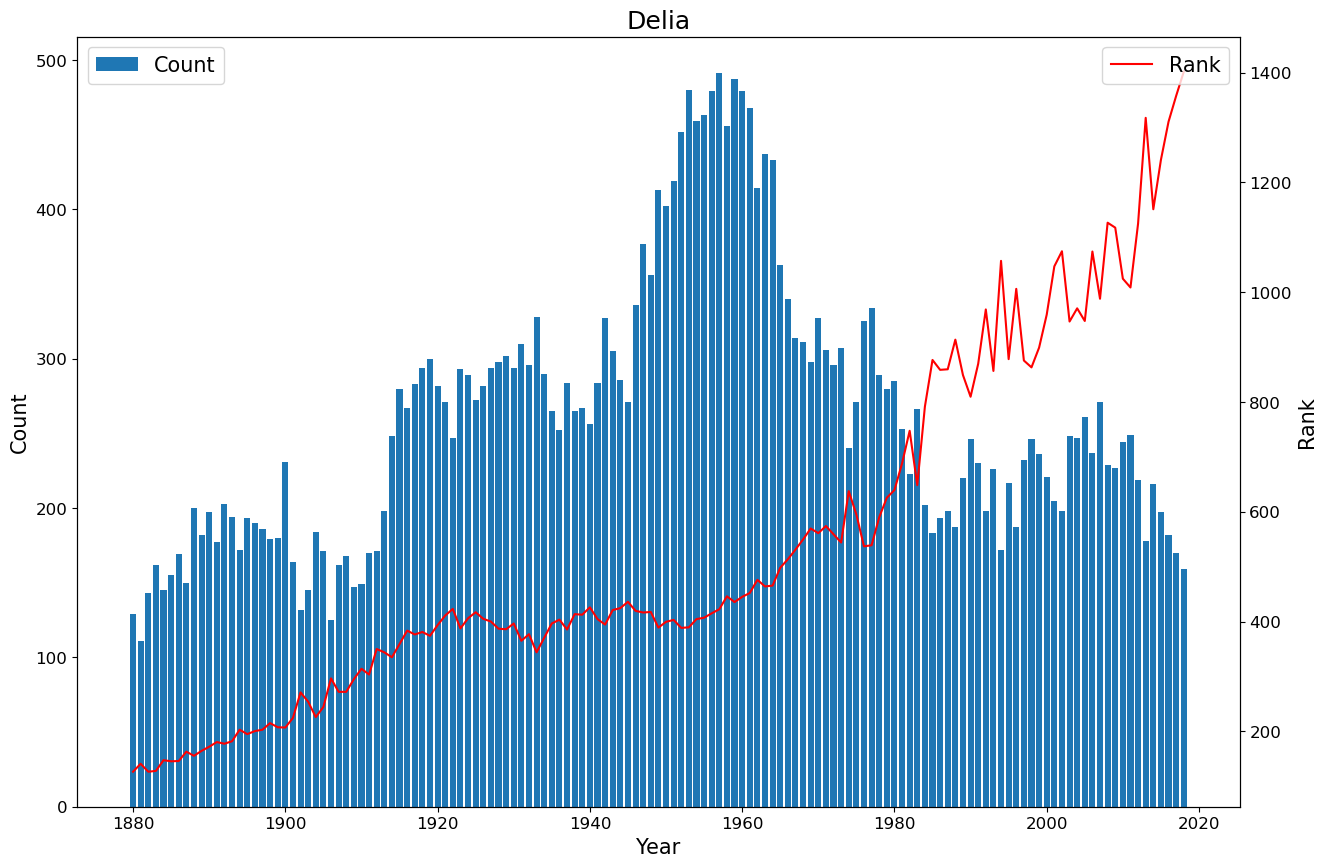

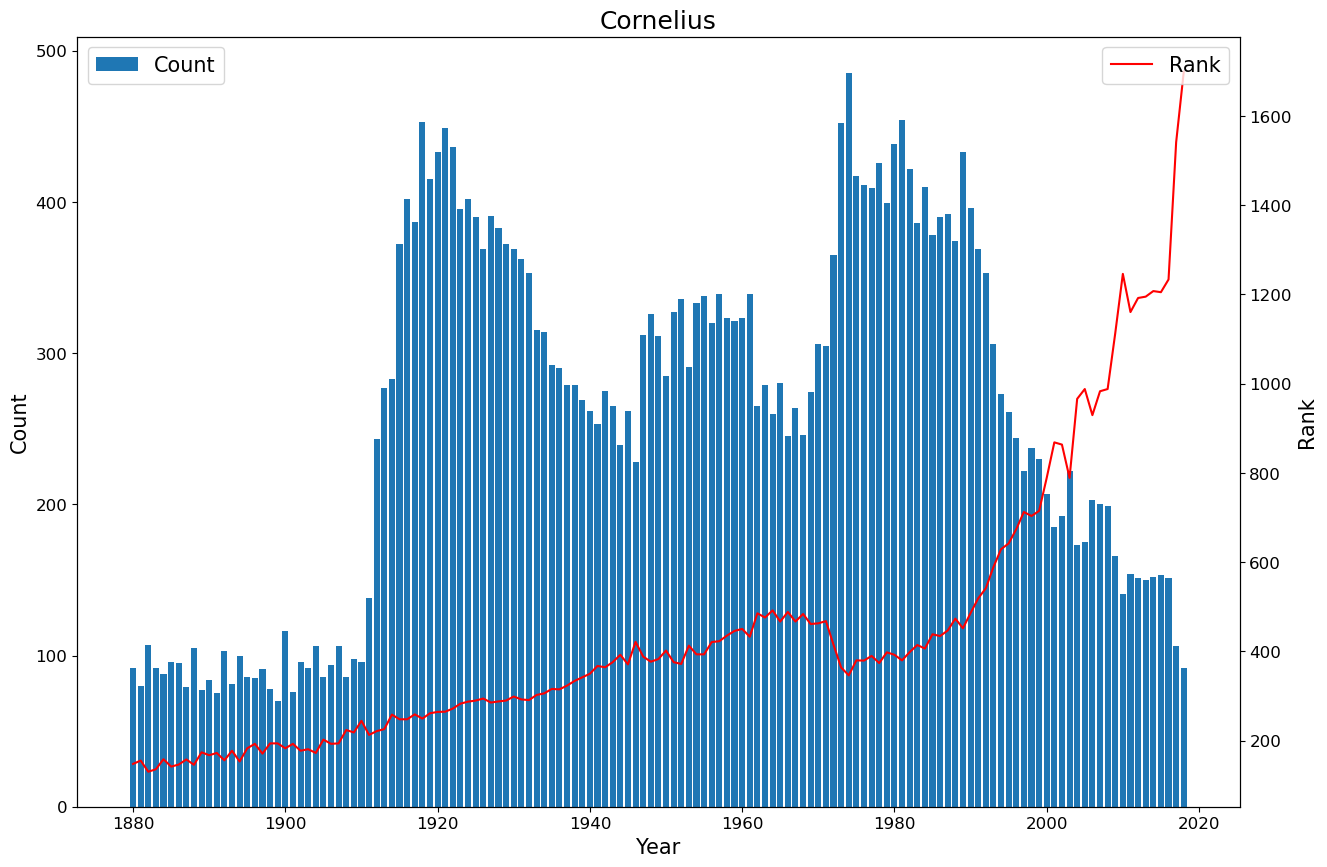

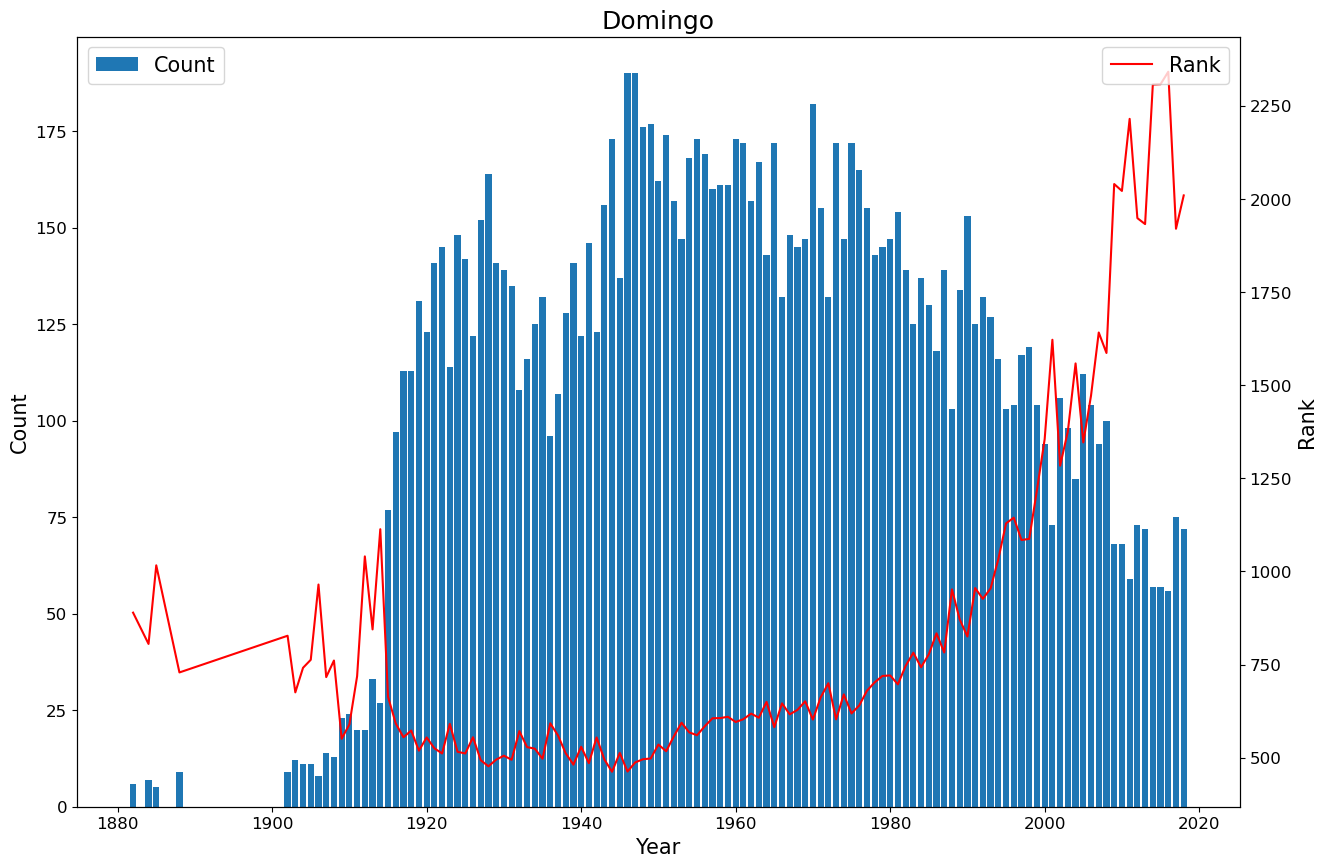

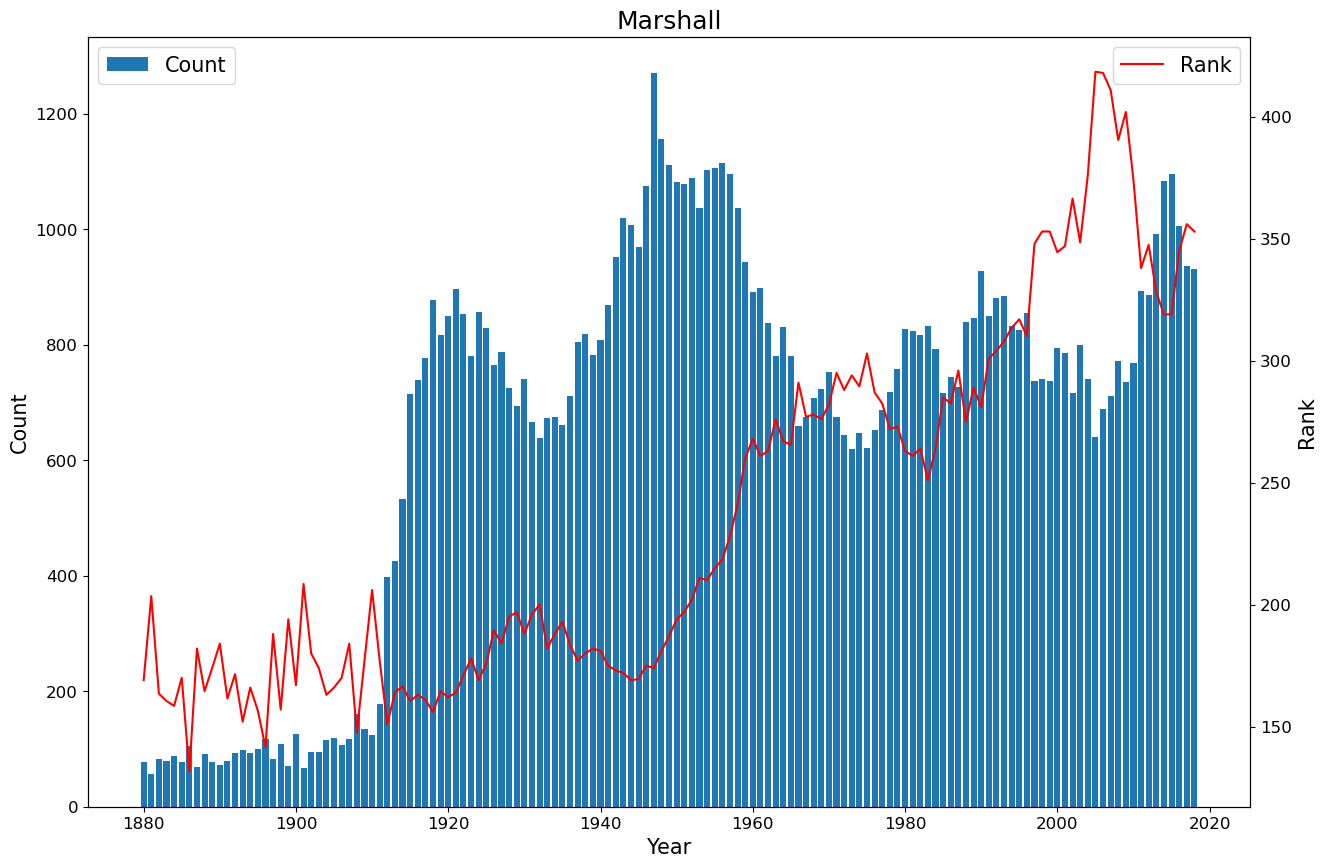

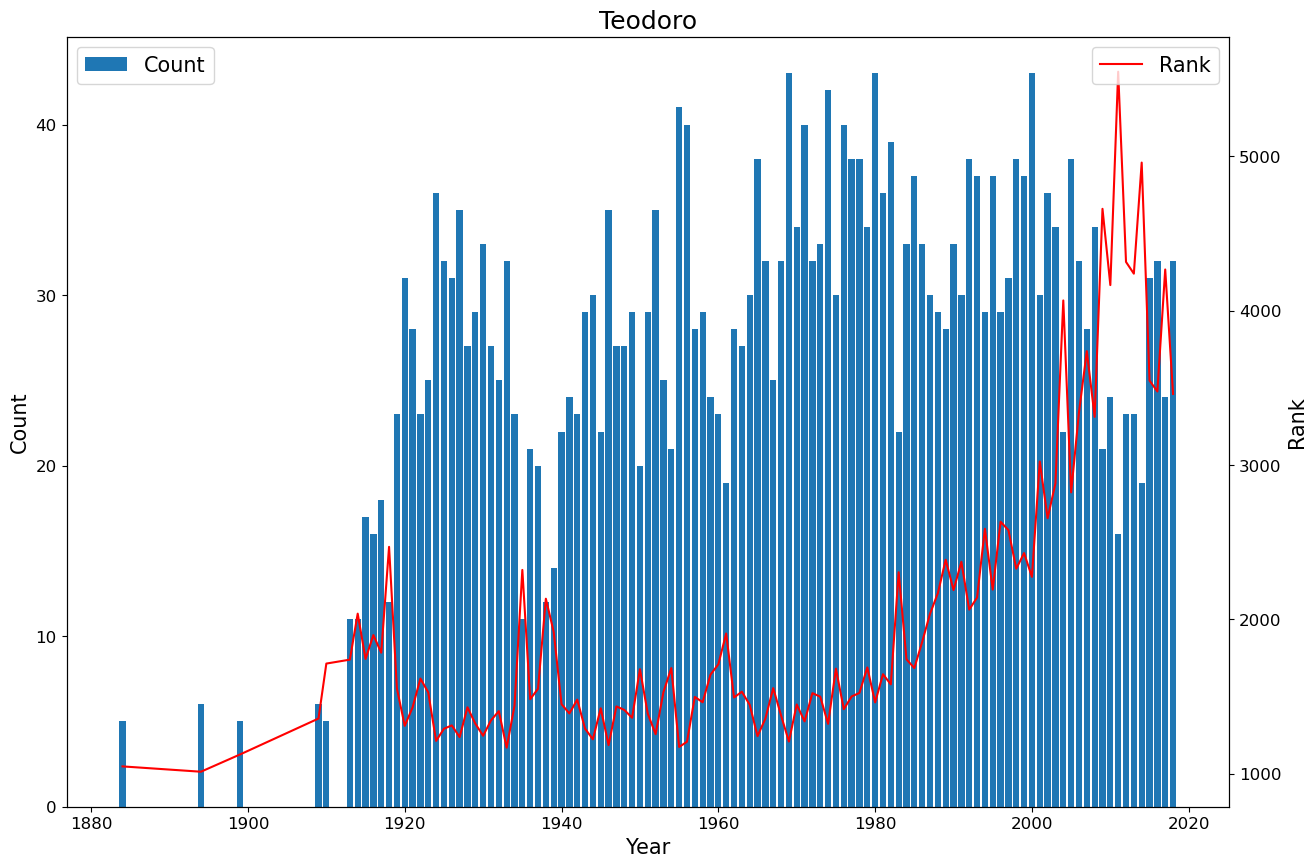

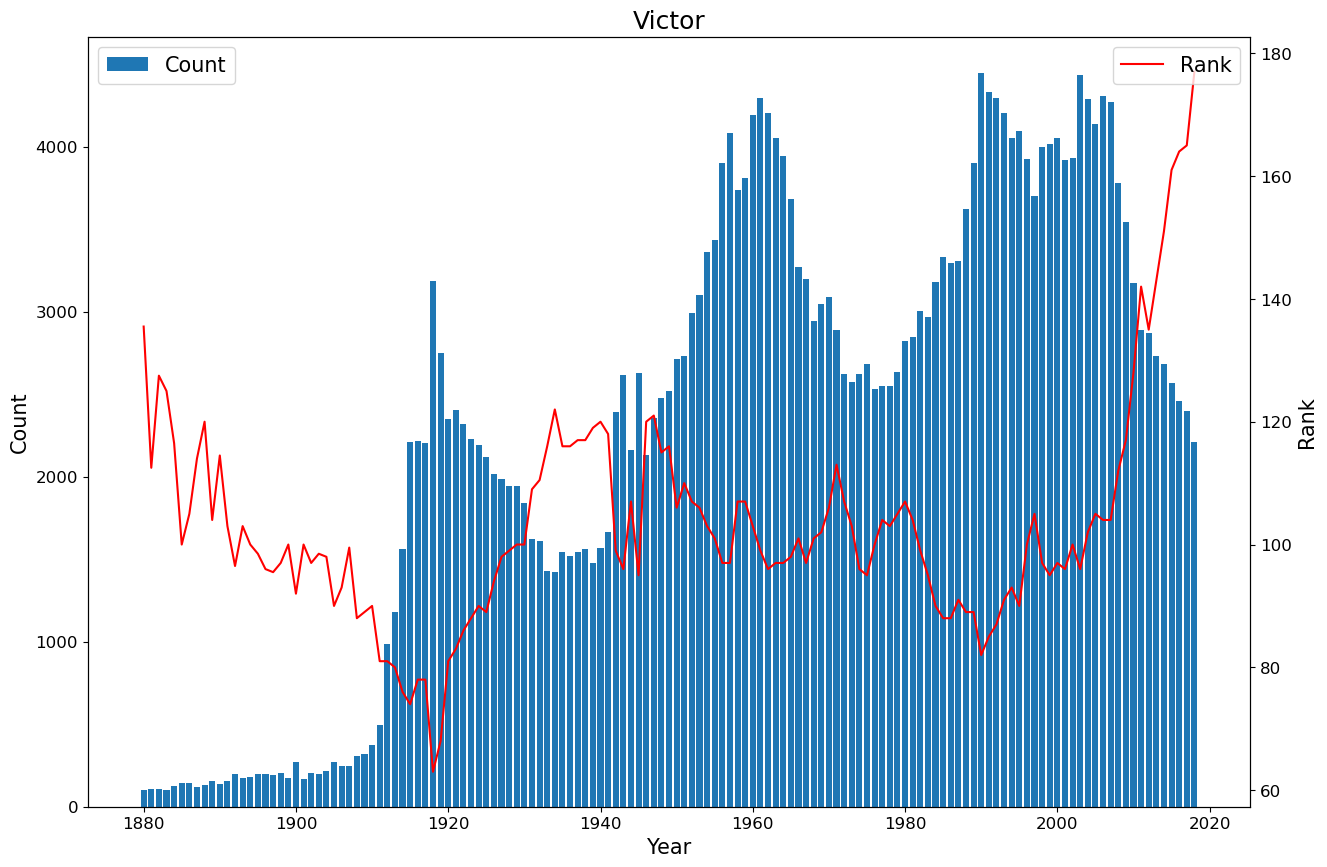

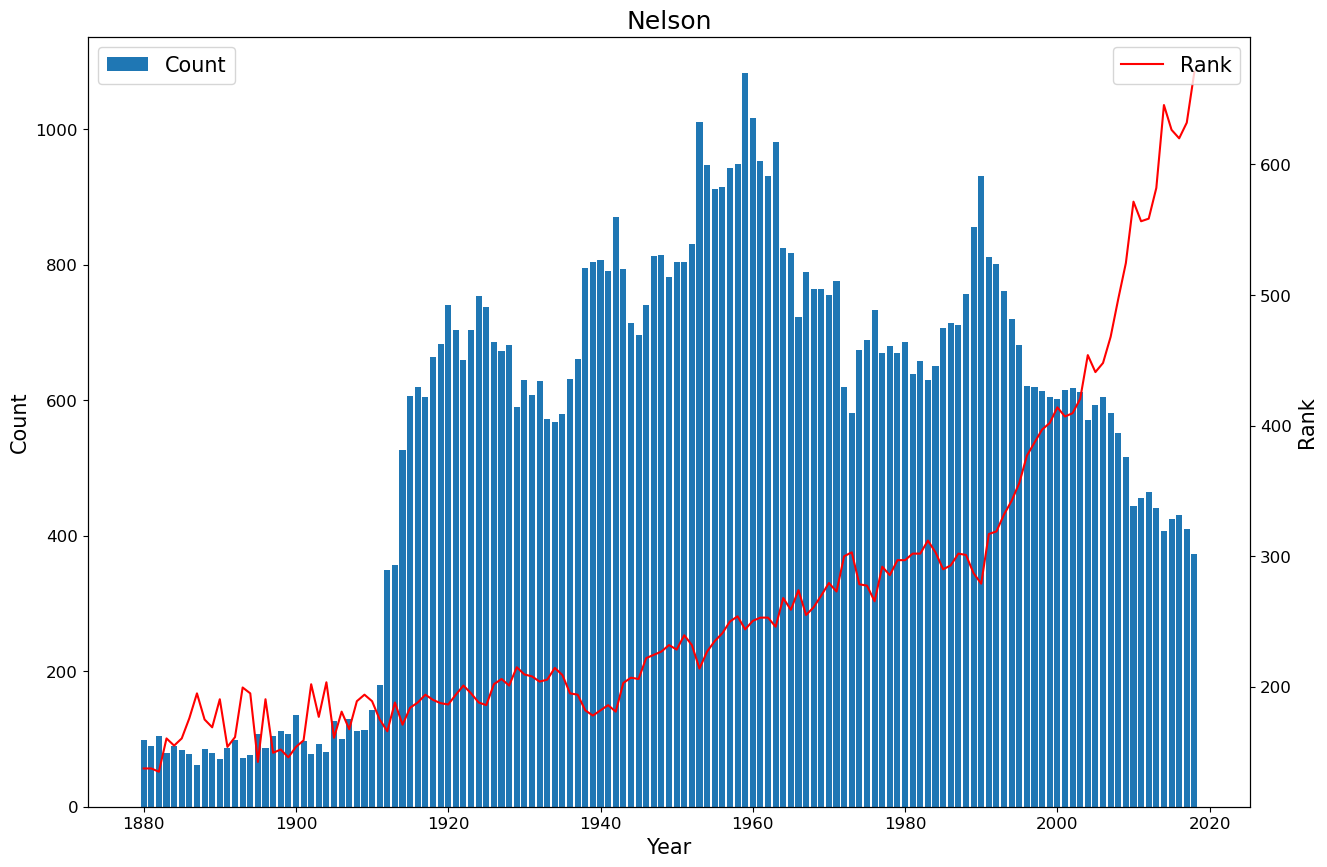

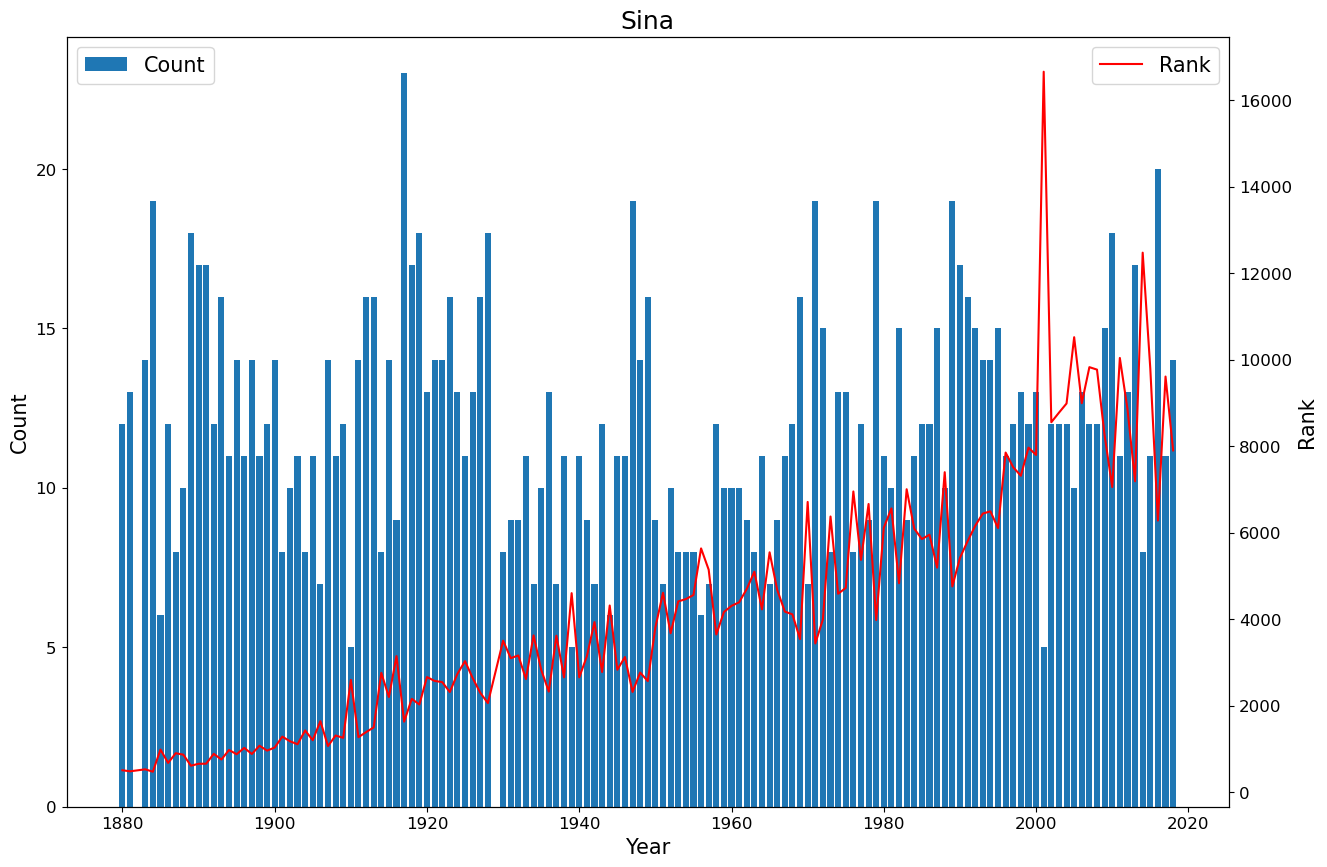

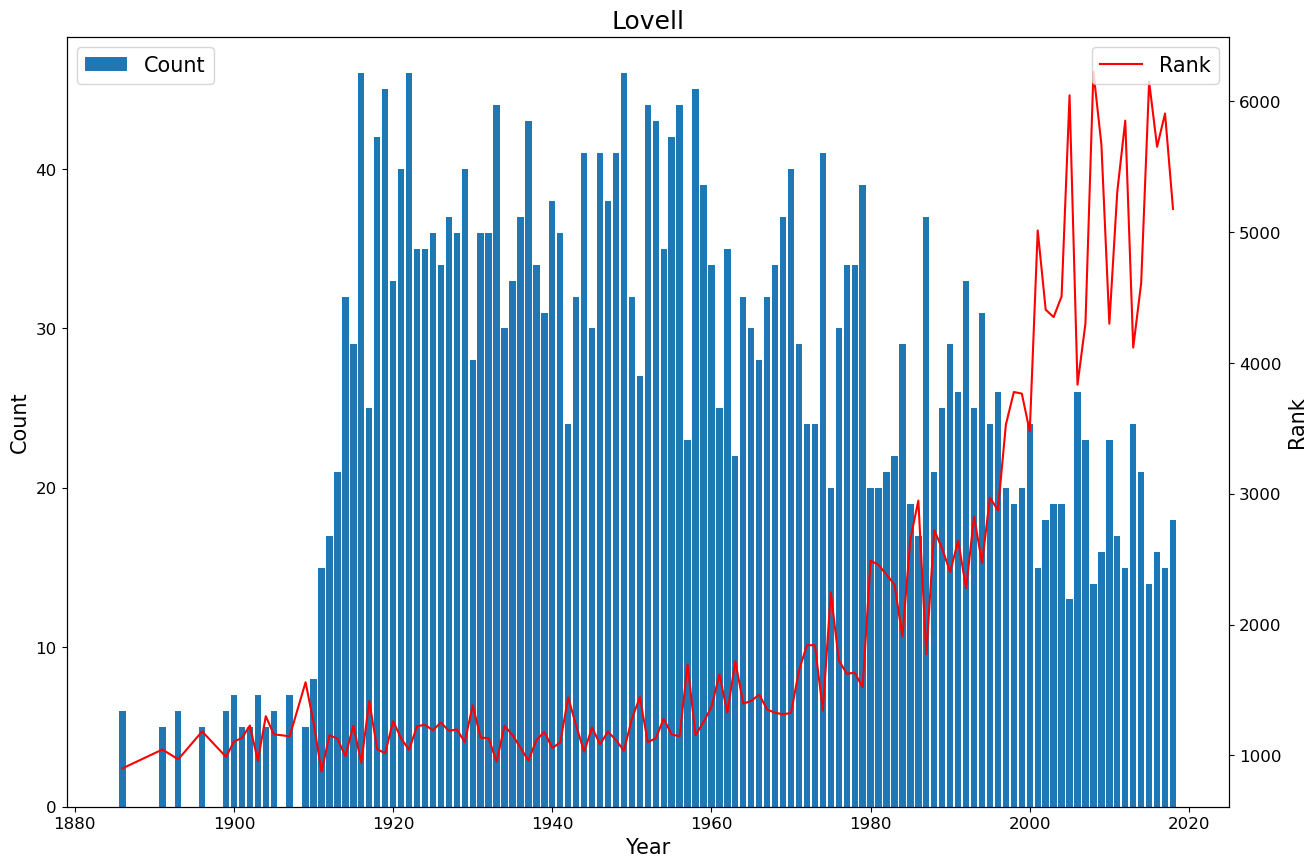

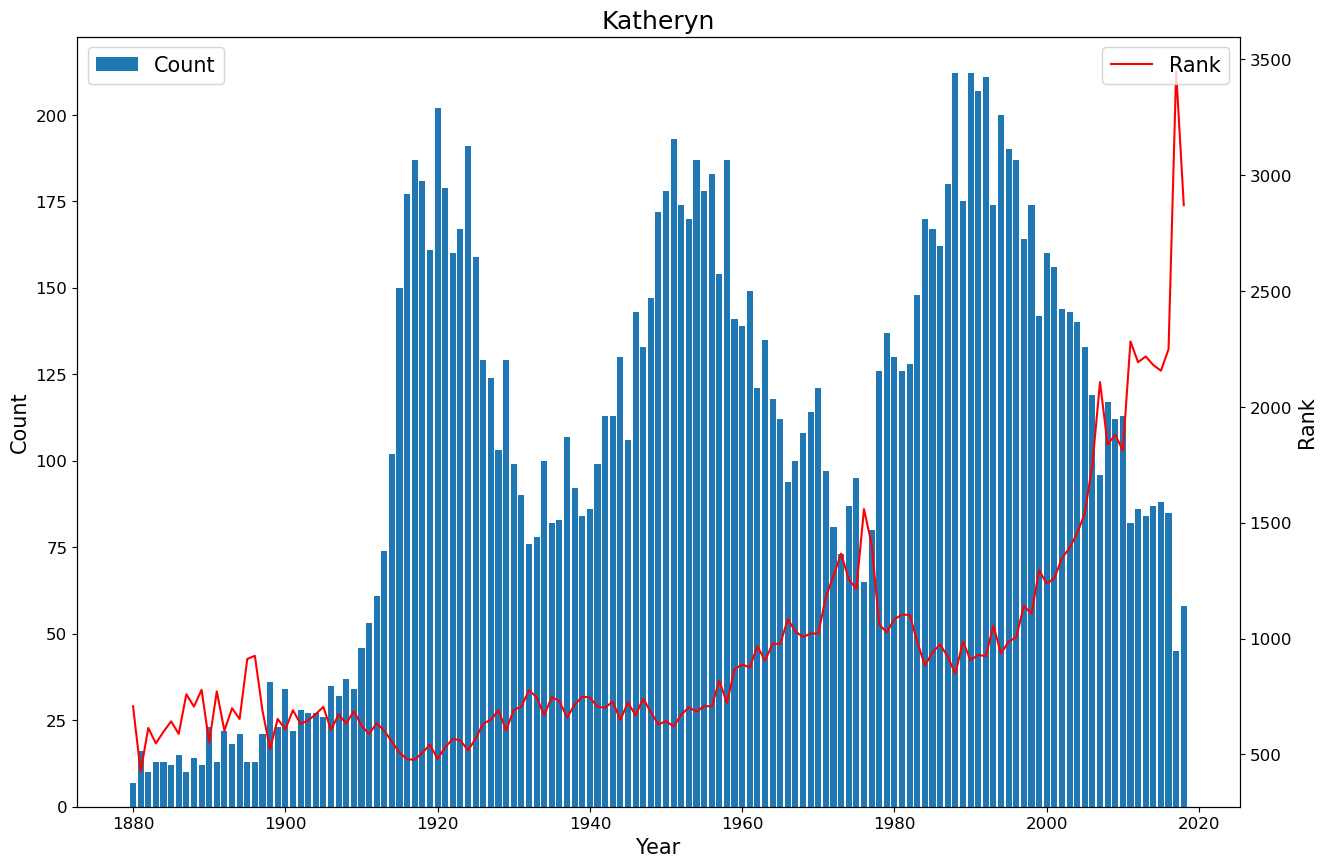

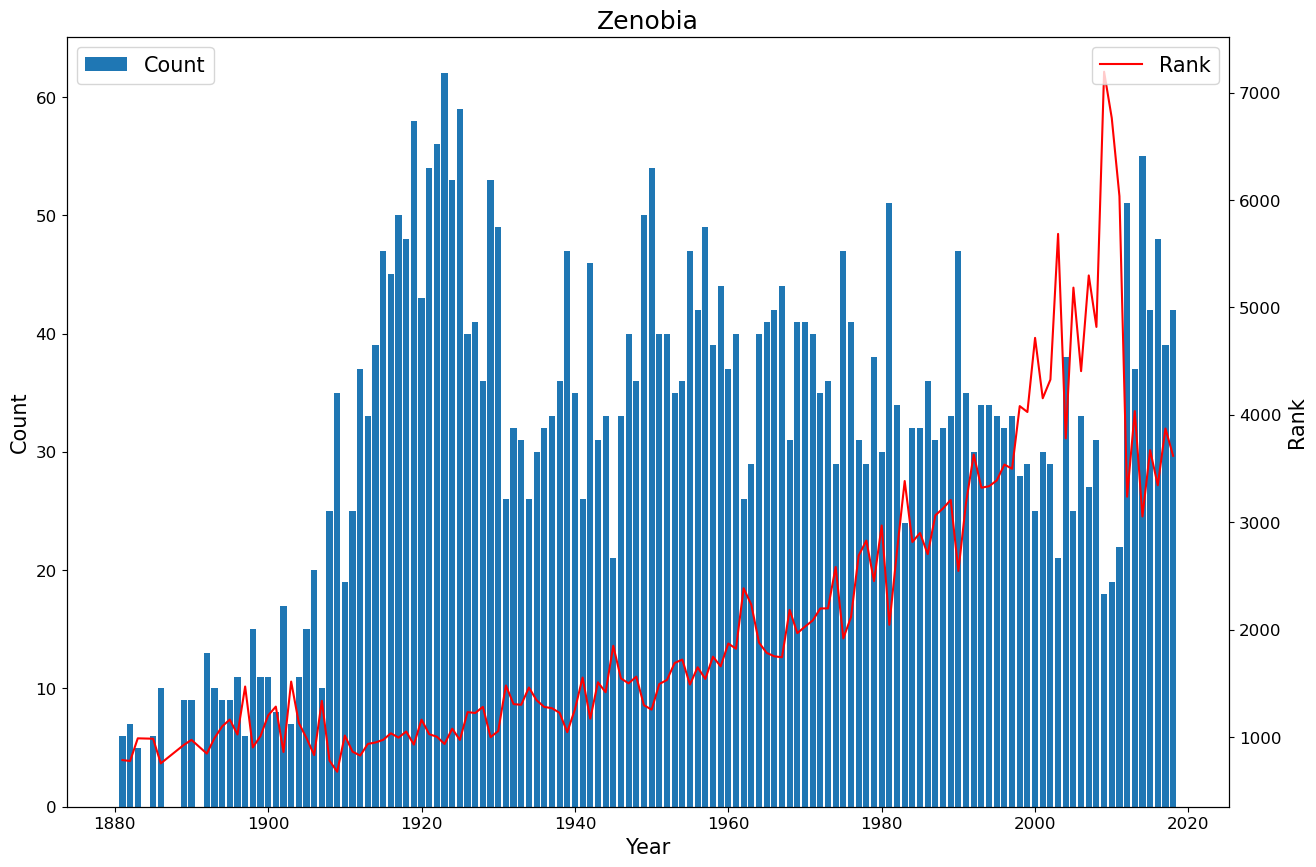

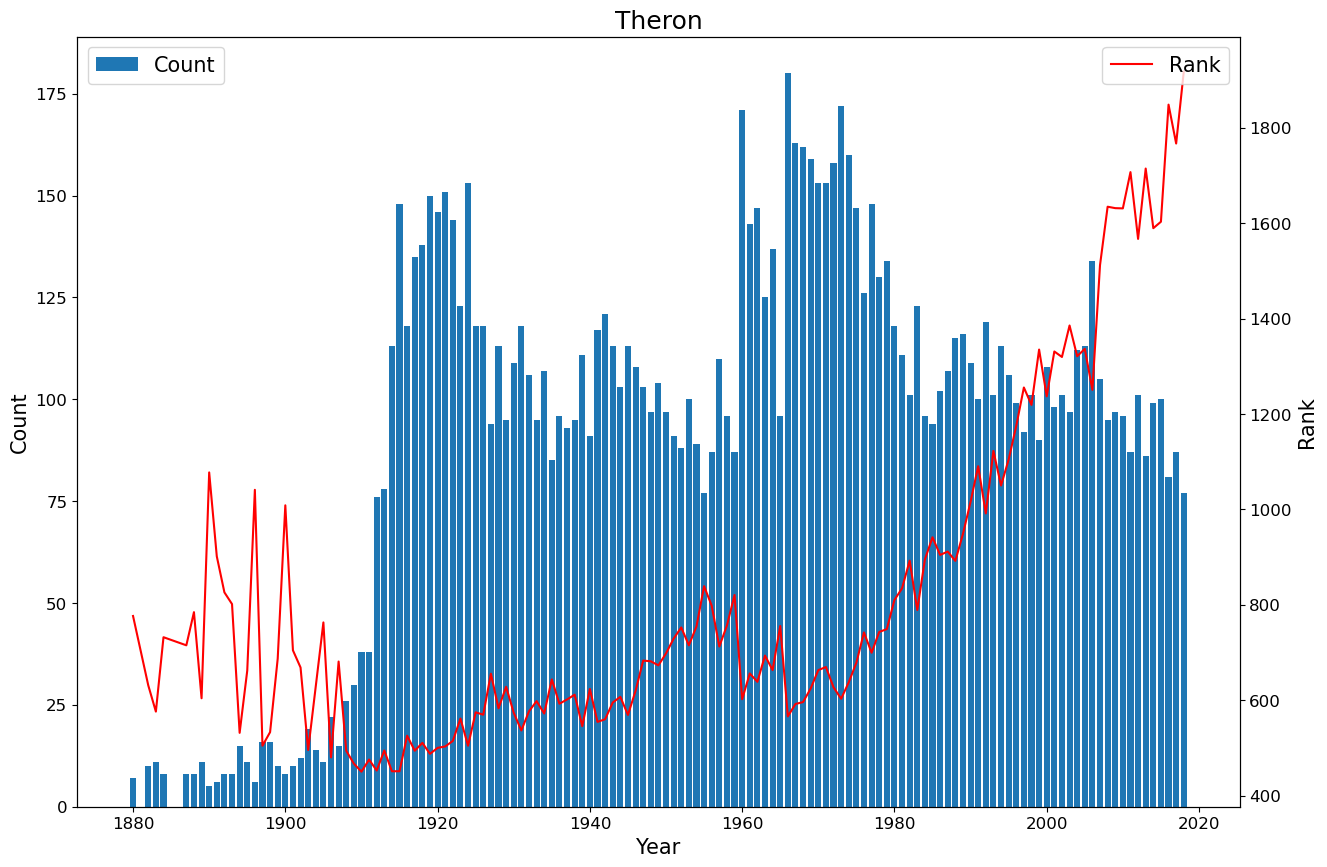

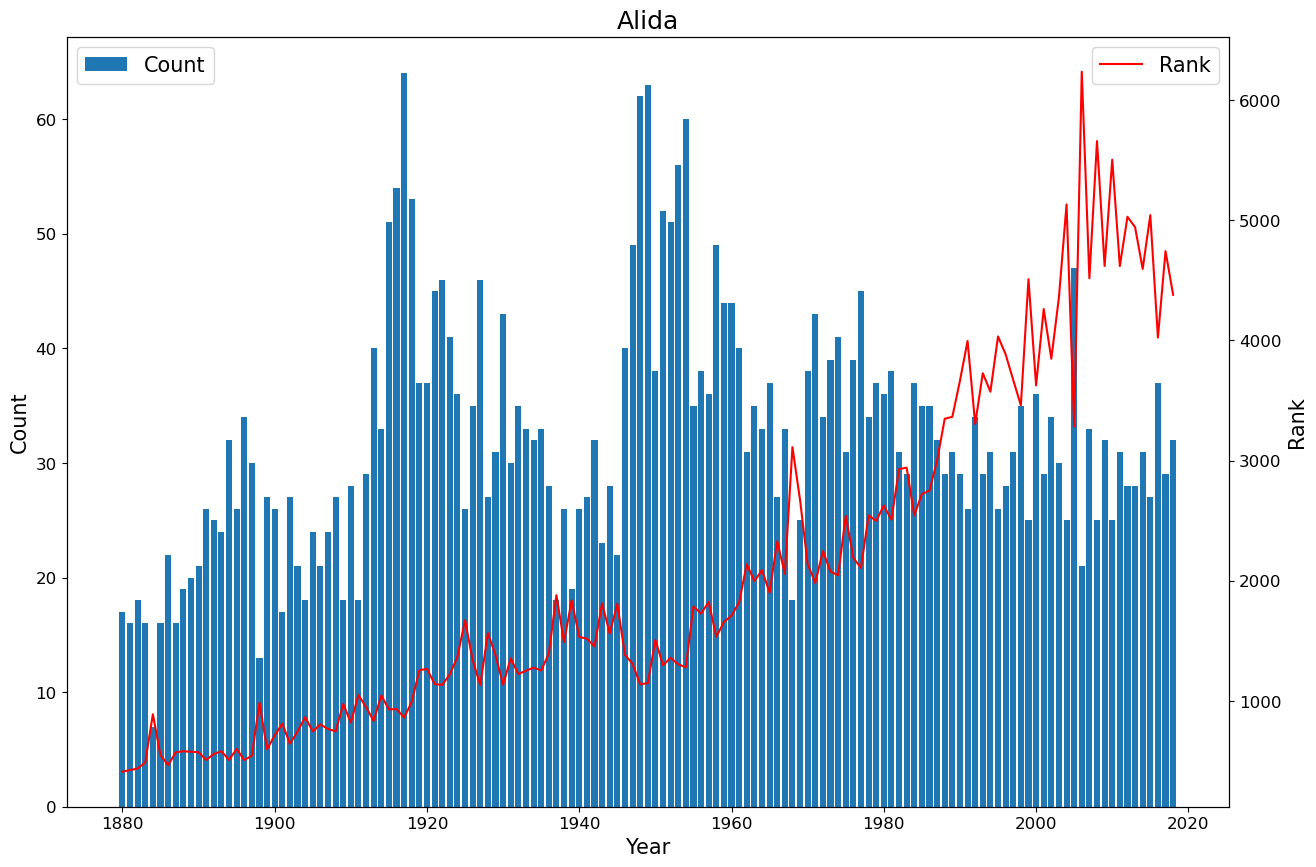

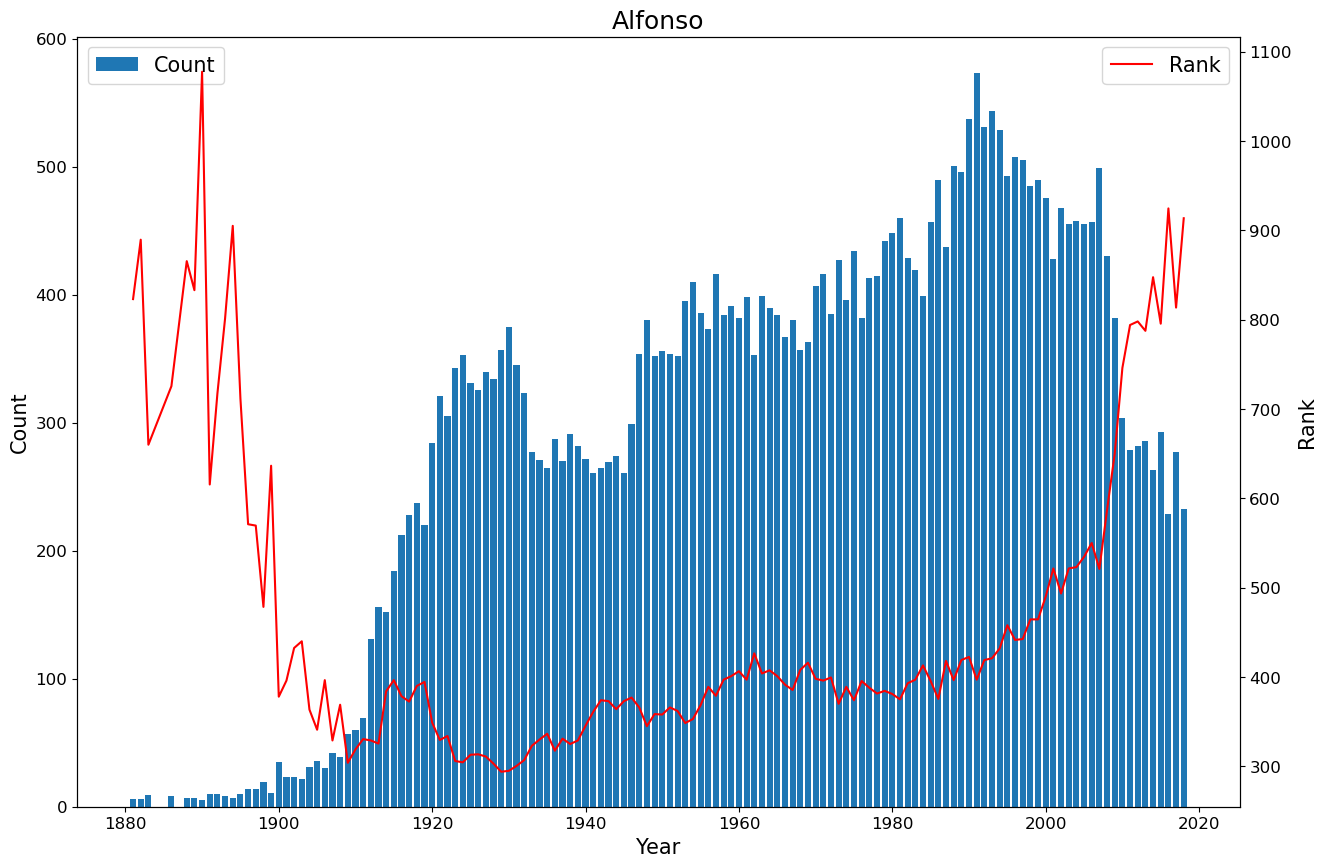

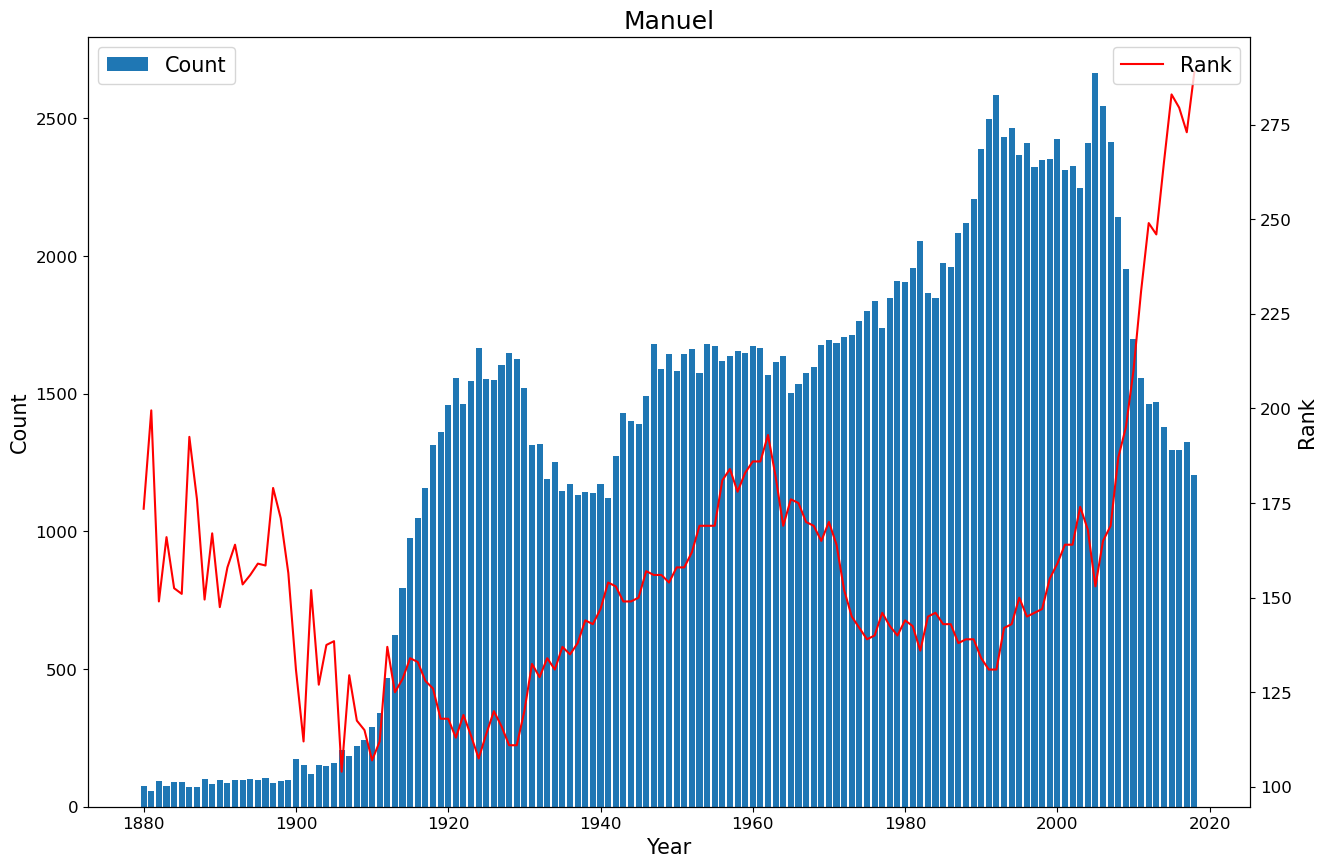

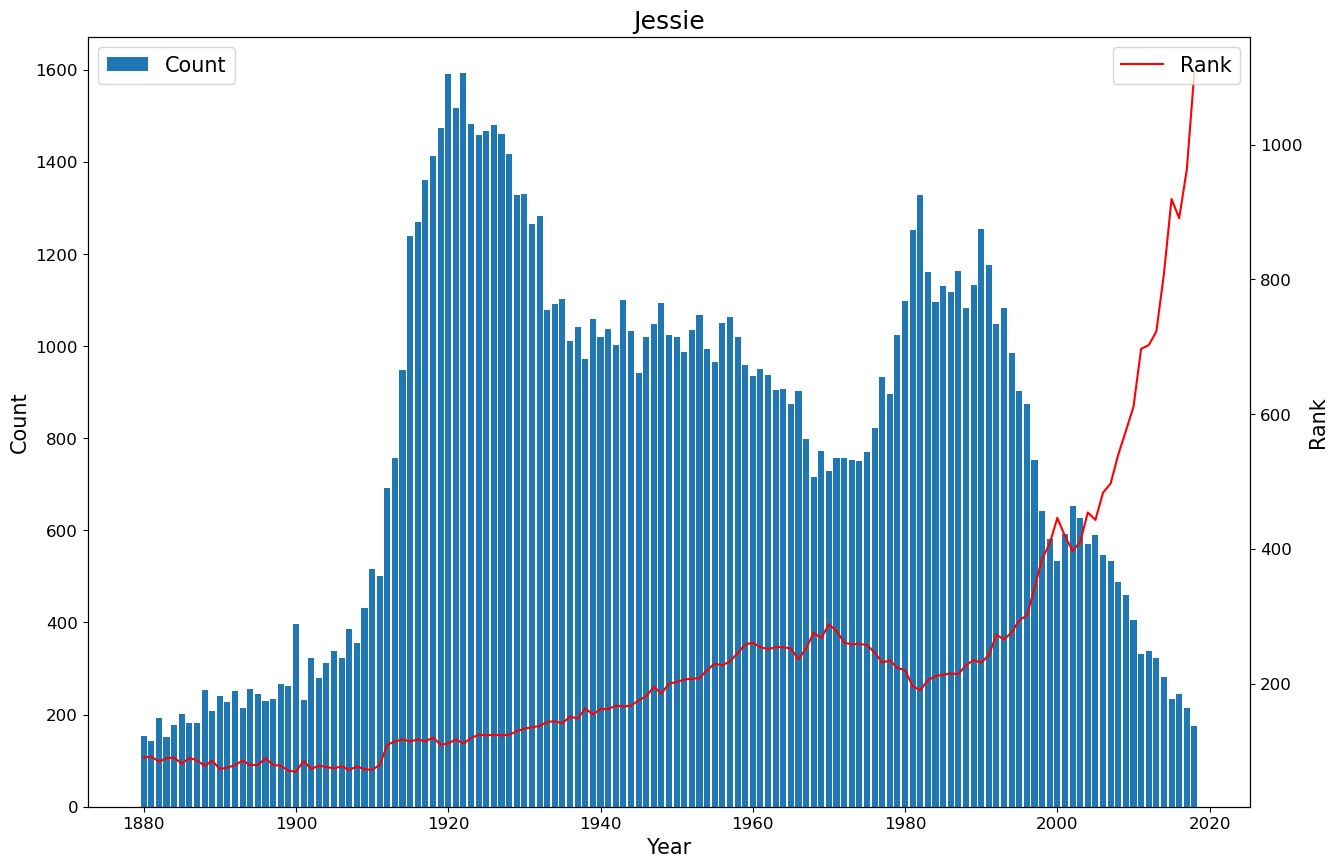

In [97]:
for name in l:
    plot_name(name=name[0],gender=name[1],crit="Count")

In [98]:
spike=agg[(agg.Total >1000) & (agg.No_Year>10)].sort_values(by="Spike_scores",ascending=False).head(20)

In [99]:
spike

Name Gender  Total  No_Year  First_Year  Last_Year  Max_Count  \
57027      Kizzy      F   2325       30        1977       2016       1116   
77282     Oaklyn      F   1381       11        2006       2018        627   
25998     Deneen      F   3603       52        1947       2007       1604   
72223     Moesha      F   1067       14        1996       2014        426   
67328     Mareli      F   1038       22        1995       2018        411   
67337     Marely      F   2606       29        1989       2018       1004   
51914      Kanye      M   1334       17        2002       2018        509   
50988      Kairo      M   1632       24        1995       2018        605   
97720   Tennille      F   2172       32        1975       2012        769   
31996     Ensley      F   1241       20        1997       2018        432   
50523    Kadijah      F   1423       37        1969       2018        486   
33216  Everleigh      F   4623       11        2008       2018       1546   
17241     Catina      F   4178       47        1949       2011       1370   
90121  Shaquille      M   5494       30        1989       2018       1784   
85560    Royalty      F   2649       15        2001       2018        836   
4298    Allisson      F   2441       22        1976       2018        767   
73939      Nakia      M   1991       40        1974       2015        612   
2550      Aitana      F   2329       24        1995       2018        704   
52482    Kashton      M   2254       15        2004       2018        680   
44832    Jaslene      F   2909       18        1995       2018        872   

       Best_Year  Spike_scores  
57027       1977         48.00  
77282       2018         45.40  
25998       1964         44.52  
72223       1996         39.93  
67328       2008         39.60  
67337       2008         38.53  
51914       2004         38.16  
50988       2018         37.07  
97720       1976         35.41  
31996       2018         34.81  
50523       1994         34.15  
33216       2018         33.44  
17241       1972         32.79  
90121       1993         32.47  
85560       2018         31.56  
4298        2008         31.42  
73939       1974         30.74  
2550        2018         30.23  
52482       2018         30.17  
44832       2008         29.98

In [100]:
l2=list(zip(spike.Name,spike.Gender))

In [101]:
l2

[('Kizzy', 'F'),
 ('Oaklyn', 'F'),
 ('Deneen', 'F'),
 ('Moesha', 'F'),
 ('Mareli', 'F'),
 ('Marely', 'F'),
 ('Kanye', 'M'),
 ('Kairo', 'M'),
 ('Tennille', 'F'),
 ('Ensley', 'F'),
 ('Kadijah', 'F'),
 ('Everleigh', 'F'),
 ('Catina', 'F'),
 ('Shaquille', 'M'),
 ('Royalty', 'F'),
 ('Allisson', 'F'),
 ('Nakia', 'M'),
 ('Aitana', 'F'),
 ('Kashton', 'M'),
 ('Jaslene', 'F')]

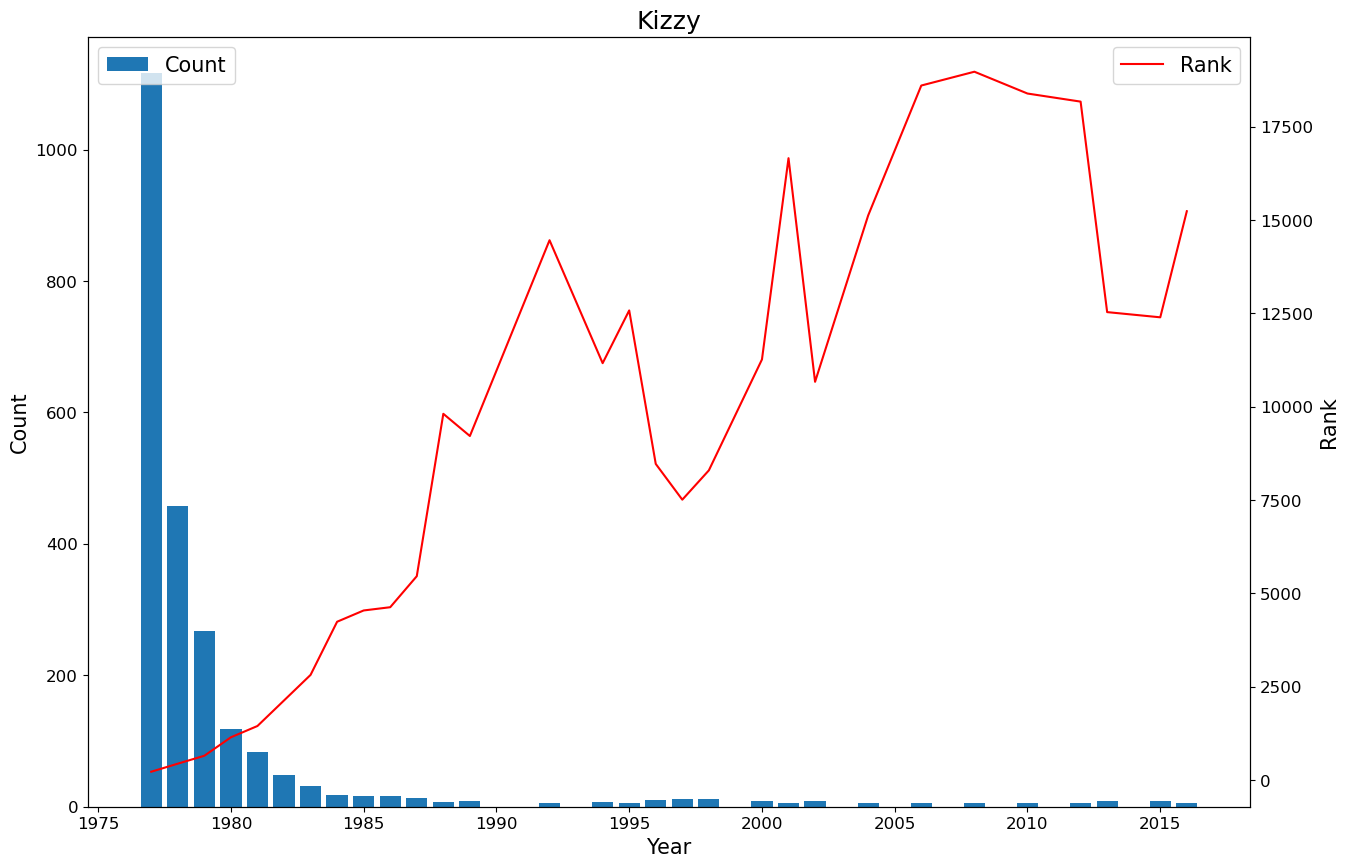

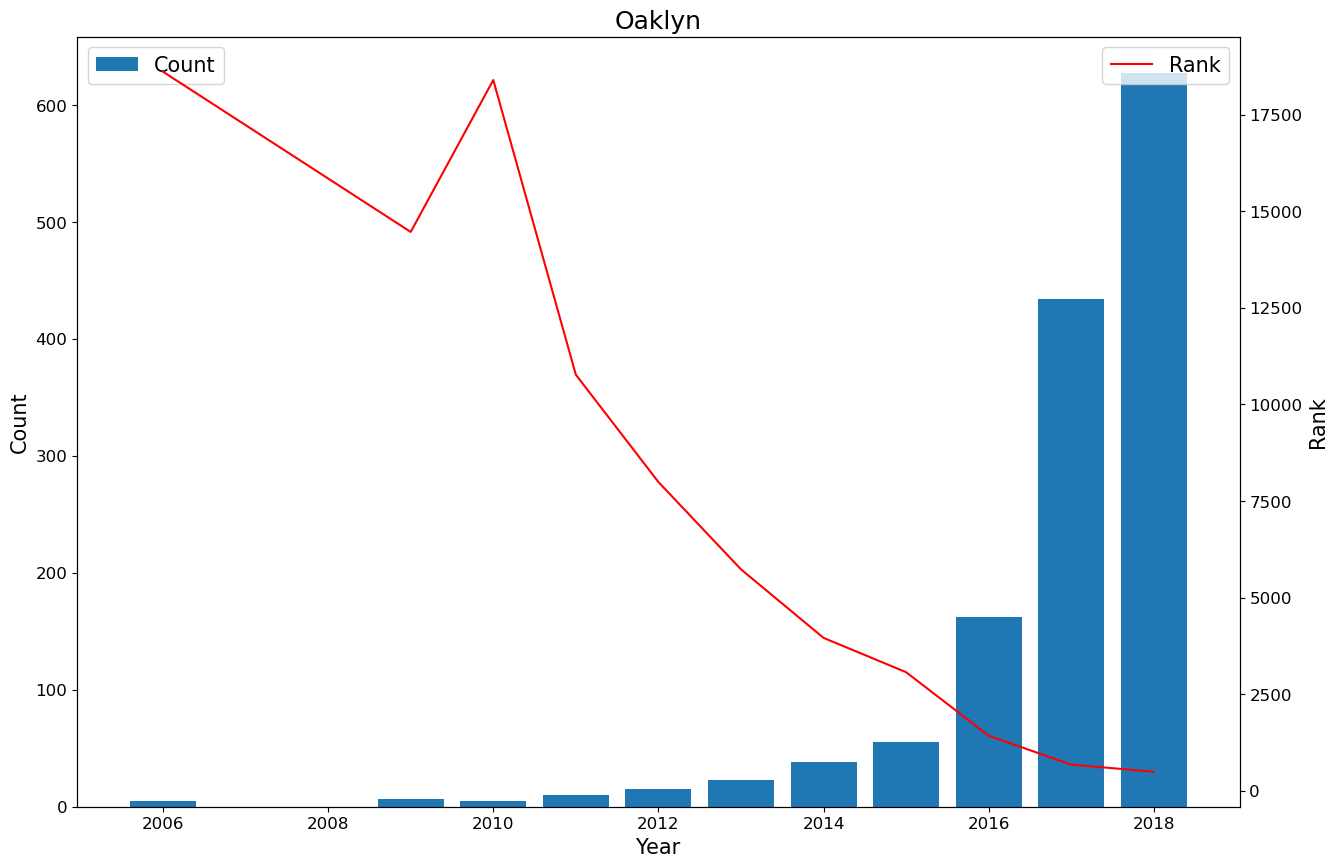

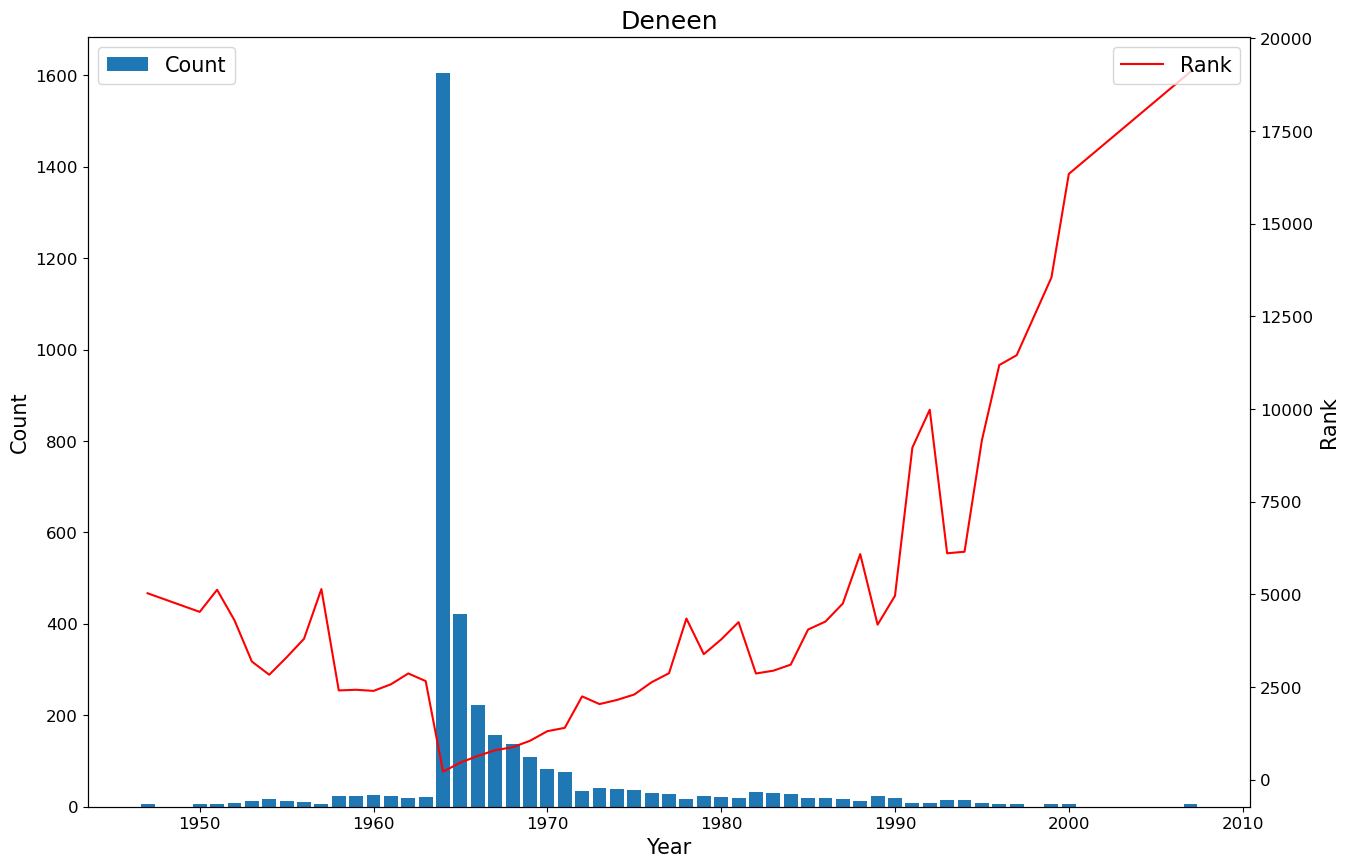

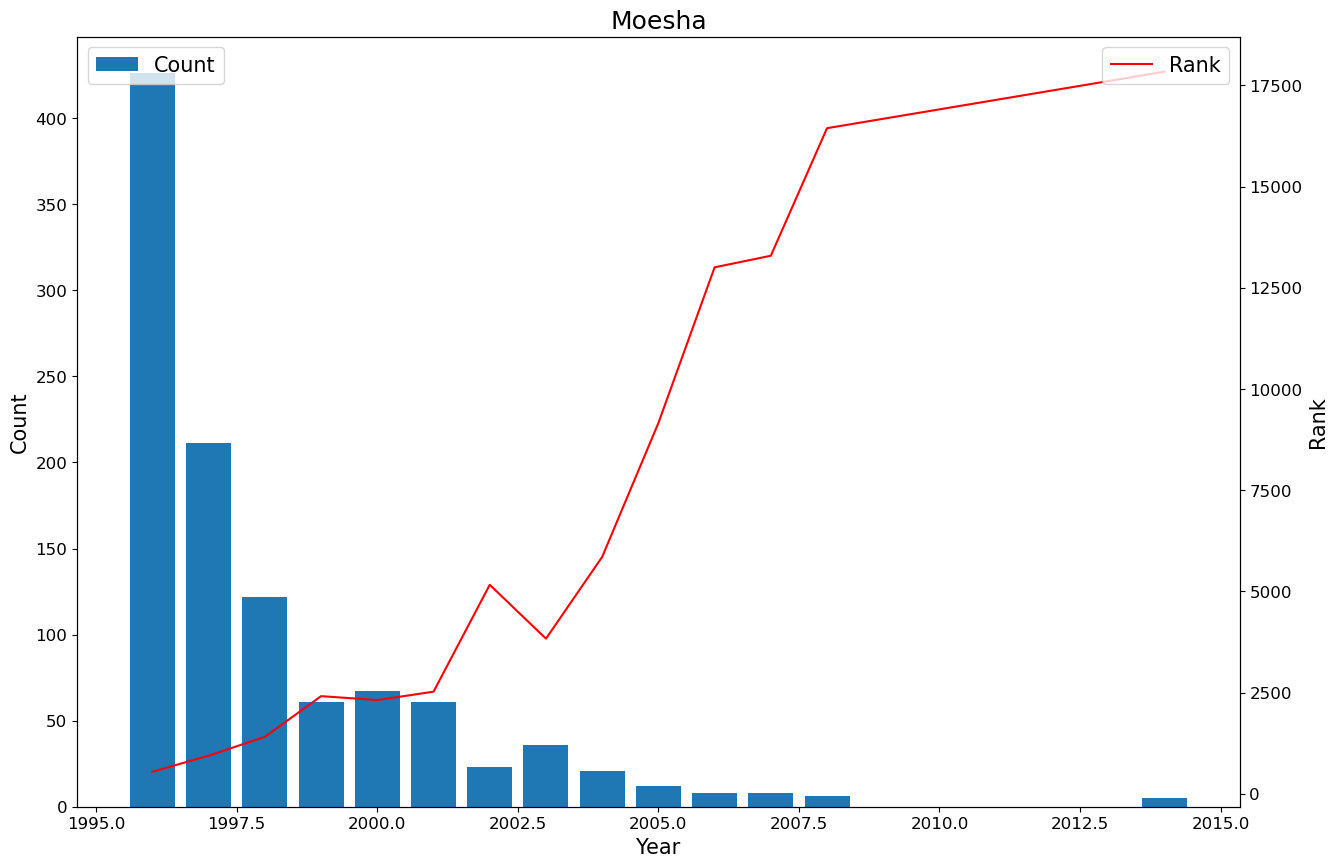

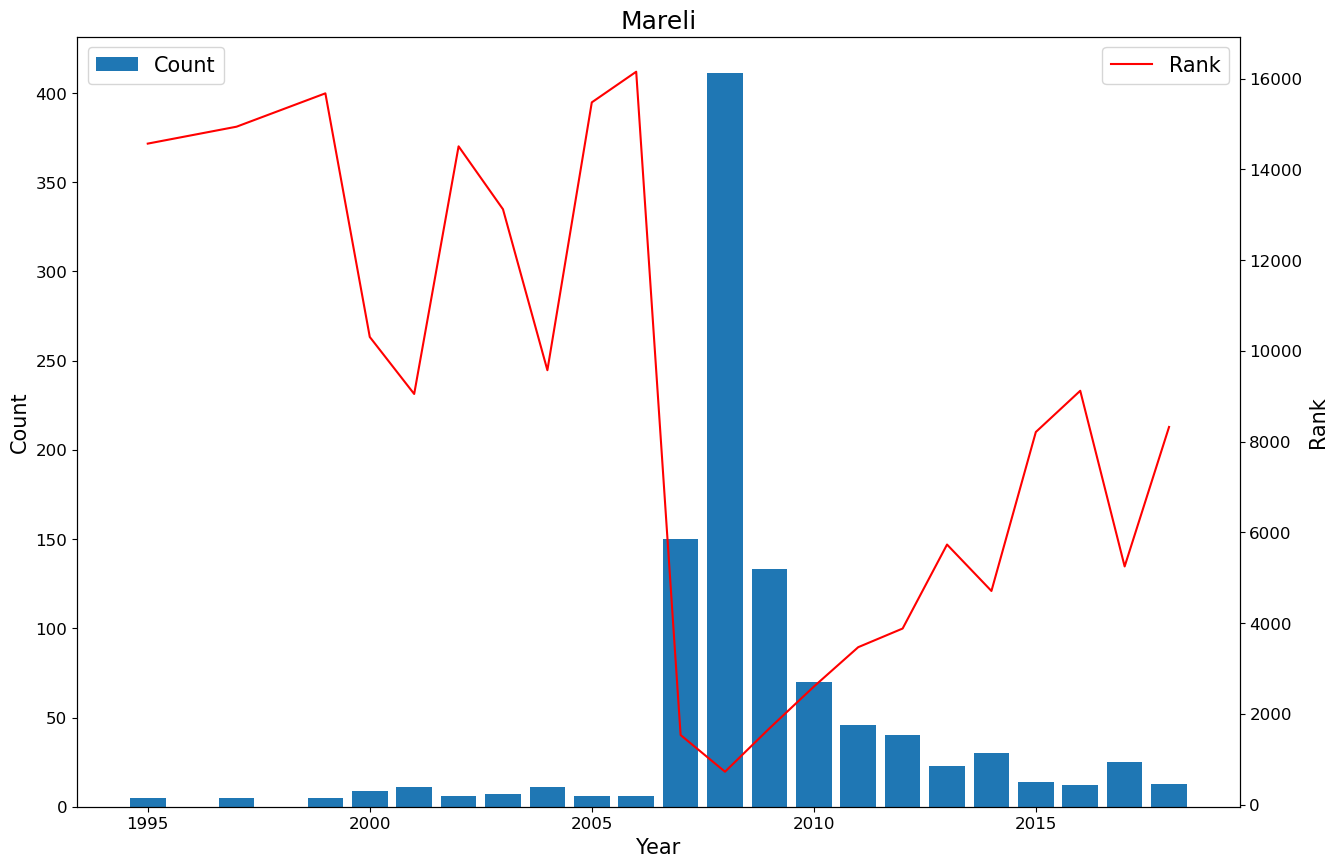

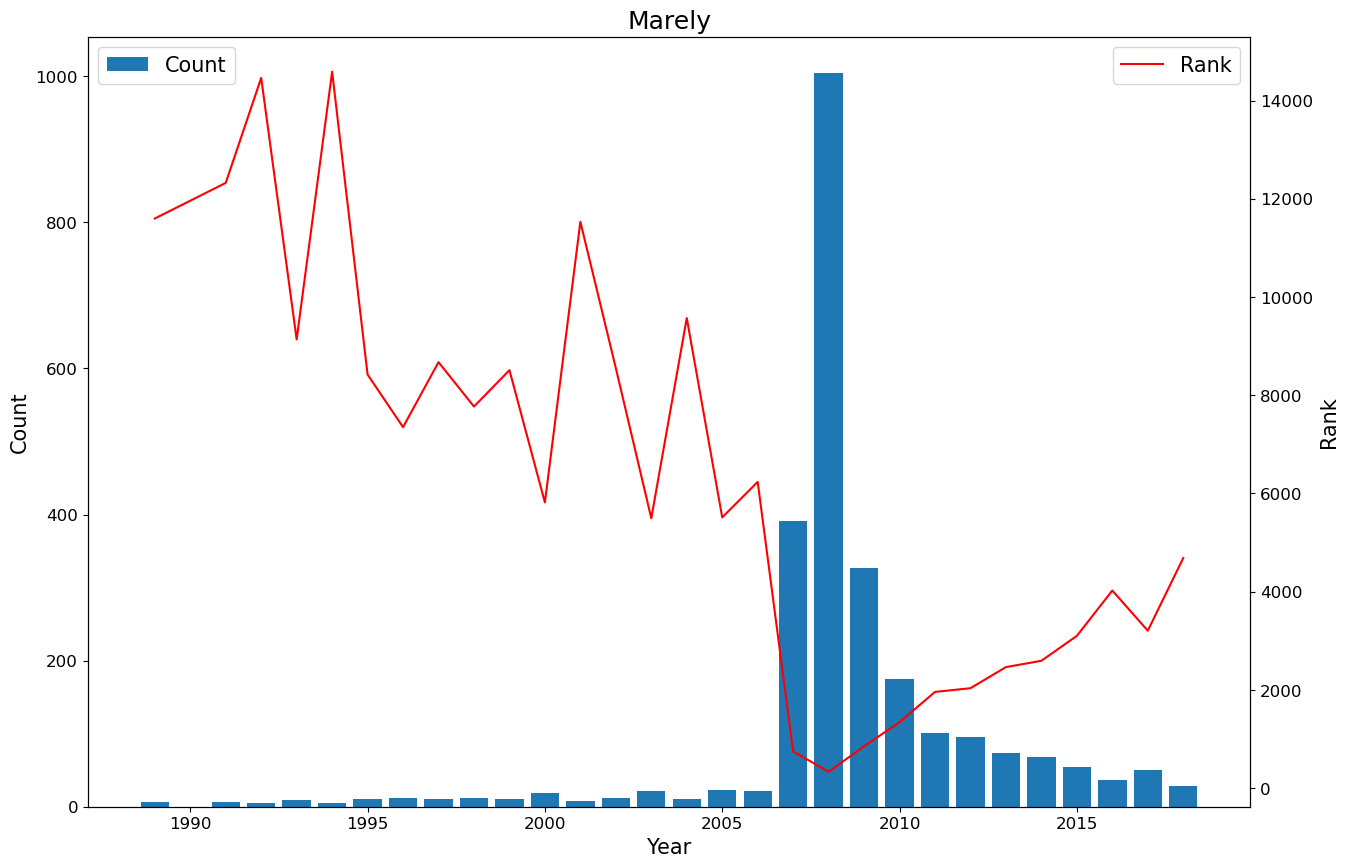

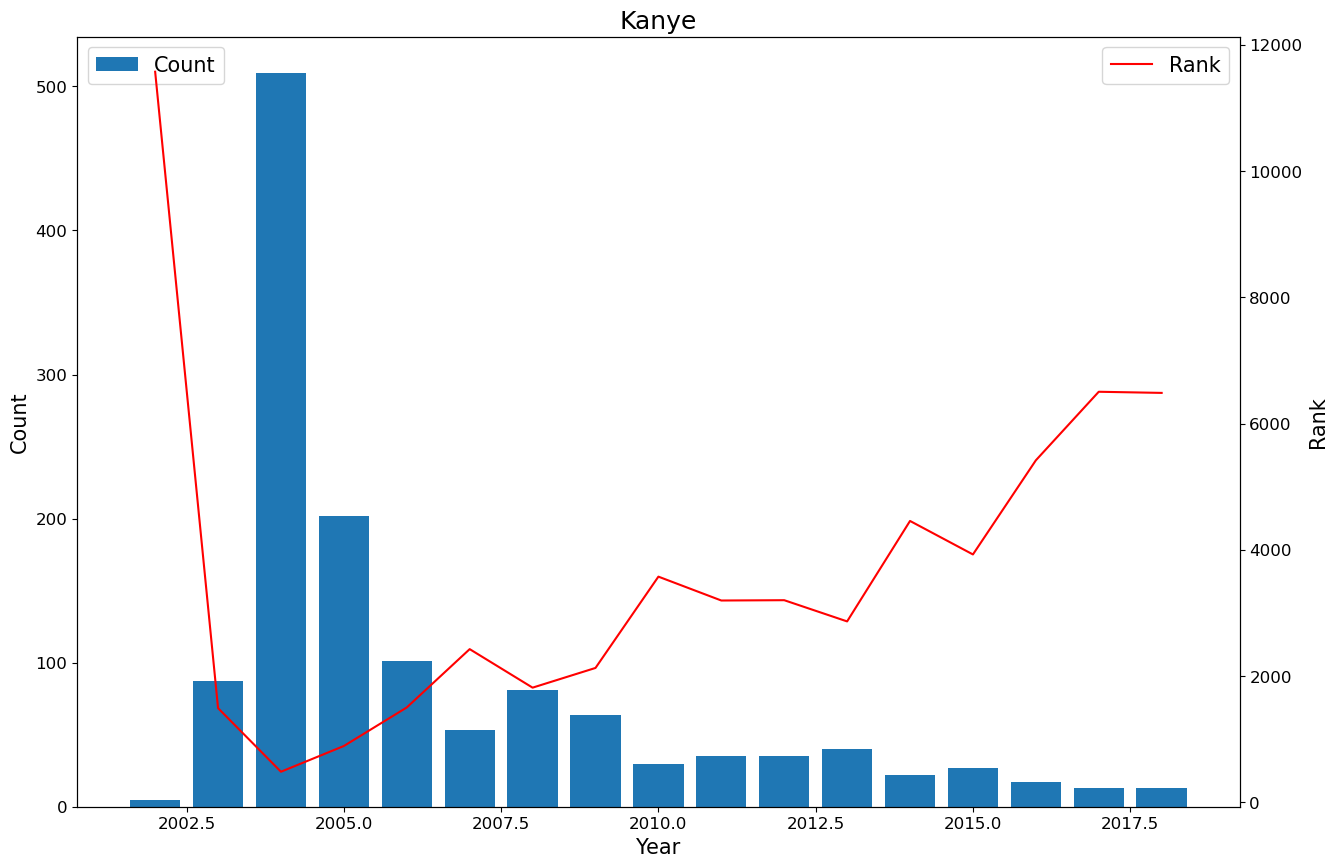

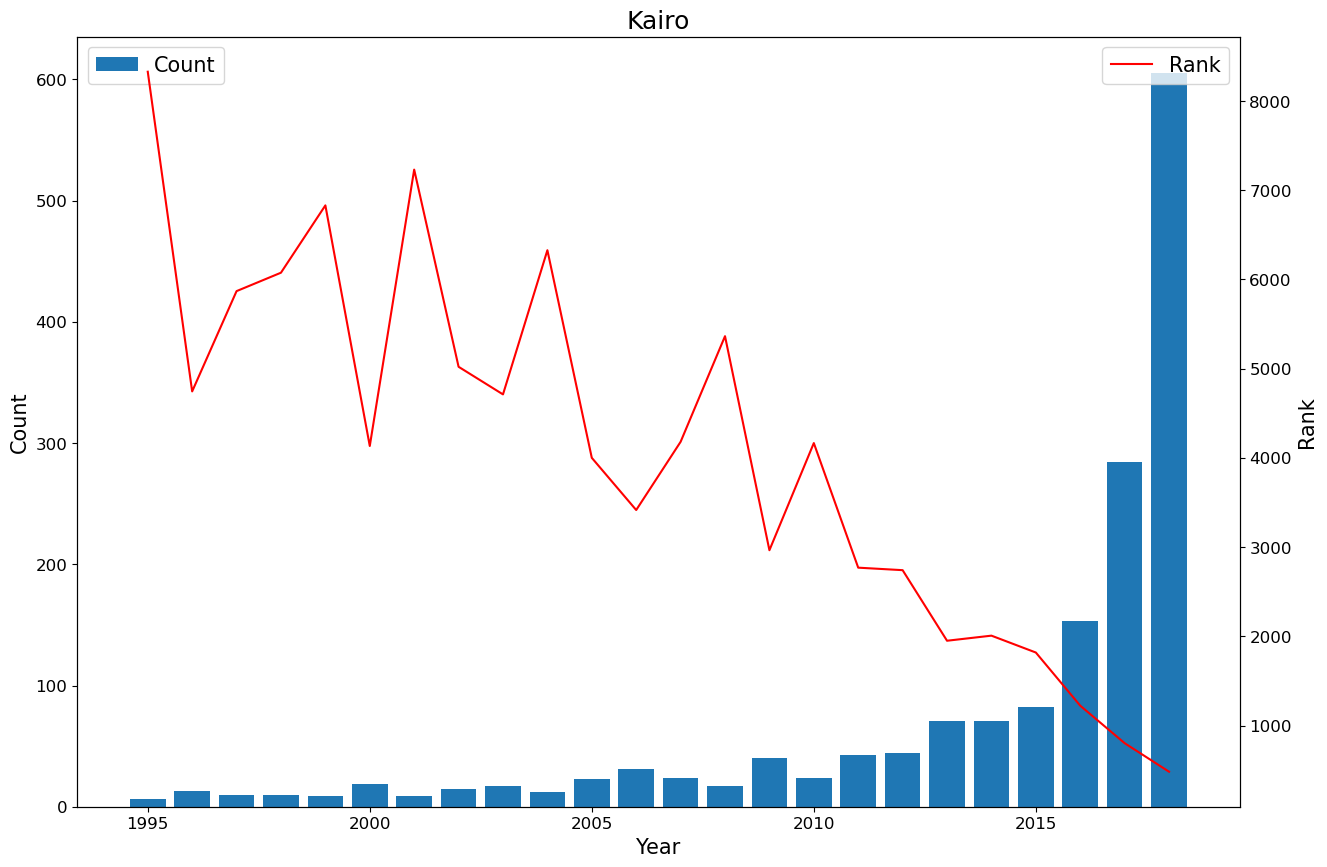

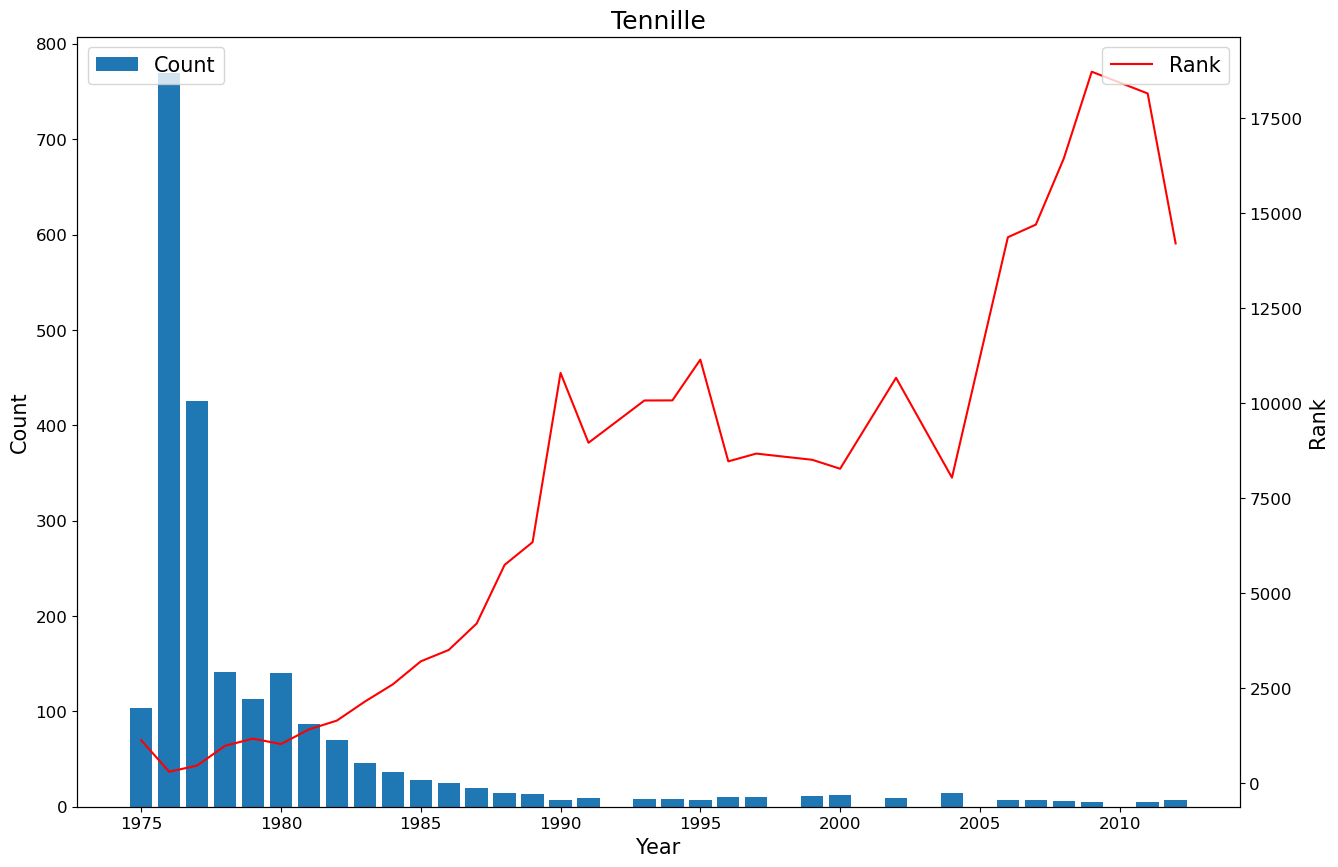

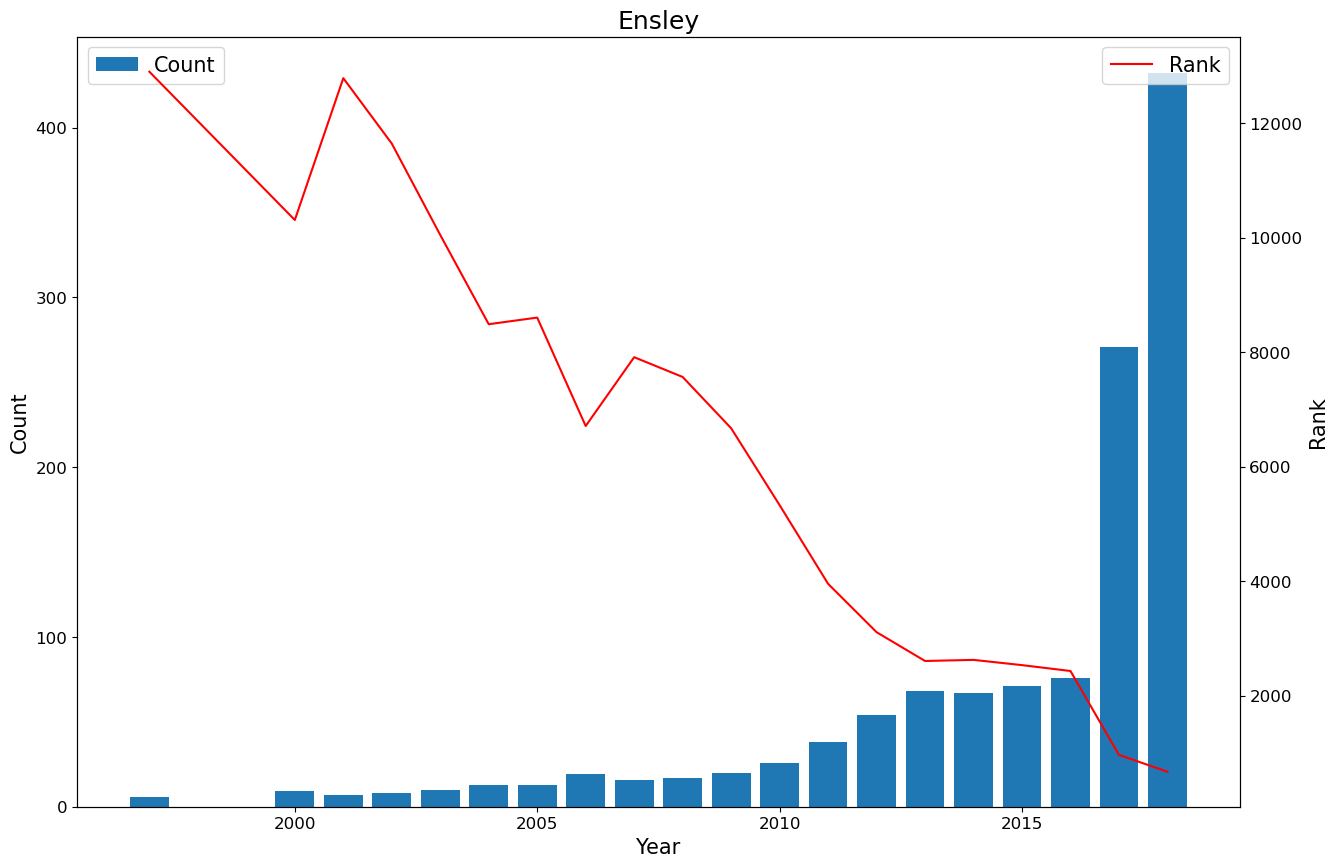

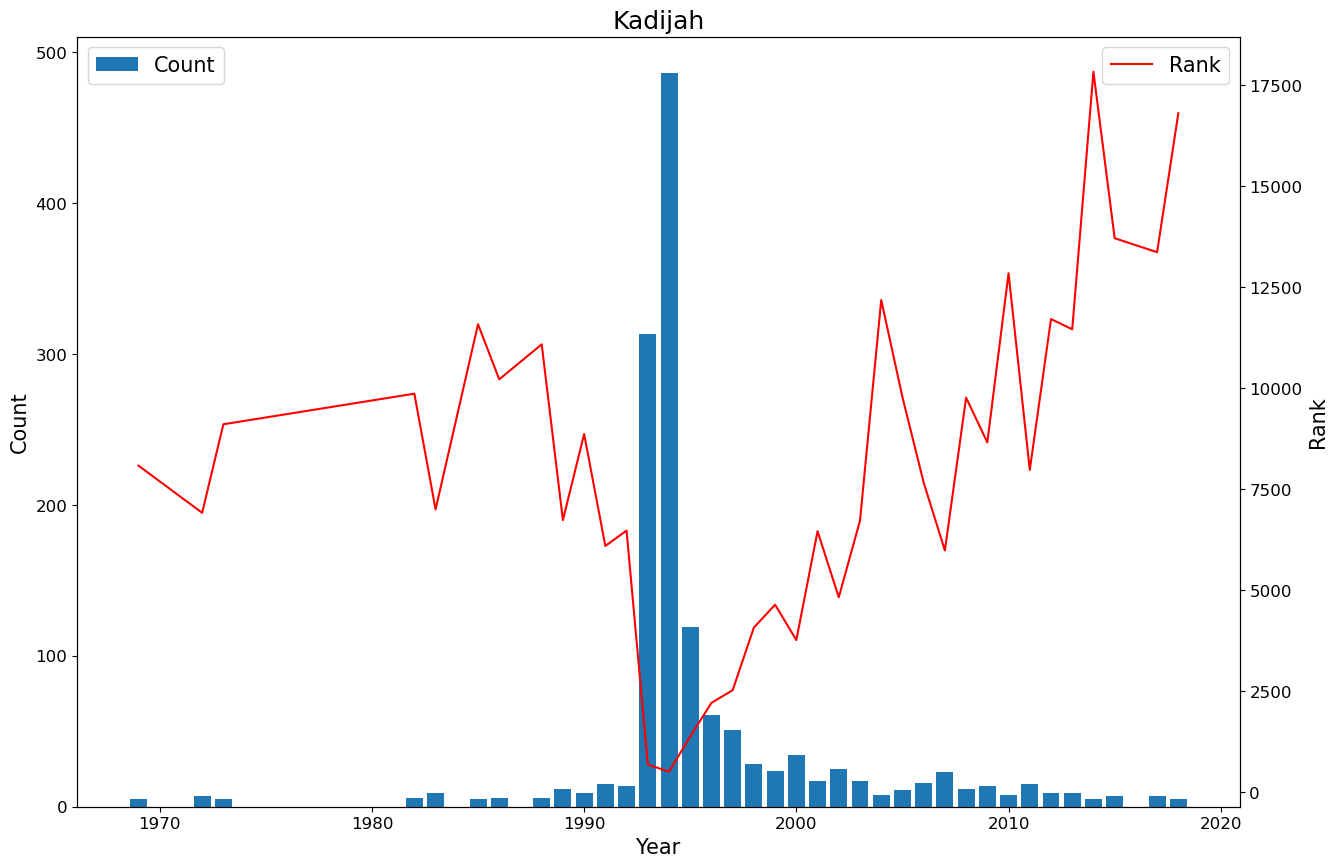

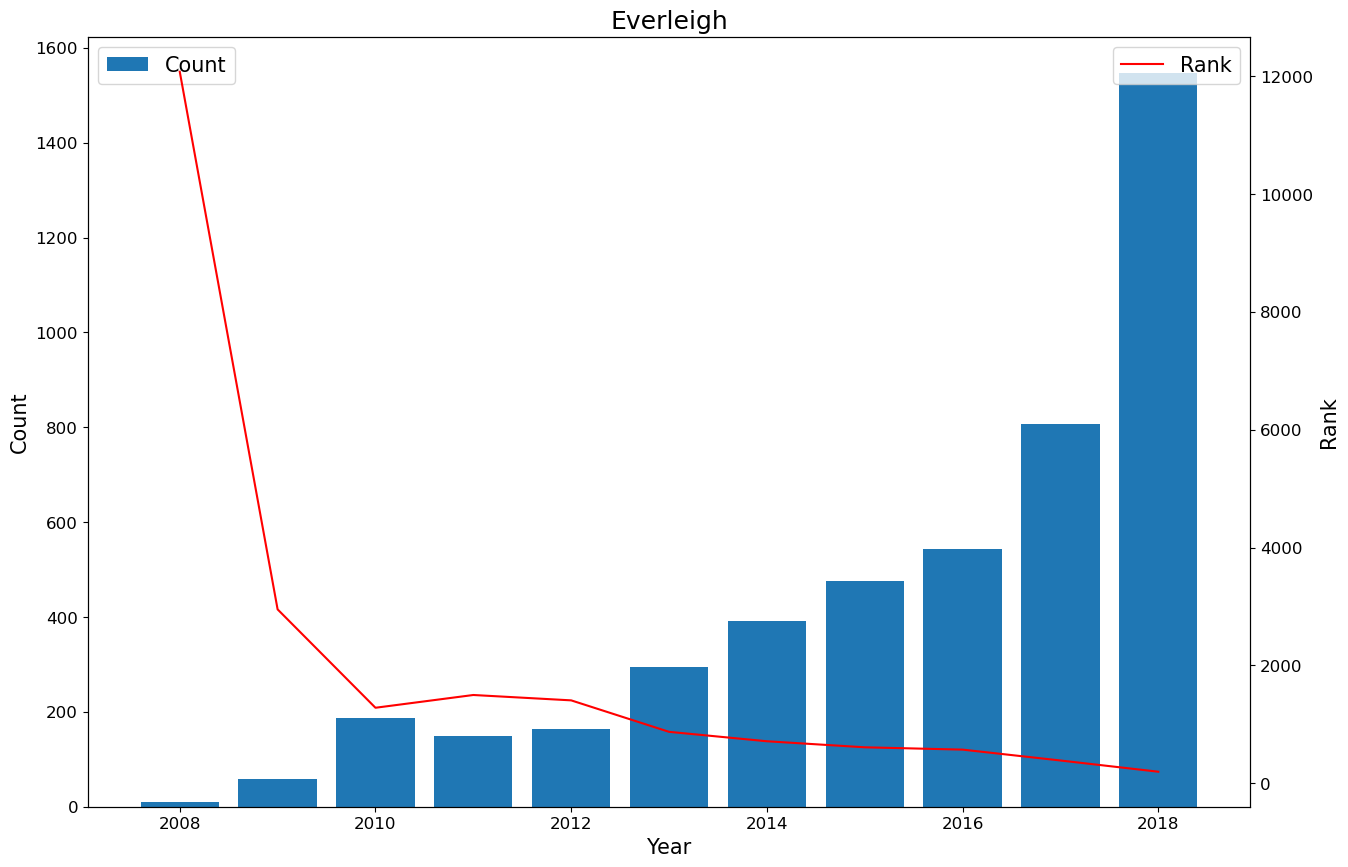

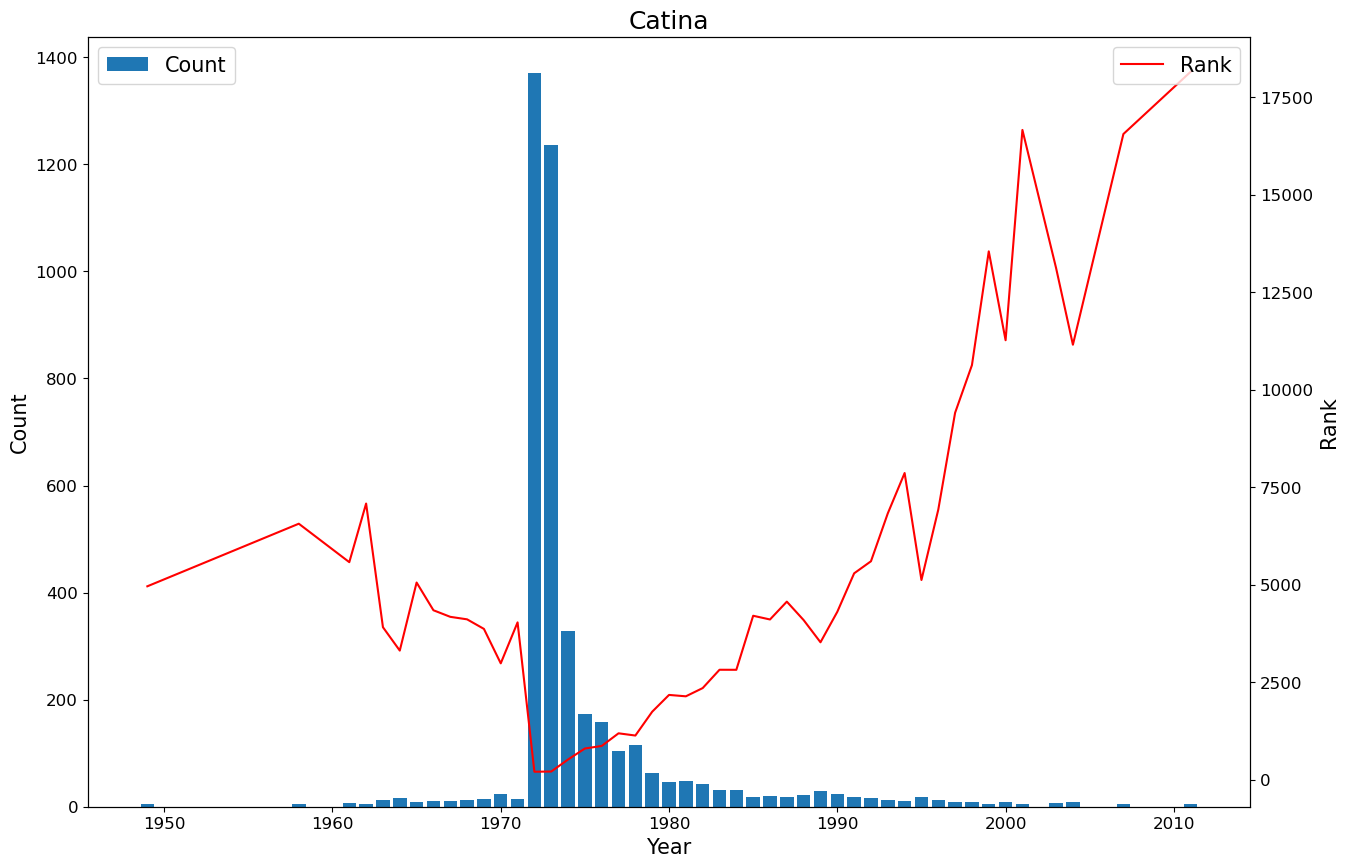

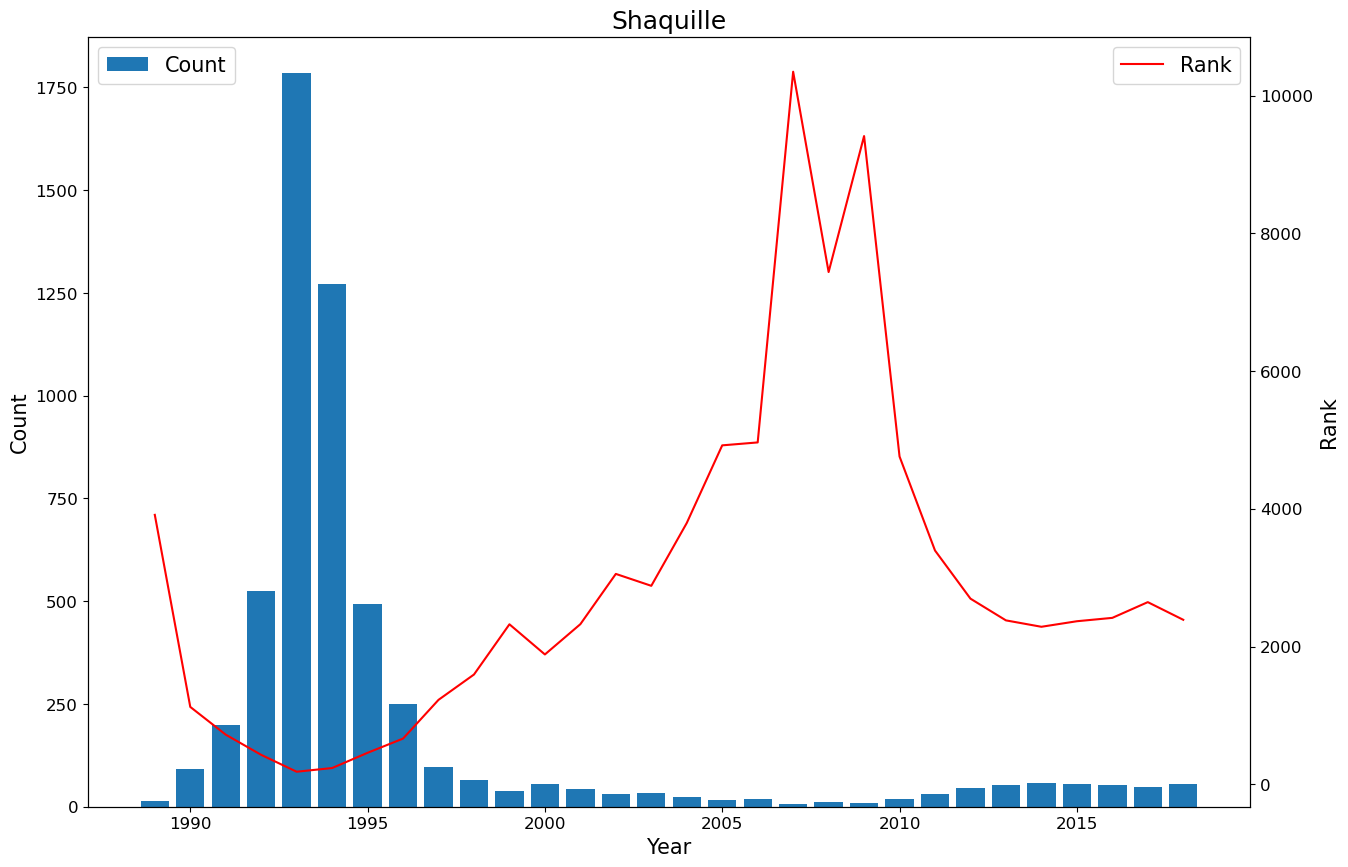

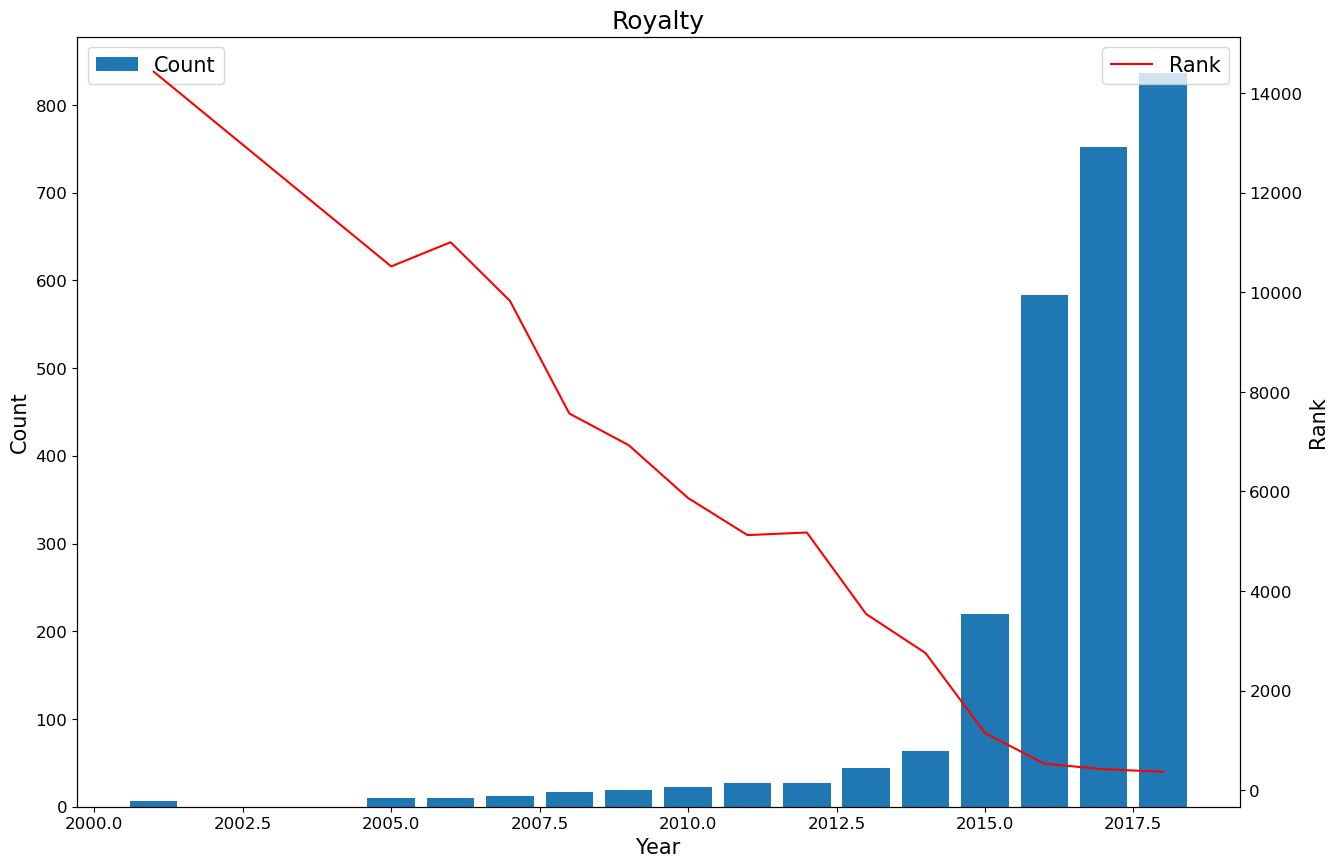

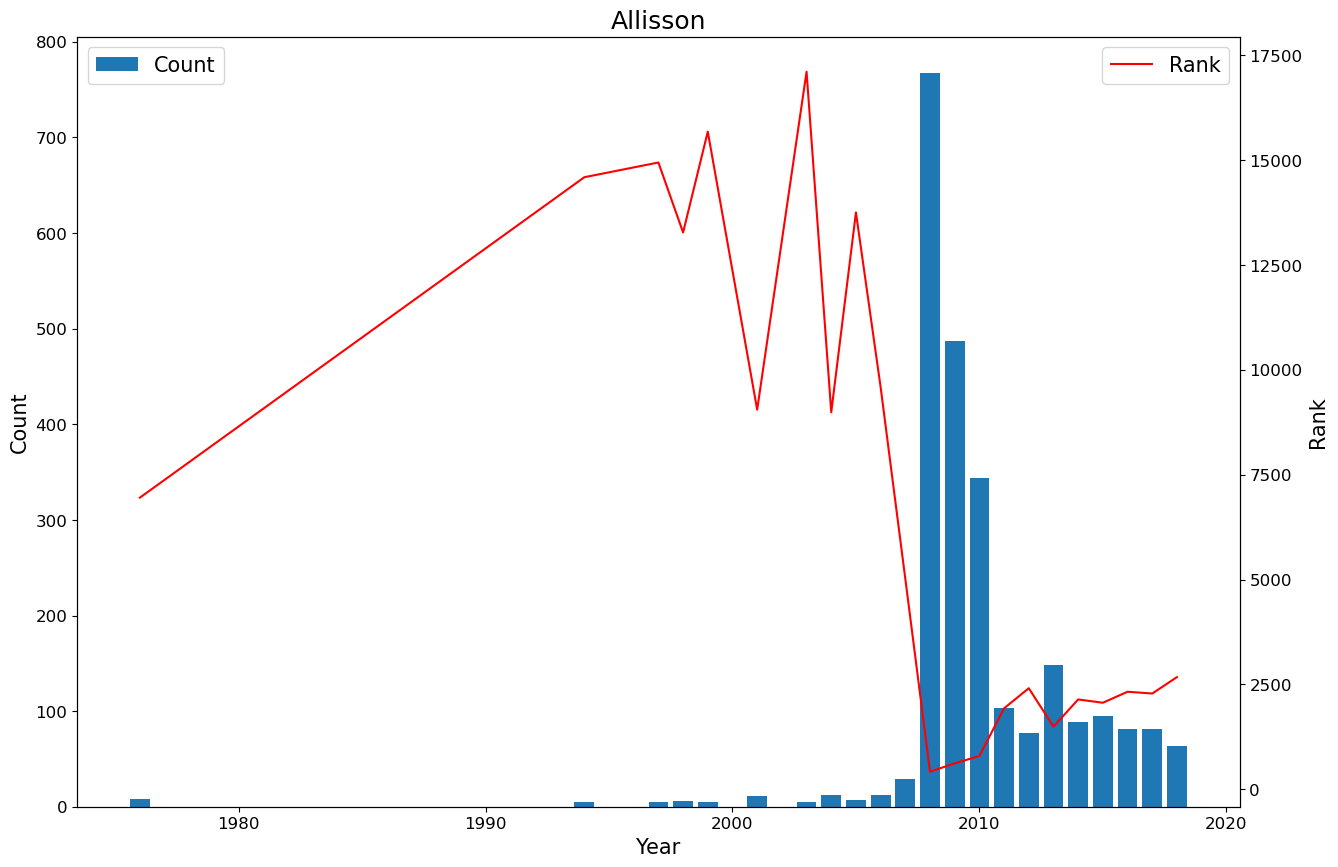

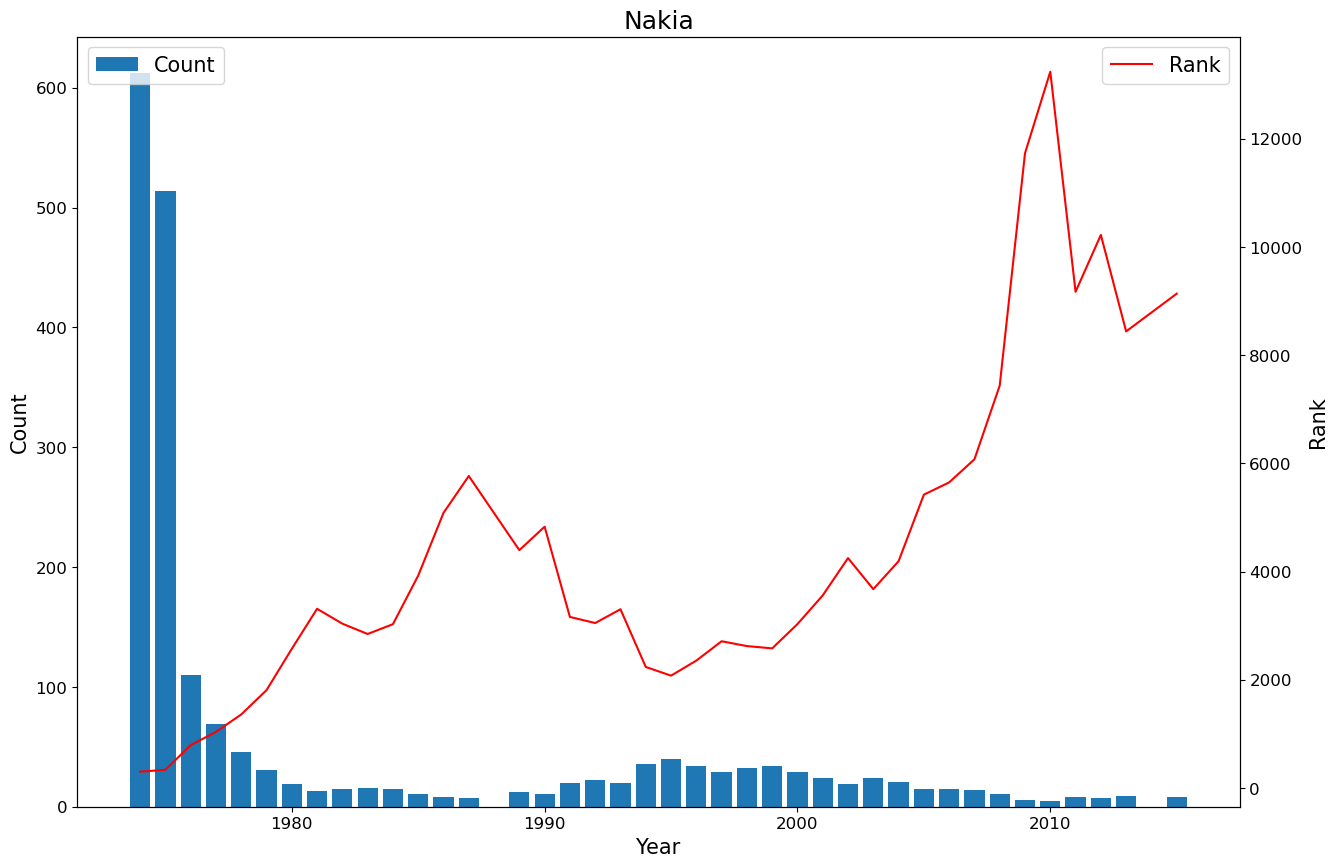

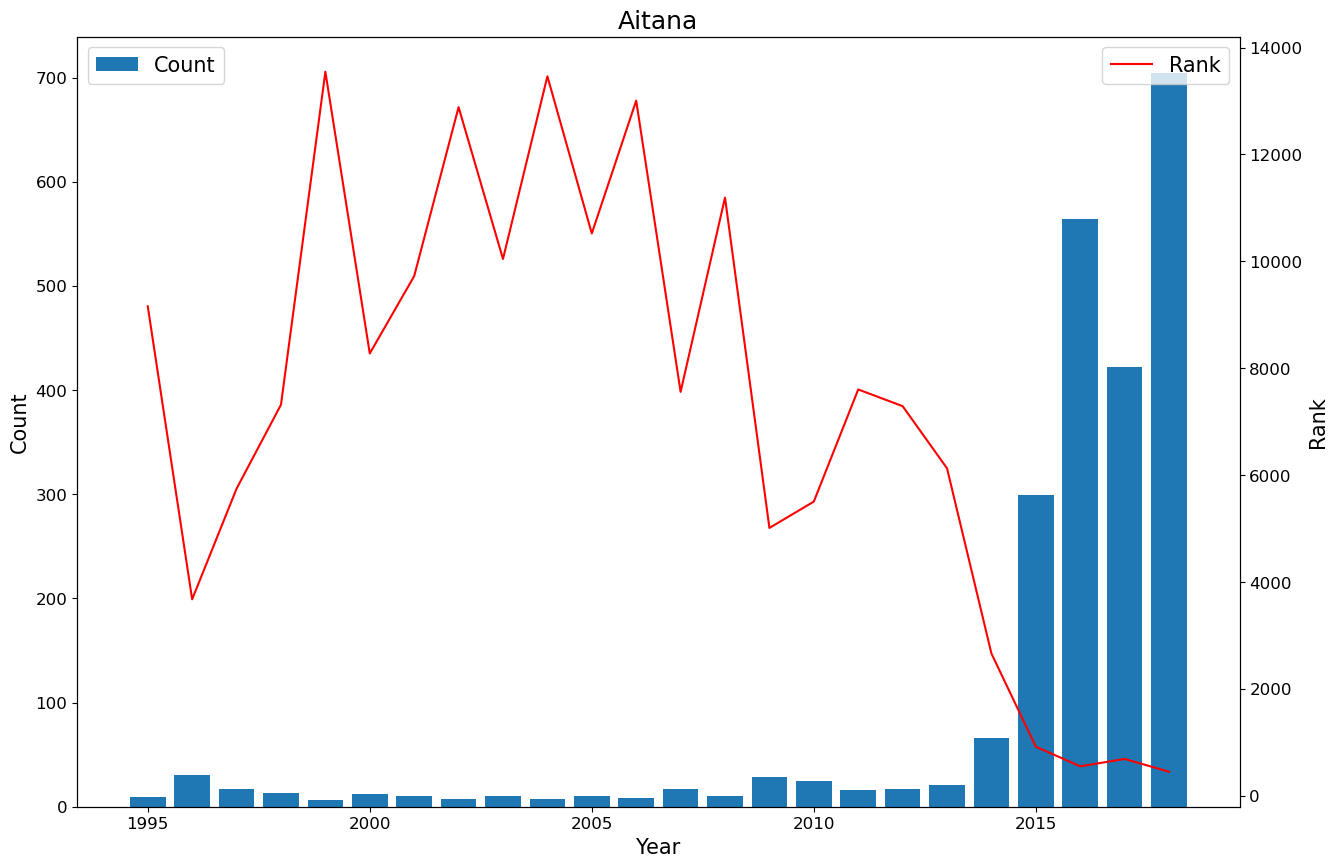

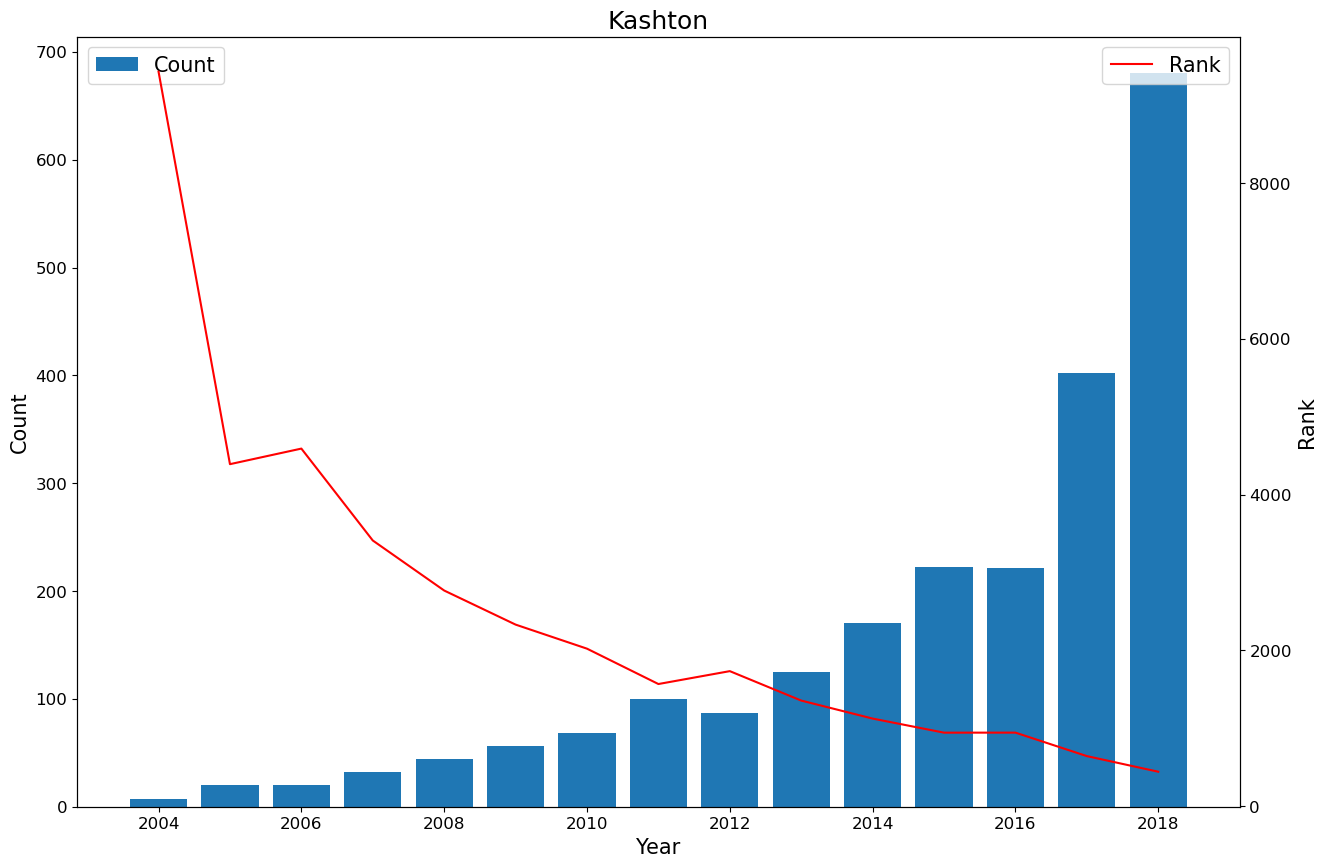

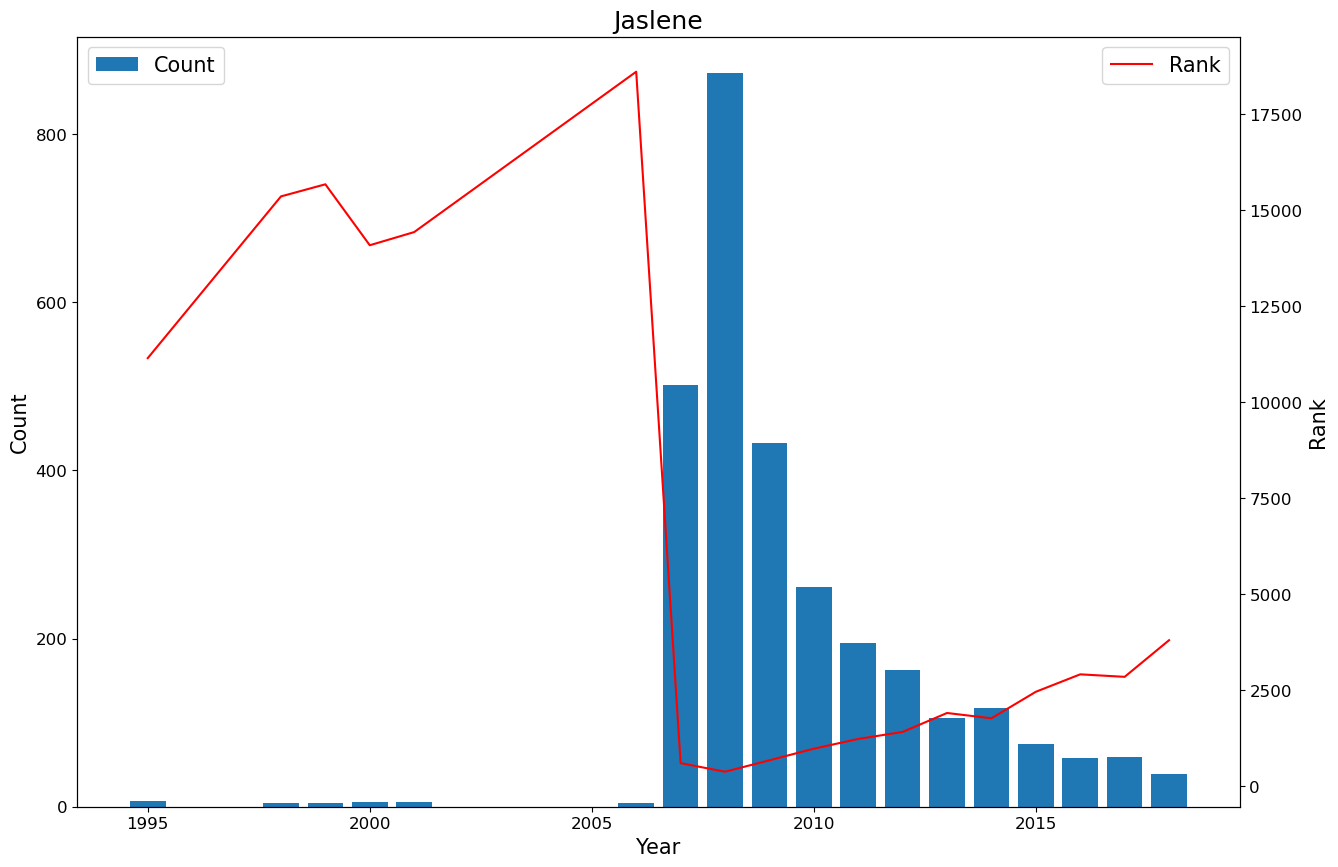

In [102]:
for name in l2:
    plot_name(name=name[0],gender=name[1],crit="Count")

## Most Popular Unisex Names

22. __Find__ the most popular __Unisex Names__ of all times. (Unisex names are names given to Boys and Girls).  

In [103]:
df

Year       Name Gender  Count  Popularity     Rank  Pop_lag1  \
0        1880       Mary      F   7065    77642.48     1.00       NaN   
1        1880       Anna      F   2604    28617.27     2.00       NaN   
2        1880       Emma      F   2003    22012.44     3.00       NaN   
3        1880  Elizabeth      F   1939    21309.10     4.00       NaN   
4        1880     Minnie      F   1746    19188.08     5.00       NaN   
...       ...        ...    ...    ...         ...      ...       ...   
1957041  2018      Zylas      M      5        2.78 13042.00      3.80   
1957042  2018      Zyran      M      5        2.78 13042.00      3.14   
1957043  2018      Zyrie      M      5        2.78 13042.00      2.71   
1957044  2018      Zyron      M      5        2.78 13042.00      8.14   
1957045  2018      Zzyzx      M      5        2.78 13042.00      2.61   

         Pop_diff  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
...           ...  
1957041     -1.02  
1957042     -0.36  
1957043      0.06  
1957044     -5.36  
1957045      0.17  

[1957046 rows x 8 columns]

In [104]:
df[df.Name=="Mary"].groupby(["Name","Gender"]).Count.sum()

Name  Gender
Mary  F         4125675
      M           15165
Name: Count, dtype: int64

In [106]:
df.groupby(["Name","Gender"]).Count.sum().unstack()

Gender      F      M
Name                
Aaban     NaN 114.00
Aabha   35.00    NaN
Aabid     NaN  16.00
Aabidah  5.00    NaN
Aabir     NaN  10.00
...       ...    ...
Zyvion    NaN   5.00
Zyvon     NaN   7.00
Zyyanna  6.00    NaN
Zyyon     NaN   6.00
Zzyzx     NaN  10.00

[98400 rows x 2 columns]

In [107]:
unisex=df.groupby(["Name","Gender"]).Count.sum().unstack()

In [108]:
unisex

Gender      F      M
Name                
Aaban     NaN 114.00
Aabha   35.00    NaN
Aabid     NaN  16.00
Aabidah  5.00    NaN
Aabir     NaN  10.00
...       ...    ...
Zyvion    NaN   5.00
Zyvon     NaN   7.00
Zyyanna  6.00    NaN
Zyyon     NaN   6.00
Zzyzx     NaN  10.00

[98400 rows x 2 columns]

In [109]:
unisex.dropna(inplace=True)

In [110]:
unisex

Gender         F       M
Name                    
Aaden       5.00 4828.00
Aadi       16.00  851.00
Aadyn      16.00  516.00
Aalijah   149.00  212.00
Aaliyah 87442.00   96.00
...          ...     ...
Zyion     168.00  918.00
Zyon      620.00 2638.00
Zyonn       5.00   40.00
Zyree      16.00   94.00
Zyrie      19.00   16.00

[10773 rows x 2 columns]

In [115]:
unisex.min(axis=1).sort_values(ascending=False)

Name
Willie   146156.00
Jordan   131004.00
Leslie   112726.00
Taylor   110390.00
Jessie   110212.00
            ...   
Hany          5.00
Hao           5.00
Haram         5.00
Harjap        5.00
Aaden         5.00
Length: 10773, dtype: float64

In [116]:
unisex_names=unisex.min(axis=1).sort_values(ascending=False).index

In [117]:
unisex_names

Index(['Willie', 'Jordan', 'Leslie', 'Taylor', 'Jessie', 'Terry', 'Angel',
       'Riley', 'Jamie', 'Kelly',
       ...
       'Hanalei', 'Handy', 'Haniel', 'Hans', 'Hansel', 'Hany', 'Hao', 'Haram',
       'Harjap', 'Aaden'],
      dtype='object', name='Name', length=10773)

In [118]:
unisex.loc[unisex_names].head(20)

Gender          F         M
Name                       
Willie  146156.00 448946.00
Jordan  131004.00 374513.00
Leslie  267081.00 112726.00
Taylor  320446.00 110390.00
Jessie  167462.00 110212.00
Terry    96895.00 422916.00
Angel    95710.00 231800.00
Riley   106901.00  94278.00
Jamie   268102.00  85631.00
Kelly   471502.00  81652.00
Jackie   90705.00  78494.00
Casey    76312.00 110635.00
Marion  188391.00  72075.00
Alexis  338333.00  63604.00
Lee      62143.00 231130.00
Tracy   250853.00  61223.00
Avery   125883.00  55646.00
Dana    191812.00  53098.00
Lynn    181904.00  52268.00
Shannon 295024.00  51999.00

In [119]:
unisex=unisex[unisex.min(axis=1)>10000]

In [120]:
unisex

Gender          F          M
Name                        
Addison 121435.00   12895.00
Adrian   15258.00  237044.00
Alexis  338333.00   63604.00
Amari    14415.00   17932.00
Angel    95710.00  231800.00
...           ...        ...
Tommie   17415.00   34210.00
Tracy   250853.00   61223.00
Tyler    16585.00  587571.00
William  15958.00 4117369.00
Willie  146156.00  448946.00

[116 rows x 2 columns]

In [122]:
abs(unisex.F.div(unisex.M).sub(1)).sort_values()

Name
Elisha       0.01
Quinn        0.01
Kerry        0.02
Blair        0.03
Kris         0.04
            ...  
Stacey       9.60
Courtney    10.34
Jean        18.07
Ashley      53.00
Mary       271.05
Length: 116, dtype: float64

In [123]:
unisex_names2=abs(unisex.F.div(unisex.M).sub(1)).sort_values().index

In [124]:
unisex_names2

Index(['Elisha', 'Quinn', 'Kerry', 'Blair', 'Kris', 'Robbie', 'Justice',
       'Riley', 'Emerson', 'Jackie',
       ...
       'Sandy', 'Stacy', 'Carmen', 'Shelby', 'Addison', 'Stacey', 'Courtney',
       'Jean', 'Ashley', 'Mary'],
      dtype='object', name='Name', length=116)

In [125]:
unisex.loc[unisex_names2].head(20)

Gender          F         M
Name                       
Elisha   13762.00  13595.00
Quinn    31670.00  32071.00
Kerry    48549.00  49646.00
Blair    14922.00  14527.00
Kris     13504.00  14055.00
Robbie   22290.00  20926.00
Justice  16354.00  17580.00
Riley   106901.00  94278.00
Emerson  20904.00  24472.00
Jackie   90705.00  78494.00
Frankie  33572.00  40753.00
Amari    14415.00  17932.00
Emery    22379.00  18082.00
Carey    12704.00  16783.00
Jaime    49748.00  68137.00
Finley   14369.00  11193.00
Casey    76312.00 110635.00
Harley   24299.00  38921.00
Skyler   23805.00  38911.00
Rowan    13538.00  22594.00